# BRAND_COLORS - sigo en plot_colors
- Voy a tratar de hacer un SUPER DICCIONAROTE con todos los brandas colors conocidos???
  - NO, imposible es muy grande PERO
  - voya trabajar con MINI-DICs, ver avajo
- Los podría separar por finanzas, Tech, Automotive (despues lo vemos por ahí se lo tiro a una IA para que lo haga)

## Trabajar los MINI-DIC a partir de lo que me dio Qewn
- Con el dic que me armo Qwen (los mini dics y voy a salvar 3 o 4 como ser Tech, Finance, Automotive, y Travel para guardar en mi modulo)
- Gemini - Qwen tiene los dics separados de abajo.  Seguir con eso

## 20/8/25 Bien, ya tengo los mini dics de colors
- Ahora toca adicinarlos al módulo y que aparezcan en matplotlib... (como era eso !?)
- Para retomar esto hay varias cosas que hacer.
    1. va a ser retomar el plot_mpl_colors Last VER. y que imprima colores por nombre? 
    2. hacer una funct que imprima los nombres de colores ?
    
- De acuerdo con lo explicado en las celdas debajo, ahora los pasos son:
    1. adicionar los dics al modulo mpl_tints - DONE (automotive, education, financial, programming) - falta algo mas de tech
    2. crear las función jm_color()
    3. crear la función get_named_colors_mapping() propa de mpl_tints que podría lelvar el mismo nombre ¿?
    4. RETOMAR plot_colors() para que funcione con TODOOO, ooj al mostrar listado que puede ser que si mostramos todos los dics en los más largos hacemos un nro reducido de colores.
    5. Se me ocurrieron otras funciones como make_palette(brand) que me puede generar la paleta MTM o adidas o python y registrarla y todo ... veremos.


## Está listo e impactado (22/8/25), PERO
1. Voy a sacar el -1 de todas los own-dic-colors, Y
2. FUTURE: trabajar luego en incorporar más diccionarios propios, Y/O
3. Crear una función que incorpore diccionarios ¿?

In [ ]:
## 1. Lo voy a tener que hacer a mano (o con IA) pero arranquemos a mano en mpl_tints definitivo.

In [2]:
## funcion jm_color()
def jm_color(nombre):
    """Función que devuelve el color correcto"""
    for dic in [MTM, _365]:
        if nombre in dic:
            return dic[nombre]


In [3]:
# probemos los mcolors dic
import matplotlib.colors as mcolors
import jm_utils.data.mpl_tints as mpl_tints
dir(mpl_tints)

['AUTOMOTIVE_COLORS',
 'Any',
 'BRAND_COLORS',
 'CMAP_NAMES_BY_CAT',
 'COLORS_NAMES_BY_CAT',
 'EDUCATION_COLORS',
 'FINANCIAL_COLORS',
 'IndexElement',
 'JM_QUALITATIVE_CMAPS',
 'Literal',
 'Optional',
 'PROGRAMMING_COLORS',
 'Rectangle',
 'Sequence',
 'TypeAlias',
 'Union',
 '__annotations__',
 '__author__',
 '__builtins__',
 '__cached__',
 '__description__',
 '__doc__',
 '__email__',
 '__file__',
 '__last_modified__',
 '__license__',
 '__loader__',
 '__name__',
 '__package__',
 '__python_requires__',
 '__spec__',
 '__status__',
 '__version__',
 'cmap',
 'cmap_name',
 'colormaps',
 'custom_cmap',
 'custom_cmap_r',
 'dict_list',
 'get_color_hex_list',
 'get_fdt',
 'jm_color',
 'mcolors',
 'np',
 'pd',
 'plot_color',
 'plot_mpl_colors',
 'plot_mpl_palettes',
 'plt',
 'random',
 'register_mpl_palette',
 'textwrap',
 'to_series']

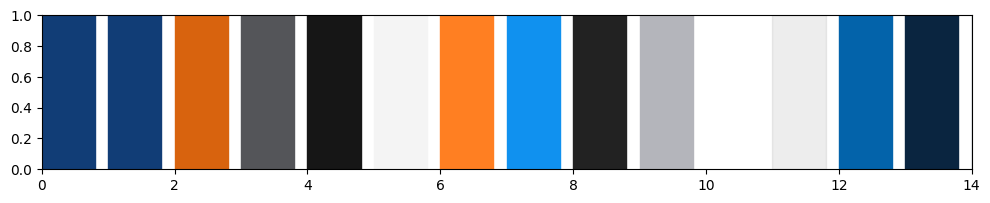

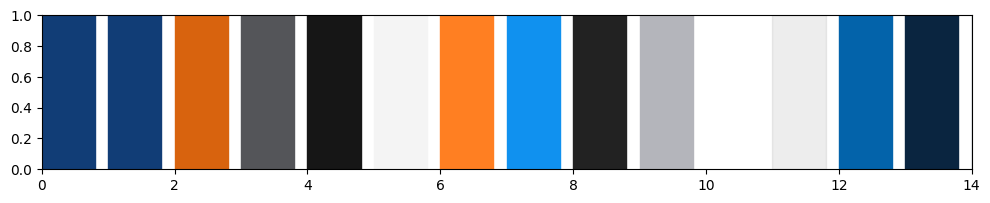

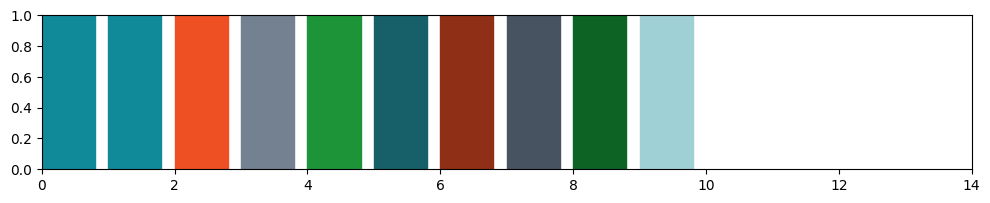

In [4]:
## Bueno, después de dar vueltas con intentar registrar colores personalizados en matplotlib previo definir los diccionarios internos, he decidido crear una función que simplifique el proceso.
import matplotlib.pyplot as plt                 # for plotting
import matplotlib.colors as mcolors             # for get_color_list()
from matplotlib import colormaps                # for show_matplotlib_palettes()
from matplotlib.patches import Rectangle        # for plot_color_rectangles()

## Por ahoraa voy a manejar el llamar a mis propios colores de dos maneras distintas
# 1. Invocando directamente el dic[key], que será algo como mcolors.EDUCATION_COLORS['freecodecamp']
# 2. Usando la función jm_color(nombre) que he definido más abajo.

## PERO ADEMÁS voy a crear un funct para que me muestre TODOS los colores una suerte de mcolor.get_named_colors_mapping() propia de mpl_tints

## Y la prueba de FUEGO es ver como quedan integrados estos colores o estos dic_COLLORS en plot_colors y plot_palettes (no voy a hacer diff en los nombres de las funct con mpl o sns)

MTM = {'MTM': '#113D76', 'MTM-1': '#113D76', 'MTM-2': '#D8630E', 'MTM-3': '#545559', 'MTM-4': '#161616', 'MTM-5': '#f4f4f4', 'MTM-6': '#FF7F22', 'MTM-7': '#1091EF',
       'MTM-8': '#222222', 'MTM-9': '#b4b5bb', 'MTM-10': '#ffffff', 'MTM-11': '#00000012', 'MTM-12': '#0363AA', 'MTM-13': '#0A2540', 'MTM-14': '#0A254080'}

_365 = {'365 DataScience': '#108999', '365 DataScience-1': '#108999',
       '365 DataScience-2': '#ee4f23', '365 DataScience-3': '#748190',
       '365 DataScience-4': '#1e9438', '365 DataScience-5': '#175f69',
       '365 DataScience-6': '#8f2f15', '365 DataScience-7': '#485361',
       '365 DataScience-8': '#0d6323', '365 DataScience-9': '#9fd0d6'}

def jm_color(nombre):
    """Función que devuelve el color correcto"""
    for dic in [MTM, _365]:
        if nombre in dic:
            return dic[nombre]
    
    return nombre  # Si no se encuentra el color, devuelve el nombre como está

fig, ax = plt.subplots(figsize=(12, 2))
ax.set_xlim(0, 14)
for i, color in enumerate(MTM.keys()):
    ax.add_patch(Rectangle((i, 0), 0.8, 1, color=jm_color(color)))   #, alpha=0.8))

fig, ax = plt.subplots(figsize=(12, 2))
ax.set_xlim(0, 14)
for i, color in enumerate(MTM.keys()):
    ax.add_patch(Rectangle((i, 0), 0.8, 1, color=MTM[color]))   #, alpha=0.8))

fig, ax = plt.subplots(figsize=(12, 2))
ax.set_xlim(0, 14)
for i, color in enumerate(_365.keys()):
    ax.add_patch(Rectangle((i, 0), 0.8, 1, color=jm_color(color)))   #, alpha=0.8))


## Esto de abajo también podría ser pero no, vamos con la funcioncita de arriba que pondré en mi módulo
# ## parece que he encontrado un enfoque que funciona. Aquí está el resumen:

# 1. **Diagnóstico**: Primero, realicé un diagnóstico exhaustivo para entender cómo matplotlib maneja los colores. Esto incluyó verificar los diccionarios internos y probar la conversión de nombres a RGBA.

# 2. **Soluciones Propuestas**:
#    - **Limpiar el caché**: A veces, matplotlib puede tener un caché interno que impide que los nuevos colores se registren correctamente. Limpiar este caché puede ayudar.
#    - **Registro Robusto**: Implementé un método de registro más robusto que verifica la validez de los colores antes de agregarlos a los diccionarios internos.
#    - **Función Helper**: Creé una función helper que siempre devuelve un color válido, ya sea de los colores personalizados o de los colores base de matplotlib.

# 3. **Pruebas**: Finalmente, probé diferentes métodos para asegurarme de que los colores se registraran y se visualizaran correctamente en las figuras.

# ## A continuación, implementaré el enfoque final en el código.

In [5]:
## veamos una func super simple que muestre un color por su nombre
import matplotlib.pyplot as plt                 # for plotting
import matplotlib.colors as mcolors             # for get_color_list()
from matplotlib import colormaps                # for show_matplotlib_palettes()
from matplotlib.patches import Rectangle        # for plot_color_rectangles()
import jm_utils.data.mpl_tints as mpl_tints

def plot_color_by_name(color_name):
    color = mcolors.CSS4_COLORS.get(color_name)
    if color:
        fig, ax = plt.subplots(figsize=(2, 2))
        ax.add_patch(Rectangle((0, 0), 1, 1, color=color))
        ax.set_xlim(0, 1)
        ax.set_ylim(0, 1)
        ax.set_xticks([])
        ax.set_yticks([])
        plt.title(f"Color: {color_name}")
        plt.show()
    else:
        print(f"Color '{color_name}' not found.")
        
MTM = {'MTM': '#113D76', 'MTM-1': '#113D76', 'MTM-2': '#D8630E', 'MTM-3': '#545559', 'MTM-4': '#161616', 'MTM-5': '#f4f4f4', 'MTM-6': '#FF7F22', 'MTM-7': '#1091EF',
       'MTM-8': '#222222', 'MTM-9': '#b4b5bb', 'MTM-10': '#ffffff', 'MTM-11': '#00000012', 'MTM-12': '#0363AA', 'MTM-13': '#0A2540', 'MTM-14': '#0A254080'}
mcolors.BASE_COLORS.update(MTM)
print([name for name in mcolors.get_named_colors_mapping() if name.startswith('MTM')])

# Ejemplo de uso
plot_color_by_name("MTM")

# for name_color in mcolors.get_named_colors_mapping():
#     if name_color.startswith('MTM') or name_color.startswith('mtm'):
#         print(name_color)

# mcolors.BASE_COLORS

[]
Color 'MTM' not found.


Colores registrados: ['rojo_intenso', 'azul_cielo', 'verde_bosque', 'naranja_atardecer', 'violeta_profundo']


ValueError: Invalid RGBA argument: 'rojo_intenso'

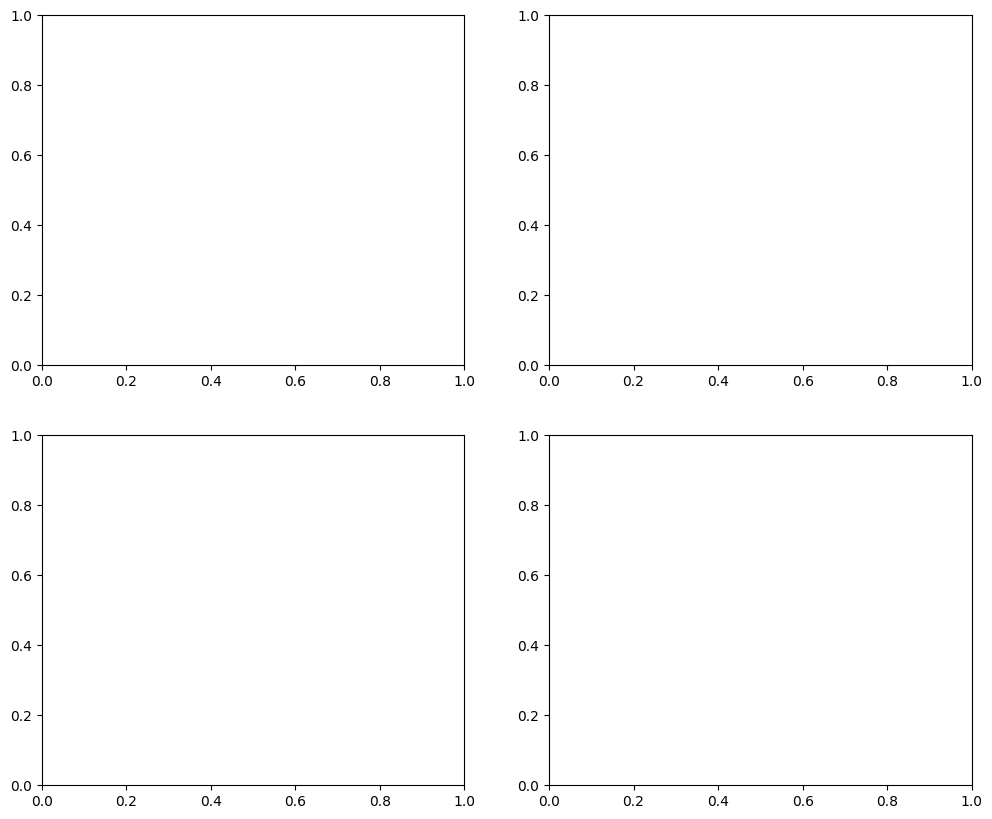

In [6]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.patches import Rectangle, Circle
import numpy as np

# Colores personalizados
MIS_COLORES = {
    'rojo_intenso': '#DC143C',
    'azul_cielo': '#87CEEB',
    'verde_bosque': '#228B22',
    'naranja_atardecer': '#FF6347',
    'violeta_profundo': '#4B0082'
}

# Registrar en matplotlib
mcolors.BASE_COLORS.update(MIS_COLORES)
print(f"Colores registrados: {list(MIS_COLORES.keys())}")

# Crear figura de prueba completa
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Test 1: Rectángulos
ax = axes[0, 0]
for i, (nombre, _) in enumerate(MIS_COLORES.items()):
    ax.add_patch(Rectangle((i, 0), 0.8, 1, color=nombre, alpha=0.8))
    ax.text(i+0.4, 0.5, nombre, rotation=90, ha='center', va='center', fontsize=8)
ax.set_xlim(-0.1, len(MIS_COLORES))
ax.set_ylim(-0.1, 1.1)
ax.set_title('Test 1: Rectángulos con colores personalizados')

# Test 2: Líneas y puntos
ax = axes[0, 1]
x = np.linspace(0, 10, 100)
for i, color in enumerate(MIS_COLORES.keys()):
    y = np.sin(x + i) + i
    ax.plot(x, y, color=color, linewidth=2, label=color)
ax.legend(fontsize=8)
ax.set_title('Test 2: Líneas con colores personalizados')

# Test 3: Scatter
ax = axes[1, 0]
np.random.seed(42)
for i, color in enumerate(MIS_COLORES.keys()):
    x_scatter = np.random.normal(i, 0.3, 50)
    y_scatter = np.random.normal(i, 0.3, 50)
    ax.scatter(x_scatter, y_scatter, color=color, alpha=0.6, s=50, label=color)
ax.legend(fontsize=8)
ax.set_title('Test 3: Scatter con colores personalizados')

# Test 4: Círculos
ax = axes[1, 1]
for i, color in enumerate(MIS_COLORES.keys()):
    circle = Circle((i%3, i//3), 0.4, color=color, alpha=0.7)
    ax.add_patch(circle)
    ax.text(i%3, i//3, color[:6], ha='center', va='center', fontsize=8, 
            color='white' if i%2 else 'black')
ax.set_xlim(-0.5, 2.5)
ax.set_ylim(-0.5, 2.5)
ax.set_aspect('equal')
ax.set_title('Test 4: Círculos con colores personalizados')

plt.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.patches import Rectangle
import numpy as np

def diagnosticar_colores():
    """Función completa para diagnosticar el problema con colores personalizados"""
    
    print("=== DIAGNÓSTICO DE COLORES PERSONALIZADOS ===\n")
    
    # 1. Estado inicial
    print("1. ESTADO INICIAL:")
    print(f"   BASE_COLORS tiene {len(mcolors.BASE_COLORS)} colores")
    print(f"   CSS4_COLORS tiene {len(mcolors.CSS4_COLORS)} colores")
    print(f"   get_named_colors_mapping() tiene {len(mcolors.get_named_colors_mapping())} colores")
    
    # 2. Agregar colores personalizados
    print("\n2. AGREGANDO COLORES PERSONALIZADOS:")
    MIS_COLORES = {
        'rojo_intenso': '#DC143C',
        'azul_cielo': '#87CEEB',
        'verde_bosque': '#228B22'
    }
    
    # Probar diferentes métodos de registro
    print("   Agregando a BASE_COLORS...")
    mcolors.BASE_COLORS.update(MIS_COLORES)
    
    print("   Agregando a CSS4_COLORS...")
    mcolors.CSS4_COLORS.update(MIS_COLORES)
    
    # 3. Verificar que están agregados
    print("\n3. VERIFICACIÓN EN DICCIONARIOS:")
    for nombre, hex_val in MIS_COLORES.items():
        en_base = nombre in mcolors.BASE_COLORS
        en_css4 = nombre in mcolors.CSS4_COLORS
        en_named = nombre in mcolors.get_named_colors_mapping()
        
        print(f"   '{nombre}':")
        print(f"     BASE_COLORS: {en_base} {mcolors.BASE_COLORS.get(nombre, 'NO ENCONTRADO')}")
        print(f"     CSS4_COLORS: {en_css4} {mcolors.CSS4_COLORS.get(nombre, 'NO ENCONTRADO')}")
        print(f"     get_named_colors_mapping(): {en_named}")
    
    # 4. Probar conversión directa a RGBA
    print("\n4. PRUEBA DE CONVERSIÓN A RGBA:")
    for nombre, hex_val in MIS_COLORES.items():
        try:
            # Esto es lo que hace matplotlib internamente
            rgba = mcolors.to_rgba(nombre)
            print(f"   ✓ '{nombre}' -> {rgba}")
        except ValueError as e:
            print(f"   ✗ '{nombre}' -> ERROR: {e}")
            # Probar con hex directo
            try:
                rgba_hex = mcolors.to_rgba(hex_val)
                print(f"     Pero '{hex_val}' SÍ funciona -> {rgba_hex}")
            except Exception as e2:
                print(f"     Y '{hex_val}' tampoco funciona -> {e2}")
    
    # 5. Probar colores nativos para comparar
    print("\n5. COMPARACIÓN CON COLORES NATIVOS:")
    colores_nativos = ['red', 'blue', 'green']
    for color in colores_nativos:
        try:
            rgba = mcolors.to_rgba(color)
            print(f"   ✓ '{color}' -> {rgba}")
        except Exception as e:
            print(f"   ✗ '{color}' -> {e}")
    
    return MIS_COLORES

def probar_solucion_1_recarga_cache():
    """Solución 1: Intentar recargar/limpiar cache interno"""
    print("\n=== SOLUCIÓN 1: LIMPIAR CACHE ===")
    
    # Limpiar el cache interno de colores
    if hasattr(mcolors, '_colors_full_map'):
        mcolors._colors_full_map.clear()
        print("Cache _colors_full_map limpiado")
    
    # Intentar forzar reconstrucción
    try:
        # Esto a veces ayuda a refrescar el sistema interno
        mcolors.get_named_colors_mapping.cache_clear() if hasattr(mcolors.get_named_colors_mapping, 'cache_clear') else None
        print("Cache de get_named_colors_mapping limpiado")
    except:
        print("No se pudo limpiar cache de get_named_colors_mapping")

def probar_solucion_2_registro_correcto():
    """Solución 2: Método de registro más robusto"""
    print("\n=== SOLUCIÓN 2: REGISTRO ROBUSTO ===")
    
    MIS_COLORES = {
        'rojo_intenso': '#DC143C',
        'azul_cielo': '#87CEEB',
        'verde_bosque': '#228B22'
    }
    
    # Método más robusto
    for nombre, hex_color in MIS_COLORES.items():
        # Asegurarse que el hex es válido
        try:
            rgba = mcolors.to_rgba(hex_color)
            print(f"   Hex '{hex_color}' es válido: {rgba}")
            
            # Agregar a múltiples lugares
            mcolors.BASE_COLORS[nombre] = hex_color
            mcolors.CSS4_COLORS[nombre] = hex_color
            
            # Verificar inmediatamente
            test_rgba = mcolors.to_rgba(nombre)
            print(f"   ✓ '{nombre}' registrado correctamente: {test_rgba}")
            
        except Exception as e:
            print(f"   ✗ Error con '{nombre}': {e}")
    
    return MIS_COLORES

def probar_solucion_3_alternativa():
    """Solución 3: Función helper que siempre funciona"""
    print("\n=== SOLUCIÓN 3: FUNCIÓN HELPER ===")
    
    MIS_COLORES = {
        'rojo_intenso': '#DC143C',
        'azul_cielo': '#87CEEB',
        'verde_bosque': '#228B22'
    }
    
    def obtener_color(nombre_color, colores_dict=MIS_COLORES):
        """Función que siempre devuelve un color válido"""
        if nombre_color in colores_dict:
            return colores_dict[nombre_color]
        elif nombre_color in mcolors.BASE_COLORS:
            return mcolors.BASE_COLORS[nombre_color]
        elif nombre_color in mcolors.CSS4_COLORS:
            return mcolors.CSS4_COLORS[nombre_color]
        else:
            # Intentar como está (podría ser hex o color nativo)
            try:
                mcolors.to_rgba(nombre_color)
                return nombre_color
            except:
                return '#000000'  # Negro por defecto
    
    # Probar la función helper
    for nombre in MIS_COLORES.keys():
        color_final = obtener_color(nombre)
        try:
            rgba = mcolors.to_rgba(color_final)
            print(f"   ✓ obtener_color('{nombre}') -> '{color_final}' -> {rgba}")
        except Exception as e:
            print(f"   ✗ obtener_color('{nombre}') -> '{color_final}' -> {e}")
    
    return obtener_color

def crear_figura_de_prueba(mis_colores, obtener_color_func=None):
    """Crear figura de prueba con diferentes métodos"""
    print("\n=== CREANDO FIGURA DE PRUEBA ===")
    
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    
    # Método 1: Usar nombres directos (podría fallar)
    ax = axes[0]
    ax.set_title('Método 1: Nombres directos')
    try:
        for i, (nombre, hex_val) in enumerate(mis_colores.items()):
            rect = Rectangle((i, 0), 0.8, 1, color=nombre, alpha=0.8)
            ax.add_patch(rect)
            ax.text(i+0.4, 0.5, nombre, rotation=90, ha='center', va='center', fontsize=8)
        ax.set_xlim(-0.1, len(mis_colores))
        ax.set_ylim(-0.1, 1.1)
        print("   ✓ Método 1 funcionó")
    except Exception as e:
        ax.text(0.5, 0.5, f'ERROR:\n{str(e)[:50]}...', ha='center', va='center', transform=ax.transAxes)
        print(f"   ✗ Método 1 falló: {e}")
    
    # Método 2: Usar valores hex directos
    ax = axes[1]
    ax.set_title('Método 2: Valores hex directos')
    try:
        for i, (nombre, hex_val) in enumerate(mis_colores.items()):
            rect = Rectangle((i, 0), 0.8, 1, color=hex_val, alpha=0.8)
            ax.add_patch(rect)
            ax.text(i+0.4, 0.5, nombre, rotation=90, ha='center', va='center', fontsize=8)
        ax.set_xlim(-0.1, len(mis_colores))
        ax.set_ylim(-0.1, 1.1)
        print("   ✓ Método 2 funcionó")
    except Exception as e:
        ax.text(0.5, 0.5, f'ERROR:\n{str(e)[:50]}...', ha='center', va='center', transform=ax.transAxes)
        print(f"   ✗ Método 2 falló: {e}")
    
    # Método 3: Usar función helper
    ax = axes[2]
    ax.set_title('Método 3: Función helper')
    try:
        if obtener_color_func:
            for i, nombre in enumerate(mis_colores.keys()):
                color_final = obtener_color_func(nombre)
                rect = Rectangle((i, 0), 0.8, 1, color=color_final, alpha=0.8)
                ax.add_patch(rect)
                ax.text(i+0.4, 0.5, nombre, rotation=90, ha='center', va='center', fontsize=8)
            ax.set_xlim(-0.1, len(mis_colores))
            ax.set_ylim(-0.1, 1.1)
            print("   ✓ Método 3 funcionó")
        else:
            ax.text(0.5, 0.5, 'No hay función helper', ha='center', va='center', transform=ax.transAxes)
    except Exception as e:
        ax.text(0.5, 0.5, f'ERROR:\n{str(e)[:50]}...', ha='center', va='center', transform=ax.transAxes)
        print(f"   ✗ Método 3 falló: {e}")
    
    plt.tight_layout()
    plt.show()

# Ejecutar diagnóstico completo
if __name__ == "__main__":
    # Diagnóstico inicial
    mis_colores = diagnosticar_colores()
    
    # Probar soluciones
    probar_solucion_1_recarga_cache()
    mis_colores = probar_solucion_2_registro_correcto()
    obtener_color = probar_solucion_3_alternativa()
    
    # Crear figura de prueba
    crear_figura_de_prueba(mis_colores, obtener_color)

In [ ]:
## MTM Colors

d1 = {'MTM-1': '#113D76', 'MTM-2': '#D6682D', 'MTM-3': '#D8630E', 'MTM-4': '#00A1F1', 'MTM-5': '#161616', 'MTM-6': '#0363AA', 'MTM-7': '#1091EF'}
d2 = {'MTM-5': '#0b2e53', 'MTM-6': '#ffffff', 'MTM-7': '#f17725', 'MTM-8': '#336699'}
d3 = {'MTM-9': '#004080', 'MTM-10': '#FFFFFF', 'MTM-11': '#333333', 'MTM-12': '#0099CC'}
d4 = {'MTM-13': '#003366', 'MTM-14': '#FFFFFF', 'MTM-15': '#333333', 'MTM-16': '#000000'}
d5 = {'MTM-17': '#222222', 'MTM-18': '#FF7F22', 'MTM-19': '#D8630E', 'MTM-20': '#0A2540', 'MTM-21': '#161616', 'MTM-22': '#545559', 'MTM-23': '#b4b5bb', 'MTM-24': '#ffffff', 'MTM-25': '#00000012', 'MTM-26': '#f4f4f4', 'MTM-27': '#113D76'}
    # --e-global-color-accent: #222222;
    # --e-global-color-el_color_1: #1091EF;
    # --e-global-color-el_color_1_2: #0363AA;
    # --e-global-color-el_color_2: #FF7F22;
    # --e-global-color-el_color_2_2: #D8630E;
    # --e-global-color-el_color_6: #0A2540;
    # --e-global-color-el_color_6_3: #0A254080;
    # --e-global-color-el_color_7: #161616;
    # --e-global-color-el_color_7_1: #545559;
    # --e-global-color-el_color_7_2: #b4b5bb;
    # --e-global-color-el_0: #ffffff;
    # --e-global-color-el_color_7_4: #00000012;
    # --e-global-color-el_color_7_6: #f4f4f4;
    # --e-global-color-584049b: #113D76;
import jm_utils.data.mpl_tints as mpl_tints
# mpl_tints.plot_mpl_colors(list(d1.values()) + list(d2.values()) + list(d3.values()) + list(d4.values()))
# mpl_tints.plot_mpl_colors(list(d5.values()))
# mpl_tints.plot_mpl_colors(list(d3.values()))
# mpl_tints.plot_mpl_colors(list(d4.values())) #0363AA
MTM = {'MTM': '#113D76', 'MTM-1': '#113D76', 'MTM-2': '#D8630E', 'MTM-3': '#545559', 'MTM-4': '#161616', 'MTM-5': '#f4f4f4', 'MTM-6': '#FF7F22', 'MTM-7': '#1091EF',
       'MTM-8': '#222222', 'MTM-9': '#b4b5bb', 'MTM-10': '#ffffff', 'MTM-11': '#00000012', 'MTM-12': '#0363AA', 'MTM-13': '#0A2540', 'MTM-14': '#0A254080'}
mpl_tints.plot_mpl_colors(list(MTM.values()), sort_colors=False)

In [ ]:
## 365 DataScience
    # --brand-dark: #175f69; --brand: #108999; --brand-light: #9fd0d6; --brand-lighter: #e7f3f5; --brand-white: #f6fafb; --brand-alt-dark: #8f2f15; --brand-alt: #ee4f23;
    # --brand-alt-light: #facabd; --brand-alt-lighter: #fdede9; --brand-alt-white: #fef7f6; --true-black: #000; --black: #16191d; --darker-gray: #2c323a; --dark-gray: #485361;
    # --gray: #748190; --light-gray: #d1d3d6; --lighter-gray: #eaedf0; --white: #f9fafb;
    # --true-white: #fff;
    # --success-darker: #1a6e2d;
    # --success-dark: #0d6323;
    # --success: #1e9438;
    # --success-light: #b2d7ba;
    # --success-lighter: #dbf4e2;
    # --success-white: #f0f7f1;
    # --danger-light: #f2cdcd;
    # --danger-dark: #860505;
    # --danger: #bf0707;
    # --error-dark: #860505;
    # --error: #bf0707;
    # --error-light: #f2cdcd;
    # --error-lighter: #faebeb;
    # --error-white: #fdf7f7;

_365 = {'365 DataScience': '#108999', '365 DataScience-1': '#108999',
       '365 DataScience-2': '#ee4f23', '365 DataScience-3': '#748190',
       '365 DataScience-4': '#1e9438', '365 DataScience-5': '#175f69',
       '365 DataScience-6': '#8f2f15', '365 DataScience-7': '#485361',
       '365 DataScience-8': '#0d6323', '365 DataScience-9': '#9fd0d6'}

fig = mpl_tints.plot_mpl_colors(list(_365.values()), sort_colors=True)


In [ ]:
WEBSERVICES_COLORS = {
    "500px": "#0099e5", "500px-1": "#0099e5", "500px-2": "#ff4c4c", "500px-3": "#34bf49",
    "about-me": "#00a98f",
    "alphabet": "#ed1c24", "alphabet-1": "#ed1c24",
    "android": "#a4c639", "android-1": "#a4c639",
    "answers": "#136ad5", "answers-1": "#136ad5", "answers-2": "#fb8a2e",
    "baidu": "#de0f17", "baidu-1": "#de0f17", "baidu-2": "#2529d8",
    "bing": "#ffb900", "bing-1": "#ffb900", "bing-2": "#505050", "bing-3": "#a3a3a3",
    "crunchbase": "#2292a7", "crunchbase-1": "#2292a7",
    "delicious": "#3399ff", "delicious-1": "#3399ff", "delicious-2": "#222222", "delicious-3": "#eeeeee",
    "eventbrite": "#ff8000", "eventbrite-1": "#ff8000",
    "google": "#4285f4", "google-1": "#4285f4", "google-2": "#34a853", "google-3": "#fbbc05", "google-4": "#ea4335",
    "google-allo": "#fbbc05", "google-allo-1": "#fbbc05",
    "google-duo": "#4285f4", "google-duo-1": "#4285f4",
    "google-plus": "#dd4b39", "google-plus-1": "#dd4b39",
    "meta": "#0082fb", "meta-1": "#0082fb", "meta-2": "#0064e0",
    "path": "#ee3423", "path-1": "#ee3423"
}

In [ ]:
SOFTWARE_COLORS = {
    "adobe": "#ff0000", "adobe-1": "#ff0000", "adobe-2": "#fbb034", "adobe-3": "#ffdd00", "adobe-4": "#c1d82f", "adobe-5": "#00a4e4", "adobe-6": "#8a7967", "adobe-7": "#6a737b",
    "akamai": "#0099cc", "akamai-1": "#0099cc", "akamai-2": "#ff9933",
    "algolia": "#050f2c", "algolia-1": "#050f2c", "algolia-2": "#003666", "algolia-3": "#00aeff", "algolia-4": "#3369e7", "algolia-5": "#8e43e7", "algolia-6": "#b84592", "algolia-7": "#ff4f81", "algolia-8": "#ff6c5f", "algolia-9": "#ffc168", "algolia-10": "#2dde98", "algolia-11": "#1cc7d0",
    "alienware": "#0c3866", "alienware-1": "#0c3866", "alienware-2": "#49c0b6", "alienware-3": "#222", "alienware-4": "#ce181e", "alienware-5": "#007cc0", "alienware-6": "#ffc20e",
    "asana": "#3be8b0", "asana-1": "#3be8b0", "asana-2": "#1aafd0", "asana-3": "#6a67ce", "asana-4": "#ffb900", "asana-5": "#fc636b",
    "atlassian": "#003366", "atlassian-1": "#003366",
    "atos": "#0066a1", "atos-1": "#0066a1", "atos-2": "#231f20", "atos-3": "#bfbfbf", "atos-4": "#00b2a9", "atos-5": "#a626aa", "atos-6": "#6639b7", "atos-7": "#aea400", "atos-8": "#ff6319",
    "auth0": "#16214d", "auth0-1": "#16214d", "auth0-2": "#44c7f4", "auth0-3": "#eb5424", "auth0-4": "#d0d2d3",
    "avast": "#ff7800", "avast-1": "#ff7800", "avast-2": "#2d364c", "avast-3": "#6534ac",
    "avira": "#d40000", "avira-1": "#d40000",
    "basecamp": "#b3dcff", "basecamp-1": "#b3dcff", "basecamp-2": "#5ecc62", "basecamp-3": "#00ad45",
    "behance": "#1769ff", "behance-1": "#1769ff",
    "bitbucket": "#205081", "bitbucket-1": "#205081",
    "bitly": "#ee6123", "bitly-1": "#ee6123", "bitly-2": "#61b3de",
    "blackberry": "#005387", "blackberry-1": "#005387", "blackberry-2": "#8cb811", "blackberry-3": "#fdb813", "blackberry-4": "#88aca1", "blackberry-5": "#000000", "blackberry-6": "#788cb6", "blackberry-7": "#a1a1a4", "blackberry-8": "#8f8f8c",
    "blogger": "#f57d00", "blogger-1": "#f57d00",
    "booqable": "#2b80ff", "booqable-1": "#2b80ff",
    "bower": "#ffcc2f", "bower-1": "#ffcc2f", "bower-2": "#ef5734", "bower-3": "#00acee", "bower-4": "#2baf2b", "bower-5": "#543729", "bower-6": "#cecece",
    "box": "#0061d5", "box-1": "#0061d5",
    "bulma": "#00d1b2", "bulma-1": "#00d1b2",
    "bynder": "#00aaff", "bynder-1": "#00aaff",
    "canva": "#00c4cc", "canva-1": "#00c4cc", "canva-2": "#6a3be4",
    "carbonmade": "#613854", "carbonmade-1": "#613854",
    "carrot": "#388ed1", "carrot-1": "#388ed1", "carrot-2": "#d74e26", "carrot-3": "#006837", "carrot-4": "#fa9f1e", "carrot-5": "#f7931e",
    "cloudflare": "#f38020", "cloudflare-1": "#f38020", "cloudflare-2": "#faae40", "cloudflare-3": "#404041",
    "codepen": "#0ebeff", "codepen-1": "#0ebeff", "codepen-2": "#47cf73", "codepen-3": "#ae63e4", "codepen-4": "#fcd000", "codepen-5": "#ff3c41", "codepen-6": "#76daff",
    "constant-contact": "#439fd3", "constant-contact-1": "#439fd3", "constant-contact-2": "#f6b128",
    "craft-cms": "#da5a47", "craft-cms-1": "#da5a47",
    "crowdin": "#30660f", "crowdin-1": "#30660f", "crowdin-2": "#b8cc1c",
    "datadog": "#774aa4", "datadog-1": "#774aa4",
    "debian": "#a80030", "debian-1": "#a80030",
    "digital-ocean": "#008bcf", "digital-ocean-1": "#008bcf",
    "disqus": "#2e9fff", "disqus-1": "#2e9fff",
    "dropbox": "#007ee5", "dropbox-1": "#007ee5", "dropbox-2": "#7b8994", "dropbox-3": "#47525d", "dropbox-4": "#3d464d",
    "droplr": "#5654a4", "droplr-1": "#5654a4",
    "drupal": "#0077c0", "drupal-1": "#0077c0", "drupal-2": "#81ceff", "drupal-3": "#00598e",
    "duckduckgo": "#e37151", "duckduckgo-1": "#e37151", "duckduckgo-2": "#de5833", "duckduckgo-3": "#ffffff", "duckduckgo-4": "#e5e5e5", "duckduckgo-5": "#5b9e4d", "duckduckgo-6": "#e37151", "duckduckgo-7": "#4495d4",
    "dunked": "#2da9d7", "dunked-1": "#2da9d7", "dunked-2": "#212a3e",
    "emma": "#314855", "emma-1": "#314855", "emma-2": "#5cc3e8", "emma-3": "#ffdb00", "emma-4": "#79ceb8", "emma-5": "#e95f5c",
    "epam": "#39c2d7", "epam-1": "#39c2d7", "epam-2": "#a3c644", "epam-3": "#464547", "epam-4": "#b22746", "epam-5": "#8e244d",
    "epictions": "#ff2052", "epictions-1": "#ff2052", "epictions-2": "#e6e6e6", "epictions-3": "#404040", "epictions-4": "#01b5dd", "epictions-5": "#b0db64",
    "estimote": "#6a9c84", "estimote-1": "#6a9c84", "estimote-2": "#790f59", "estimote-3": "#373b9c", "estimote-4": "#f784b6", "estimote-5": "#39b7dd", "estimote-6": "#ccc900",
    "evernote": "#2dbe60", "evernote-1": "#2dbe60", "evernote-2": "#7b868a", "evernote-3": "#2facb2", "evernote-4": "#166a8f", "evernote-5": "#3b4446", "evernote-6": "#525e61", "evernote-7": "#7b868a", "evernote-8": "#aeb6b8", "evernote-9": "#d7dcdd", "evernote-10": "#eff2f3",
    "eztalks": "#00a0e9", "eztalks-1": "#00a0e9",
    "famo-us": "#fa5c4f", "famo-us-1": "#fa5c4f", "famo-us-2": "#333333",
    "firefox": "#e66000", "firefox-1": "#e66000", "firefox-2": "#ff9500", "firefox-3": "#ffcb00", "firefox-4": "#00539f", "firefox-5": "#0095dd", "firefox-6": "#331e54", "firefox-7": "#002147",
    "flavors-me": "#f10087", "flavors-me-1": "#f10087", "flavors-me-2": "#009ae7",
    "flickr": "#0063dc", "flickr-1": "#0063dc", "flickr-2": "#ff0084",
    "friend2friend": "#0f99d6", "friend2friend-1": "#0f99d6",
    "generatepress": "#1b212b", "generatepress-1": "#1b212b", "generatepress-2": "#1e72bd", "generatepress-3": "#efefef",
    "ghost": "#212425", "ghost-1": "#212425", "ghost-2": "#718087", "ghost-3": "#5ba4e5", "ghost-4": "#9fbb58", "ghost-5": "#e9e8dd",
    "gimmebar": "#d6156c", "gimmebar-1": "#d6156c",
    "github": "#4078c0", "github-1": "#4078c0", "github-2": "#6cc644", "github-3": "#bd2c00", "github-4": "#c9510c", "github-5": "#6e5494", "github-6": "#fafafa", "github-7": "#f5f5f5", "github-8": "#333",
    "gitlab": "#fca326", "gitlab-1": "#fca326", "gitlab-2": "#fc6d26", "gitlab-3": "#e24329", "gitlab-4": "#554488",
    "gitter": "#46bc99", "gitter-1": "#46bc99", "gitter-2": "#f68d42", "gitter-3": "#ed1965", "gitter-4": "#f2f0ed", "gitter-5": "#3a3133",
    "godaddy": "#7db701", "godaddy-1": "#7db701", "godaddy-2": "#ff8a00",
    "gravatar": "#1e8cbe", "gravatar-1": "#1e8cbe",
    "greenhouse": "#00b2a9", "greenhouse-1": "#00b2a9",
    "hangouts": "#0f9d58", "hangouts-1": "#0f9d58",
    "help-scout": "#3197d6", "help-scout-1": "#3197d6", "help-scout-2": "#394956", "help-scout-3": "#d6dde3",
    "heroku": "#c9c3e6", "heroku-1": "#c9c3e6", "heroku-2": "#6762a6",
    "hewlett-packard-enterprise": "#00b388", "hewlett-packard-enterprise-1": "#00b388", "hewlett-packard-enterprise-2": "#425563",
    "highfive": "#a26eea", "highfive-1": "#a26eea", "highfive-2": "#f7afff", "highfive-3": "#5d70ea", "highfive-4": "#46b7fd",
    "ibm": "#006699", "ibm-1": "#006699",
    "identi-ca": "#789240", "identi-ca-1": "#789240", "identi-ca-2": "#7d0100", "identi-ca-3": "#8baaff",
    "ifttt": "#33ccff", "ifttt-1": "#33ccff", "ifttt-2": "#ff4400", "ifttt-3": "#000000",
    "instapage": "#0d1a2b", "instapage-1": "#0d1a2b", "instapage-2": "#1565c0", "instapage-3": "#1e88e5", "instapage-4": "#bcced6", "instapage-5": "#f2f7f9",
    "instapaper": "#000000", "instapaper-1": "#000000", "instapaper-2": "#428bca",
    "invision": "#ff3366", "invision-1": "#ff3366", "invision-2": "#252b33", "invision-3": "#2f7bbd", "invision-4": "#323a45", "invision-5": "#8a959e", "invision-6": "#d4d7da", "invision-7": "#e9ebec",
    "ios": "#5fc9f8", "ios-1": "#5fc9f8", "ios-2": "#fecb2e", "ios-3": "#fd9426", "ios-4": "#fc3158", "ios-5": "#147efb", "ios-6": "#53d769", "ios-7": "#fc3d39", "ios-8": "#8e8e93",
    "jetpack": "#669c34", "jetpack-1": "#669c34", "jetpack-2": "#72af3a",
    "joomla": "#f44321", "joomla-1": "#f44321", "joomla-2": "#5091cd", "joomla-3": "#f9a541", "joomla-4": "#7ac143",
    "joyent": "#ff6600", "joyent-1": "#ff6600",
    "kaspersky-lab": "#006c54", "kaspersky-lab-1": "#006c54", "kaspersky-lab-2": "#d52a1d",
    "keeeb": "#00a9c0", "keeeb-1": "#00a9c0",
    "kippt": "#d51007", "kippt-1": "#d51007",
    "lastpass": "#d32d27", "lastpass-1": "#d32d27", "lastpass-2": "#af0809", "lastpass-3": "#000000", "lastpass-4": "#0c2340", "lastpass-5": "#00a3e0", "lastpass-6": "#ede04b", "lastpass-7": "#333f48", "lastpass-8": "#d9e1e2",
    "login-radius": "#008ecf", "login-radius-1": "#008ecf", "login-radius-2": "#09263c", "login-radius-3": "#020b13", "login-radius-4": "#e3f1f8", "login-radius-5": "#073857",
    "mail-ru": "#168de2", "mail-ru-1": "#168de2", "mail-ru-2": "#ffa930",
    "mailchimp": "#239ab9", "mailchimp-1": "#239ab9", "mailchimp-2": "#52bad5", "mailchimp-3": "#6dc5dc", "mailchimp-4": "#373737", "mailchimp-5": "#5d5c5d", "mailchimp-6": "#b7b7b7",
    "mapbox": "#3bb2d0", "mapbox-1": "#3bb2d0", "mapbox-2": "#3887be", "mapbox-3": "#8a8acb", "mapbox-4": "#56b881", "mapbox-5": "#50667f", "mapbox-6": "#41afa5", "mapbox-7": "#f9886c", "mapbox-8": "#e55e5e", "mapbox-9": "#ed6498", "mapbox-10": "#fbb03b", "mapbox-11": "#142736", "mapbox-12": "#28353d", "mapbox-13": "#222b30",
    "microsoft": "#f65314", "microsoft-1": "#f65314", "microsoft-2": "#7cbb00", "microsoft-3": "#00a1f1", "microsoft-4": "#ffbb00",
    "microsoft-office": "#ea3e23", "microsoft-office-1": "#ea3e23",
    "milligram": "#9b4dca", "milligram-1": "#9b4dca", "milligram-2": "#f4f5f6", "milligram-3": "#606c76",
    "mixpanel": "#a086d3", "mixpanel-1": "#a086d3",
    "mongodb": "#589636", "mongodb-1": "#589636",
    "mozilla": "#c13832", "mozilla-1": "#c13832", "mozilla-2": "#d7d3c8", "mozilla-3": "#4d4e53",
    "muut": "#1fadc5", "muut-1": "#1fadc5", "muut-2": "#ff8000",
    "mysql": "#00758f", "mysql-1": "#00758f", "mysql-2": "#f29111",
    "office-sway": "#008272", "office-sway-1": "#008272",
    "olark": "#8d989a", "olark-1": "#8d989a", "olark-2": "#744da8", "olark-3": "#1fb3e0", "olark-4": "#49c219", "olark-5": "#f4dc2a", "olark-6": "#eeb417", "olark-7": "#d65129",
    "onshape": "#1b5faa", "onshape-1": "#1b5faa", "onshape-2": "#90cef1", "onshape-3": "#ffc20e",
    "oovoo": "#eeaf00", "oovoo-1": "#eeaf00",
    "opera": "#cc0f16", "opera-1": "#cc0f16", "opera-2": "#9c9e9f",
    "oracle": "#ff0000", "oracle-1": "#ff0000", "oracle-2": "#000000", "oracle-3": "#7f7f7f",
    "patreon": "#f96854", "patreon-1": "#f96854", "patreon-2": "#052d49",
    "paymo": "#22d0b8", "paymo-1": "#22d0b8", "paymo-2": "#34c950", "paymo-3": "#8de86e",
    "periscope": "#3aa4c6", "periscope-1": "#3aa4c6", "periscope-2": "#d75444",
    "pinboard": "#0000e6", "pinboard-1": "#0000e6",
    "plaxo": "#414f5a", "plaxo-1": "#414f5a",
    "plex": "#e5a00d", "plex-1": "#e5a00d", "plex-2": "#282a2d",
    "pocket": "#ef4056", "pocket-1": "#ef4056", "pocket-2": "#50bcb6",
    "postman": "#ef5b25", "postman-1": "#ef5b25",
    "prezi": "#318bff", "prezi-1": "#318bff",
    "product-hunt": "#da552f", "product-hunt-1": "#da552f", "product-hunt-2": "#534540", "product-hunt-3": "#988f8c", "product-hunt-4": "#00b27f",
    "protonmail": "#505264", "protonmail-1": "#505264", "protonmail-2": "#8a90c7",
    "qualtrics": "#e10019", "qualtrics-1": "#e10019",
    "quote-fm": "#66ceff", "quote-fm-1": "#66ceff",
    "readability": "#990000", "readability-1": "#990000",
    "red-hat": "#cc0000", "red-hat-1": "#cc0000",
    "rockpack": "#0ba6ab", "rockpack-1": "#0ba6ab",
    "rounds": "#fdd800", "rounds-1": "#fdd800",
    "rss-2": "#f26522", "rss-2-1": "#f26522",
    "sage": "#00dc06", "sage-1": "#00dc06",
    "salesforce": "#1798c1", "salesforce-1": "#1798c1", "salesforce-2": "#ff1100",
    "sap": "#003366", "sap-1": "#003366", "sap-2": "#999999",
    "skype": "#00aff0", "skype-1": "#00aff0",
    "slack": "#6ecadc", "slack-1": "#6ecadc", "slack-2": "#e9a820", "slack-3": "#e01563", "slack-4": "#3eb991",
    "slideshare": "#0077b5", "slideshare-1": "#0077b5",
    "soapui": "#6cb33f", "soapui-1": "#6cb33f", "soapui-2": "#4a494d",
    "softonic": "#008ace", "softonic-1": "#008ace",
    "squarespace": "#222222", "squarespace-1": "#222222",
    "stack-exchange": "#1e5397", "stack-exchange-1": "#1e5397", "stack-exchange-2": "#376db6", "stack-exchange-3": "#4ca2da", "stack-exchange-4": "#91d8f4",
    "stackoverflow": "#f48024", "stackoverflow-1": "#f48024", "stackoverflow-2": "#222426", "stackoverflow-3": "#bcbbbb",
    "stumbleupon": "#eb4924", "stumbleupon-1": "#eb4924",
    "sugarcrm": "#e61718", "sugarcrm-1": "#e61718", "sugarcrm-2": "#e8e9ea", "sugarcrm-3": "#595a5c", "sugarcrm-4": "#282828",
    "tagstr": "#e74635", "tagstr-1": "#e74635",
    "taiga": "#444444", "taiga-1": "#444444", "taiga-2": "#b8b8b8", "taiga-3": "#72a114", "taiga-4": "#9dce0a", "taiga-5": "#879b89",
    "teamspeak": "#2580c3", "teamspeak-1": "#2580c3", "teamspeak-2": "#1c2537", "teamspeak-3": "#e0e0e0", "teamspeak-4": "#25dd85",
    "technorati": "#339900", "technorati-1": "#339900",
    "trello": "#0079bf", "trello-1": "#0079bf", "trello-2": "#70b500", "trello-3": "#ff9f1a", "trello-4": "#eb5a46", "trello-5": "#f2d600", "trello-6": "#c377e0", "trello-7": "#ff78cb", "trello-8": "#00c2e0", "trello-9": "#51e898", "trello-10": "#c4c9cc",
    "trustpilot": "#e12729", "trustpilot-1": "#e12729", "trustpilot-2": "#f37324", "trustpilot-3": "#f8cc1b", "trustpilot-4": "#72b043", "trustpilot-5": "#007f4e", "trustpilot-6": "#c8c8c8",
    "tvtag": "#e92c4c", "tvtag-1": "#e92c4c", "tvtag-2": "#c82641",
    "twentythree": "#1ec95b", "twentythree-1": "#1ec95b", "twentythree-2": "#043623", "twentythree-3": "#eff5f0",
    "typepad": "#d2de61", "typepad-1": "#d2de61",
    "typo3": "#ff8700", "typo3-1": "#ff8700",
    "ubuntu": "#dd4814", "ubuntu-1": "#dd4814", "ubuntu-2": "#77216f", "ubuntu-3": "#5e2750", "ubuntu-4": "#2c001e", "ubuntu-5": "#aea79f", "ubuntu-6": "#333333",
    "usertesting": "#315cfd", "usertesting-1": "#315cfd",
    "ustream": "#3388ff", "ustream-1": "#3388ff",
    "vidme": "#f82a53", "vidme-1": "#f82a53", "vidme-2": "#111111", "vidme-3": "#f5f5f5", "vidme-4": "#9f2af8", "vidme-5": "#aaaaaa", "vidme-6": "#dff0d8",
    "vimeo": "#162221", "vimeo-1": "#162221", "vimeo-2": "#1ab7ea",
    "virb": "#1e91d0", "virb-1": "#1e91d0",
    "wikipedia": "#000000", "wikipedia-1": "#000000", "wikipedia-2": "#636466", "wikipedia-3": "#939598", "wikipedia-4": "#c7c8ca",
    "windows": "#0078d7", "windows-1": "#0078d7", "windows-2": "#002050", "windows-3": "#ffb900", "windows-4": "#d83b01", "windows-5": "#e81123", "windows-6": "#b4009e", "windows-7": "#5c2d91", "windows-8": "#008272", "windows-9": "#107c10",
    "wordpress": "#21759b", "wordpress-1": "#21759b", "wordpress-2": "#d54e21", "wordpress-3": "#464646",
    "wordpress-com": "#0087be", "wordpress-com-1": "#0087be", "wordpress-com-2": "#78dcfa", "wordpress-com-3": "#00aadc", "wordpress-com-4": "#005082", "wordpress-com-5": "#87a6bc", "wordpress-com-6": "#f3f6f8", "wordpress-com-7": "#e9eff3", "wordpress-com-8": "#e9eff3", "wordpress-com-9": "#a8bece", "wordpress-com-10": "#668eaa", "wordpress-com-11": "#4f748e", "wordpress-com-12": "#3d596d", "wordpress-com-13": "#2e4453", "wordpress-com-14": "#d54e21", "wordpress-com-15": "#f0821e", "wordpress-com-16": "#4ab866", "wordpress-com-17": "#f0b849", "wordpress-com-18": "#d94f4f",
    "wufoo": "#e66760", "wufoo-1": "#e66760", "wufoo-2": "#8c88cd", "wufoo-3": "#69c5e4", "wufoo-4": "#ffdf8b", "wufoo-5": "#61e064",
    "wunderlist": "#2b96f1", "wunderlist-1": "#2b96f1",
    "xda-developers": "#f59714", "xda-developers-1": "#f59714",
    "yahoo": "#410093", "yahoo-1": "#410093",
    "yandex": "#ffcc00", "yandex-1": "#ffcc00",
    "yelp": "#af0606", "yelp-1": "#af0606",
    "zapier": "#ff4a00", "zapier-1": "#ff4a00", "zapier-2": "#fd7622", "zapier-3": "#ffc43e", "zapier-4": "#5f6c72", "zapier-5": "#499df3", "zapier-6": "#13d0ab",
    "zendesk": "#00363d", "zendesk-1": "#00363d", "zendesk-2": "#f79a3e", "zendesk-3": "#eb6651", "zendesk-4": "#30aabc", "zendesk-5": "#eb4962", "zendesk-6": "#37b8af", "zendesk-7": "#78a300", "zendesk-8": "#f0ca28",
    "zoom": "#2d8cff", "zoom-1": "#2d8cff", "zoom-2": "#f26d21",
    "zopim": "#ff9d3b", "zopim-1": "#ff9d3b"
}

In [ ]:
SYSOP_COLORS = {
    "arch-linux": "#1793d1", "arch-linux-1": "#1793d1", "arch-linux-2": "#333333",
    "manjaro-linux": "#34be5b", "manjaro-linux-1": "#34be5b",
}

ART_COLORS = {
    "4ormat": "#ee3440", "4ormat-1": "#ee3440",
}

## 20/8 DON Programmins
PROGRAMMING_COLORS = {
    "angularjs": "#b52e31", "angularjs-1": "#b52e31", "angularjs-2": "#000000",
    "django": "#092e20", "django-1": "#092e20",
    "docker": "#0db7ed", "docker-1": "#0db7ed", "docker-2": "#384d54",
    "ember": "#f23819", "ember-1": "#f23819",
    "grunt": "#fba919", "grunt-1": "#fba919", "grunt-2": "#463014",
    "html5": "#e34f26", "html5-1": "#e34f26",
    "javascript": "#f7df1e", "javascript-1": "#f7df1e",
    "jquery": "#0769ad", "jquery-1": "#0769ad", "jquery-2": "#7acef4",
    "laravel": "#f55247", "laravel-1": "#f55247",
    "node-js": "#215732", "node-js-1": "#215732", "node-js-2": "#6cc24a", "node-js-3": "#44883e", "node-js-4": "#333333",
    "npm": "#cb3837", "npm-1": "#cb3837",
    "php": "#8892be", "php-1": "#8892be", "php-2": "#4f5b93", "php-3": "#99cc99",
    "python": "#ffde57", "python-1": "#ffde57", "python-2": "#4584b6", "python-3": "#646464",
    "react": "#00d8ff", "react-1": "#00d8ff",
    "ruby": "#cc342d", "ruby-1": "#cc342d",
    "ruby-on-rails": "#cc0000", "ruby-on-rails-1": "#cc0000",
    "typescript": "#3178c6", "typescript-1": "#3178c6", "typescript-2": "#00273f",
    "yii-framework": "#d8582b", "yii-framework-1": "#d8582b", "yii-framework-2": "#16a314", "yii-framework-3": "#3b6fba",
    "vue-js": "#42b883", "vue-js-1": "#42b883", "vue-js-2": "#35495e"
}

In [ ]:
HARDWARE_COLORS = {
    "beats-by-dre": "#e01f3d", "beats-by-dre-1": "#e01f3d",
    "canon": "#bc0024", "canon-1": "#bc0024", "canon-2": "#000000",
    "garmin": "#007cc3", "garmin-1": "#007cc3",
    "jawbone": "#000000", "jawbone-1": "#000000",
    "jbl": "#ff6600", "jbl-1": "#ff6600",
    "microsoft-band": "#783bd2", "microsoft-band-1": "#783bd2",
    "motorola": "#5c92fa", "motorola-1": "#5c92fa",
    "nest": "#00afd8", "nest-1": "#00afd8", "nest-2": "#7b858e",
    "olympus": "#08107b", "olympus-1": "#08107b", "olympus-2": "#dfb226", "olympus-3": "#777777",
    "oneplus": "#eb0029", "oneplus-1": "#eb0029",
    "panasonic": "#0f58a8", "panasonic-1": "#0f58a8", "panasonic-2": "#000000",
    "polariod": "#00a3e2", "polariod-1": "#00a3e2", "polariod-2": "#1ba548", "polariod-3": "#fdc800", "polariod-4": "#f1860e", "polariod-5": "#e41b13",
    "raspberry-pi": "#c7053d", "raspberry-pi-1": "#c7053d", "raspberry-pi-2": "#8cc04b",
    "roku": "#6f1ab1", "roku-1": "#6f1ab1",
    "samsung": "#1428a0", "samsung-1": "#1428a0", "samsung-2": "#75787b", "samsung-3": "#0689d8", "samsung-4": "#ffc600", "samsung-5": "#ff6900", "samsung-6": "#e4002b", "samsung-7": "#c800a1", "samsung-8": "#685bc7", "samsung-9": "#0057b8", "samsung-10": "#00a9e0", "samsung-11": "#009ca6", "samsung-12": "#00b140",
    "sonos": "#d8a158", "sonos-1": "#d8a158", "sonos-2": "#ba4724", "sonos-3": "#1c5f4a", "sonos-4": "#d8d8d8",
    "sony": "#000000", "sony-1": "#000000", "sony-2": "#7c8285", "sony-3": "#bfbdb0", "sony-4": "#b1b134", "sony-5": "#bbd634", "sony-6": "#dbe3b6", "sony-7": "#b2c8bd", "sony-8": "#165b65", "sony-9": "#697d99", "sony-10": "#96b8db", "sony-11": "#00a4e8", "sony-12": "#a4dbdb", "sony-13": "#fdd666", "sony-14": "#dc9018", "sony-15": "#e31a22", "sony-16": "#df8f2d", "sony-17": "#b24f3f", "sony-18": "#b51f29", "sony-19": "#f58268", "sony-20": "#f4979c",
    "tivo": "#da3d34", "tivo-1": "#da3d34", "tivo-2": "#00a480", "tivo-3": "#ed9f40", "tivo-4": "#6a76ac", "tivo-5": "#17170e", "tivo-6": "#534b38", "tivo-7": "#a6a480",
    "western-digital": "#005195", "western-digital-1": "#005195", "western-digital-2": "#028948", "western-digital-3": "#ffd400", "western-digital-4": "#0067b3", "western-digital-5": "#9d0a0e", "western-digital-6": "#003369",
    "dell": "#0085c3", "dell-1": "#0085c3", "dell-2": "#7ab800", "dell-3": "#f2af00", "dell-4": "#dc5034", "dell-5": "#ce1126", "dell-6": "#b7295a", "dell-7": "#6e2585", "dell-8": "#71c6c1", "dell-9": "#5482ab", "dell-10": "#009bbb", "dell-11": "#444444", "dell-12": "#eeeeee",
    "hp": "#0096d6", "hp-1": "#0096d6", "hp-2": "#d7410b",
    "intel": "#0f7dc2", "intel-1": "#0f7dc2",
    "nvidia": "#76b900", "nvidia-1": "#76b900",
    "nzxt": "#51007a", "nzxt-1": "#51007a", "nzxt-2": "#dbe800", "nzxt-3": "#d0d3d4", "nzxt-4": "#7c878e",
    "microsoft-surface": "#0078d7", "microsoft-surface-1": "#0078d7", "microsoft-surface-2": "#eeeeee", "microsoft-surface-3": "#737373", "microsoft-surface-4": "#505050", "microsoft-surface-5": "#000000",
    "windows-phone": "#68217a", "windows-phone-1": "#68217a"
}

In [ ]:
## Este grandotote lo subdividí como se puede ver arriba
TECH_COLORS = {
    "beats-by-dre": "#e01f3d", "beats-by-dre-1": "#e01f3d",
    "canon": "#bc0024", "canon-1": "#bc0024", "canon-2": "#000000",
    "garmin": "#007cc3", "garmin-1": "#007cc3",
    "jawbone": "#000000", "jawbone-1": "#000000",
    "jbl": "#ff6600", "jbl-1": "#ff6600",
    "microsoft-band": "#783bd2", "microsoft-band-1": "#783bd2",
    "motorola": "#5c92fa", "motorola-1": "#5c92fa",
    "nest": "#00afd8", "nest-1": "#00afd8", "nest-2": "#7b858e",
    "olympus": "#08107b", "olympus-1": "#08107b", "olympus-2": "#dfb226", "olympus-3": "#777777",
    "oneplus": "#eb0029", "oneplus-1": "#eb0029",
    "panasonic": "#0f58a8", "panasonic-1": "#0f58a8", "panasonic-2": "#000000",
    "polariod": "#00a3e2", "polariod-1": "#00a3e2", "polariod-2": "#1ba548", "polariod-3": "#fdc800", "polariod-4": "#f1860e", "polariod-5": "#e41b13",
    "raspberry-pi": "#c7053d", "raspberry-pi-1": "#c7053d", "raspberry-pi-2": "#8cc04b",
    "roku": "#6f1ab1", "roku-1": "#6f1ab1",
    "samsung": "#1428a0", "samsung-1": "#1428a0", "samsung-2": "#75787b", "samsung-3": "#0689d8", "samsung-4": "#ffc600", "samsung-5": "#ff6900", "samsung-6": "#e4002b", "samsung-7": "#c800a1", "samsung-8": "#685bc7", "samsung-9": "#0057b8", "samsung-10": "#00a9e0", "samsung-11": "#009ca6", "samsung-12": "#00b140",
    "sonos": "#d8a158", "sonos-1": "#d8a158", "sonos-2": "#ba4724", "sonos-3": "#1c5f4a", "sonos-4": "#d8d8d8",
    "sony": "#000000", "sony-1": "#000000", "sony-2": "#7c8285", "sony-3": "#bfbdb0", "sony-4": "#b1b134", "sony-5": "#bbd634", "sony-6": "#dbe3b6", "sony-7": "#b2c8bd", "sony-8": "#165b65", "sony-9": "#697d99", "sony-10": "#96b8db", "sony-11": "#00a4e8", "sony-12": "#a4dbdb", "sony-13": "#fdd666", "sony-14": "#dc9018", "sony-15": "#e31a22", "sony-16": "#df8f2d", "sony-17": "#b24f3f", "sony-18": "#b51f29", "sony-19": "#f58268", "sony-20": "#f4979c",
    "tivo": "#da3d34", "tivo-1": "#da3d34", "tivo-2": "#00a480", "tivo-3": "#ed9f40", "tivo-4": "#6a76ac", "tivo-5": "#17170e", "tivo-6": "#534b38", "tivo-7": "#a6a480",
    "western-digital": "#005195", "western-digital-1": "#005195", "western-digital-2": "#028948", "western-digital-3": "#ffd400", "western-digital-4": "#0067b3", "western-digital-5": "#9d0a0e", "western-digital-6": "#003369"
    "4ormat": "#ee3440", "4ormat-1": "#ee3440",
    "500px": "#0099e5", "500px-1": "#0099e5", "500px-2": "#ff4c4c", "500px-3": "#34bf49",
    "about-me": "#00a98f",
    "adobe": "#ff0000", "adobe-1": "#ff0000", "adobe-2": "#fbb034", "adobe-3": "#ffdd00", "adobe-4": "#c1d82f", "adobe-5": "#00a4e4", "adobe-6": "#8a7967", "adobe-7": "#6a737b",
    "akamai": "#0099cc", "akamai-1": "#0099cc", "akamai-2": "#ff9933",
    "algolia": "#050f2c", "algolia-1": "#050f2c", "algolia-2": "#003666", "algolia-3": "#00aeff", "algolia-4": "#3369e7", "algolia-5": "#8e43e7", "algolia-6": "#b84592", "algolia-7": "#ff4f81", "algolia-8": "#ff6c5f", "algolia-9": "#ffc168", "algolia-10": "#2dde98", "algolia-11": "#1cc7d0",
    "alienware": "#0c3866", "alienware-1": "#0c3866", "alienware-2": "#49c0b6", "alienware-3": "#222", "alienware-4": "#ce181e", "alienware-5": "#007cc0", "alienware-6": "#ffc20e",
    "alphabet": "#ed1c24", "alphabet-1": "#ed1c24",
    "android": "#a4c639", "android-1": "#a4c639",
    "angularjs": "#b52e31", "angularjs-1": "#b52e31", "angularjs-2": "#000000",
    "answers": "#136ad5", "answers-1": "#136ad5", "answers-2": "#fb8a2e",
    "arch-linux": "#1793d1", "arch-linux-1": "#1793d1", "arch-linux-2": "#333333",
    "asana": "#3be8b0", "asana-1": "#3be8b0", "asana-2": "#1aafd0", "asana-3": "#6a67ce", "asana-4": "#ffb900", "asana-5": "#fc636b",
    "atlassian": "#003366", "atlassian-1": "#003366",
    "atos": "#0066a1", "atos-1": "#0066a1", "atos-2": "#231f20", "atos-3": "#bfbfbf", "atos-4": "#00b2a9", "atos-5": "#a626aa", "atos-6": "#6639b7", "atos-7": "#aea400", "atos-8": "#ff6319",
    "auth0": "#16214d", "auth0-1": "#16214d", "auth0-2": "#44c7f4", "auth0-3": "#eb5424", "auth0-4": "#d0d2d3",
    "avast": "#ff7800", "avast-1": "#ff7800", "avast-2": "#2d364c", "avast-3": "#6534ac",
    "avira": "#d40000", "avira-1": "#d40000",
    "baidu": "#de0f17", "baidu-1": "#de0f17", "baidu-2": "#2529d8",
    "basecamp": "#b3dcff", "basecamp-1": "#b3dcff", "basecamp-2": "#5ecc62", "basecamp-3": "#00ad45",
    "behance": "#1769ff", "behance-1": "#1769ff",
    "bing": "#ffb900", "bing-1": "#ffb900", "bing-2": "#505050", "bing-3": "#a3a3a3",
    "bitbucket": "#205081", "bitbucket-1": "#205081",
    "bitly": "#ee6123", "bitly-1": "#ee6123", "bitly-2": "#61b3de",
    "blackberry": "#005387", "blackberry-1": "#005387", "blackberry-2": "#8cb811", "blackberry-3": "#fdb813", "blackberry-4": "#88aca1", "blackberry-5": "#000000", "blackberry-6": "#788cb6", "blackberry-7": "#a1a1a4", "blackberry-8": "#8f8f8c",
    "blogger": "#f57d00", "blogger-1": "#f57d00",
    "booqable": "#2b80ff", "booqable-1": "#2b80ff",
    "bower": "#ffcc2f", "bower-1": "#ffcc2f", "bower-2": "#ef5734", "bower-3": "#00acee", "bower-4": "#2baf2b", "bower-5": "#543729", "bower-6": "#cecece",
    "box": "#0061d5", "box-1": "#0061d5",
    "bulma": "#00d1b2", "bulma-1": "#00d1b2",
    "bynder": "#00aaff", "bynder-1": "#00aaff",
    "canva": "#00c4cc", "canva-1": "#00c4cc", "canva-2": "#6a3be4",
    "carbonmade": "#613854", "carbonmade-1": "#613854",
    "carrot": "#388ed1", "carrot-1": "#388ed1", "carrot-2": "#d74e26", "carrot-3": "#006837", "carrot-4": "#fa9f1e", "carrot-5": "#f7931e",
    "cloudflare": "#f38020", "cloudflare-1": "#f38020", "cloudflare-2": "#faae40", "cloudflare-3": "#404041",
    "codepen": "#0ebeff", "codepen-1": "#0ebeff", "codepen-2": "#47cf73", "codepen-3": "#ae63e4", "codepen-4": "#fcd000", "codepen-5": "#ff3c41", "codepen-6": "#76daff",
    "constant-contact": "#439fd3", "constant-contact-1": "#439fd3", "constant-contact-2": "#f6b128",
    "craft-cms": "#da5a47", "craft-cms-1": "#da5a47",
    "crowdin": "#30660f", "crowdin-1": "#30660f", "crowdin-2": "#b8cc1c",
    "crunchbase": "#2292a7", "crunchbase-1": "#2292a7",
    "datadog": "#774aa4", "datadog-1": "#774aa4",
    "debian": "#a80030", "debian-1": "#a80030",
    "delicious": "#3399ff", "delicious-1": "#3399ff", "delicious-2": "#222222", "delicious-3": "#eeeeee",
    "dell": "#0085c3", "dell-1": "#0085c3", "dell-2": "#7ab800", "dell-3": "#f2af00", "dell-4": "#dc5034", "dell-5": "#ce1126", "dell-6": "#b7295a", "dell-7": "#6e2585", "dell-8": "#71c6c1", "dell-9": "#5482ab", "dell-10": "#009bbb", "dell-11": "#444444", "dell-12": "#eeeeee",
    "digital-ocean": "#008bcf", "digital-ocean-1": "#008bcf",
    "disqus": "#2e9fff", "disqus-1": "#2e9fff",
    "django": "#092e20", "django-1": "#092e20",
    "docker": "#0db7ed", "docker-1": "#0db7ed", "docker-2": "#384d54",
    "dropbox": "#007ee5", "dropbox-1": "#007ee5", "dropbox-2": "#7b8994", "dropbox-3": "#47525d", "dropbox-4": "#3d464d",
    "droplr": "#5654a4", "droplr-1": "#5654a4",
    "drupal": "#0077c0", "drupal-1": "#0077c0", "drupal-2": "#81ceff", "drupal-3": "#00598e",
    "duckduckgo": "#e37151", "duckduckgo-1": "#e37151", "duckduckgo-2": "#de5833", "duckduckgo-3": "#ffffff", "duckduckgo-4": "#e5e5e5", "duckduckgo-5": "#5b9e4d", "duckduckgo-6": "#e37151", "duckduckgo-7": "#4495d4",
    "dunked": "#2da9d7", "dunked-1": "#2da9d7", "dunked-2": "#212a3e",
    "ember": "#f23819", "ember-1": "#f23819",
    "emma": "#314855", "emma-1": "#314855", "emma-2": "#5cc3e8", "emma-3": "#ffdb00", "emma-4": "#79ceb8", "emma-5": "#e95f5c",
    "epam": "#39c2d7", "epam-1": "#39c2d7", "epam-2": "#a3c644", "epam-3": "#464547", "epam-4": "#b22746", "epam-5": "#8e244d",
    "epictions": "#ff2052", "epictions-1": "#ff2052", "epictions-2": "#e6e6e6", "epictions-3": "#404040", "epictions-4": "#01b5dd", "epictions-5": "#b0db64",
    "estimote": "#6a9c84", "estimote-1": "#6a9c84", "estimote-2": "#790f59", "estimote-3": "#373b9c", "estimote-4": "#f784b6", "estimote-5": "#39b7dd", "estimote-6": "#ccc900",
    "eventbrite": "#ff8000", "eventbrite-1": "#ff8000",
    "evernote": "#2dbe60", "evernote-1": "#2dbe60", "evernote-2": "#7b868a", "evernote-3": "#2facb2", "evernote-4": "#166a8f", "evernote-5": "#3b4446", "evernote-6": "#525e61", "evernote-7": "#7b868a", "evernote-8": "#aeb6b8", "evernote-9": "#d7dcdd", "evernote-10": "#eff2f3",
    "eztalks": "#00a0e9", "eztalks-1": "#00a0e9",
    "famo-us": "#fa5c4f", "famo-us-1": "#fa5c4f", "famo-us-2": "#333333",
    "firefox": "#e66000", "firefox-1": "#e66000", "firefox-2": "#ff9500", "firefox-3": "#ffcb00", "firefox-4": "#00539f", "firefox-5": "#0095dd", "firefox-6": "#331e54", "firefox-7": "#002147",
    "flavors-me": "#f10087", "flavors-me-1": "#f10087", "flavors-me-2": "#009ae7",
    "flickr": "#0063dc", "flickr-1": "#0063dc", "flickr-2": "#ff0084",
    "friend2friend": "#0f99d6", "friend2friend-1": "#0f99d6",
    "generatepress": "#1b212b", "generatepress-1": "#1b212b", "generatepress-2": "#1e72bd", "generatepress-3": "#efefef",
    "ghost": "#212425", "ghost-1": "#212425", "ghost-2": "#718087", "ghost-3": "#5ba4e5", "ghost-4": "#9fbb58", "ghost-5": "#e9e8dd",
    "gimmebar": "#d6156c", "gimmebar-1": "#d6156c",
    "github": "#4078c0", "github-1": "#4078c0", "github-2": "#6cc644", "github-3": "#bd2c00", "github-4": "#c9510c", "github-5": "#6e5494", "github-6": "#fafafa", "github-7": "#f5f5f5", "github-8": "#333",
    "gitlab": "#fca326", "gitlab-1": "#fca326", "gitlab-2": "#fc6d26", "gitlab-3": "#e24329", "gitlab-4": "#554488",
    "gitter": "#46bc99", "gitter-1": "#46bc99", "gitter-2": "#f68d42", "gitter-3": "#ed1965", "gitter-4": "#f2f0ed", "gitter-5": "#3a3133",
    "godaddy": "#7db701", "godaddy-1": "#7db701", "godaddy-2": "#ff8a00",
    "google": "#4285f4", "google-1": "#4285f4", "google-2": "#34a853", "google-3": "#fbbc05", "google-4": "#ea4335",
    "google-allo": "#fbbc05", "google-allo-1": "#fbbc05",
    "google-duo": "#4285f4", "google-duo-1": "#4285f4",
    "google-plus": "#dd4b39", "google-plus-1": "#dd4b39",
    "gravatar": "#1e8cbe", "gravatar-1": "#1e8cbe",
    "greenhouse": "#00b2a9", "greenhouse-1": "#00b2a9",
    "grunt": "#fba919", "grunt-1": "#fba919", "grunt-2": "#463014",
    "hangouts": "#0f9d58", "hangouts-1": "#0f9d58",
    "help-scout": "#3197d6", "help-scout-1": "#3197d6", "help-scout-2": "#394956", "help-scout-3": "#d6dde3",
    "heroku": "#c9c3e6", "heroku-1": "#c9c3e6", "heroku-2": "#6762a6",
    "hewlett-packard-enterprise": "#00b388", "hewlett-packard-enterprise-1": "#00b388", "hewlett-packard-enterprise-2": "#425563",
    "highfive": "#a26eea", "highfive-1": "#a26eea", "highfive-2": "#f7afff", "highfive-3": "#5d70ea", "highfive-4": "#46b7fd",
    "hp": "#0096d6", "hp-1": "#0096d6", "hp-2": "#d7410b",
    "html5": "#e34f26", "html5-1": "#e34f26",
    "ibm": "#006699", "ibm-1": "#006699",
    "identi-ca": "#789240", "identi-ca-1": "#789240", "identi-ca-2": "#7d0100", "identi-ca-3": "#8baaff",
    "ifttt": "#33ccff", "ifttt-1": "#33ccff", "ifttt-2": "#ff4400", "ifttt-3": "#000000",
    "instapage": "#0d1a2b", "instapage-1": "#0d1a2b", "instapage-2": "#1565c0", "instapage-3": "#1e88e5", "instapage-4": "#bcced6", "instapage-5": "#f2f7f9",
    "instapaper": "#000000", "instapaper-1": "#000000", "instapaper-2": "#428bca",
    "intel": "#0f7dc2", "intel-1": "#0f7dc2",
    "invision": "#ff3366", "invision-1": "#ff3366", "invision-2": "#252b33", "invision-3": "#2f7bbd", "invision-4": "#323a45", "invision-5": "#8a959e", "invision-6": "#d4d7da", "invision-7": "#e9ebec",
    "ios": "#5fc9f8", "ios-1": "#5fc9f8", "ios-2": "#fecb2e", "ios-3": "#fd9426", "ios-4": "#fc3158", "ios-5": "#147efb", "ios-6": "#53d769", "ios-7": "#fc3d39", "ios-8": "#8e8e93",
    "javascript": "#f7df1e", "javascript-1": "#f7df1e",
    "jetpack": "#669c34", "jetpack-1": "#669c34", "jetpack-2": "#72af3a",
    "joomla": "#f44321", "joomla-1": "#f44321", "joomla-2": "#5091cd", "joomla-3": "#f9a541", "joomla-4": "#7ac143",
    "joyent": "#ff6600", "joyent-1": "#ff6600",
    "jquery": "#0769ad", "jquery-1": "#0769ad", "jquery-2": "#7acef4",
    "kaspersky-lab": "#006c54", "kaspersky-lab-1": "#006c54", "kaspersky-lab-2": "#d52a1d",
    "keeeb": "#00a9c0", "keeeb-1": "#00a9c0",
    "kippt": "#d51007", "kippt-1": "#d51007",
    "laravel": "#f55247", "laravel-1": "#f55247",
    "lastpass": "#d32d27", "lastpass-1": "#d32d27", "lastpass-2": "#af0809", "lastpass-3": "#000000", "lastpass-4": "#0c2340", "lastpass-5": "#00a3e0", "lastpass-6": "#ede04b", "lastpass-7": "#333f48", "lastpass-8": "#d9e1e2",
    "login-radius": "#008ecf", "login-radius-1": "#008ecf", "login-radius-2": "#09263c", "login-radius-3": "#020b13", "login-radius-4": "#e3f1f8", "login-radius-5": "#073857",
    "mail-ru": "#168de2", "mail-ru-1": "#168de2", "mail-ru-2": "#ffa930",
    "mailchimp": "#239ab9", "mailchimp-1": "#239ab9", "mailchimp-2": "#52bad5", "mailchimp-3": "#6dc5dc", "mailchimp-4": "#373737", "mailchimp-5": "#5d5c5d", "mailchimp-6": "#b7b7b7",
    "manjaro-linux": "#34be5b", "manjaro-linux-1": "#34be5b",
    "mapbox": "#3bb2d0", "mapbox-1": "#3bb2d0", "mapbox-2": "#3887be", "mapbox-3": "#8a8acb", "mapbox-4": "#56b881", "mapbox-5": "#50667f", "mapbox-6": "#41afa5", "mapbox-7": "#f9886c", "mapbox-8": "#e55e5e", "mapbox-9": "#ed6498", "mapbox-10": "#fbb03b", "mapbox-11": "#142736", "mapbox-12": "#28353d", "mapbox-13": "#222b30",
    "meta": "#0082fb", "meta-1": "#0082fb", "meta-2": "#0064e0",
    "microsoft": "#f65314", "microsoft-1": "#f65314", "microsoft-2": "#7cbb00", "microsoft-3": "#00a1f1", "microsoft-4": "#ffbb00",
    "microsoft-office": "#ea3e23", "microsoft-office-1": "#ea3e23",
    "microsoft-surface": "#0078d7", "microsoft-surface-1": "#0078d7", "microsoft-surface-2": "#eeeeee", "microsoft-surface-3": "#737373", "microsoft-surface-4": "#505050", "microsoft-surface-5": "#000000",
    "milligram": "#9b4dca", "milligram-1": "#9b4dca", "milligram-2": "#f4f5f6", "milligram-3": "#606c76",
    "mixpanel": "#a086d3", "mixpanel-1": "#a086d3",
    "mongodb": "#589636", "mongodb-1": "#589636",
    "mozilla": "#c13832", "mozilla-1": "#c13832", "mozilla-2": "#d7d3c8", "mozilla-3": "#4d4e53",
    "muut": "#1fadc5", "muut-1": "#1fadc5", "muut-2": "#ff8000",
    "mysql": "#00758f", "mysql-1": "#00758f", "mysql-2": "#f29111",
    "node-js": "#215732", "node-js-1": "#215732", "node-js-2": "#6cc24a", "node-js-3": "#44883e", "node-js-4": "#333333",
    "npm": "#cb3837", "npm-1": "#cb3837",
    "nvidia": "#76b900", "nvidia-1": "#76b900",
    "nzxt": "#51007a", "nzxt-1": "#51007a", "nzxt-2": "#dbe800", "nzxt-3": "#d0d3d4", "nzxt-4": "#7c878e",
    "office-sway": "#008272", "office-sway-1": "#008272",
    "olark": "#8d989a", "olark-1": "#8d989a", "olark-2": "#744da8", "olark-3": "#1fb3e0", "olark-4": "#49c219", "olark-5": "#f4dc2a", "olark-6": "#eeb417", "olark-7": "#d65129",
    "onshape": "#1b5faa", "onshape-1": "#1b5faa", "onshape-2": "#90cef1", "onshape-3": "#ffc20e",
    "oovoo": "#eeaf00", "oovoo-1": "#eeaf00",
    "opera": "#cc0f16", "opera-1": "#cc0f16", "opera-2": "#9c9e9f",
    "oracle": "#ff0000", "oracle-1": "#ff0000", "oracle-2": "#000000", "oracle-3": "#7f7f7f",
    "path": "#ee3423", "path-1": "#ee3423",
    "patreon": "#f96854", "patreon-1": "#f96854", "patreon-2": "#052d49",
    "paymo": "#22d0b8", "paymo-1": "#22d0b8", "paymo-2": "#34c950", "paymo-3": "#8de86e",
    "periscope": "#3aa4c6", "periscope-1": "#3aa4c6", "periscope-2": "#d75444",
    "php": "#8892be", "php-1": "#8892be", "php-2": "#4f5b93", "php-3": "#99cc99",
    "pinboard": "#0000e6", "pinboard-1": "#0000e6",
    "plaxo": "#414f5a", "plaxo-1": "#414f5a",
    "plex": "#e5a00d", "plex-1": "#e5a00d", "plex-2": "#282a2d",
    "pocket": "#ef4056", "pocket-1": "#ef4056", "pocket-2": "#50bcb6",
    "postman": "#ef5b25", "postman-1": "#ef5b25",
    "prezi": "#318bff", "prezi-1": "#318bff",
    "product-hunt": "#da552f", "product-hunt-1": "#da552f", "product-hunt-2": "#534540", "product-hunt-3": "#988f8c", "product-hunt-4": "#00b27f",
    "protonmail": "#505264", "protonmail-1": "#505264", "protonmail-2": "#8a90c7",
    "python": "#ffde57", "python-1": "#ffde57", "python-2": "#4584b6", "python-3": "#646464",
    "qualtrics": "#e10019", "qualtrics-1": "#e10019",
    "quote-fm": "#66ceff", "quote-fm-1": "#66ceff",
    "react": "#00d8ff", "react-1": "#00d8ff",
    "readability": "#990000", "readability-1": "#990000",
    "red-hat": "#cc0000", "red-hat-1": "#cc0000",
    "rockpack": "#0ba6ab", "rockpack-1": "#0ba6ab",
    "rounds": "#fdd800", "rounds-1": "#fdd800",
    "rss-2": "#f26522", "rss-2-1": "#f26522",
    "ruby": "#cc342d", "ruby-1": "#cc342d",
    "ruby-on-rails": "#cc0000", "ruby-on-rails-1": "#cc0000",
    "sage": "#00dc06", "sage-1": "#00dc06",
    "salesforce": "#1798c1", "salesforce-1": "#1798c1", "salesforce-2": "#ff1100",
    "sap": "#003366", "sap-1": "#003366", "sap-2": "#999999",
    "skype": "#00aff0", "skype-1": "#00aff0",
    "slack": "#6ecadc", "slack-1": "#6ecadc", "slack-2": "#e9a820", "slack-3": "#e01563", "slack-4": "#3eb991",
    "slideshare": "#0077b5", "slideshare-1": "#0077b5",
    "soapui": "#6cb33f", "soapui-1": "#6cb33f", "soapui-2": "#4a494d",
    "softonic": "#008ace", "softonic-1": "#008ace",
    "squarespace": "#222222", "squarespace-1": "#222222",
    "stack-exchange": "#1e5397", "stack-exchange-1": "#1e5397", "stack-exchange-2": "#376db6", "stack-exchange-3": "#4ca2da", "stack-exchange-4": "#91d8f4",
    "stackoverflow": "#f48024", "stackoverflow-1": "#f48024", "stackoverflow-2": "#222426", "stackoverflow-3": "#bcbbbb",
    "stumbleupon": "#eb4924", "stumbleupon-1": "#eb4924",
    "sugarcrm": "#e61718", "sugarcrm-1": "#e61718", "sugarcrm-2": "#e8e9ea", "sugarcrm-3": "#595a5c", "sugarcrm-4": "#282828",
    "tagstr": "#e74635", "tagstr-1": "#e74635",
    "taiga": "#444444", "taiga-1": "#444444", "taiga-2": "#b8b8b8", "taiga-3": "#72a114", "taiga-4": "#9dce0a", "taiga-5": "#879b89",
    "teamspeak": "#2580c3", "teamspeak-1": "#2580c3", "teamspeak-2": "#1c2537", "teamspeak-3": "#e0e0e0", "teamspeak-4": "#25dd85",
    "technorati": "#339900", "technorati-1": "#339900",
    "trello": "#0079bf", "trello-1": "#0079bf", "trello-2": "#70b500", "trello-3": "#ff9f1a", "trello-4": "#eb5a46", "trello-5": "#f2d600", "trello-6": "#c377e0", "trello-7": "#ff78cb", "trello-8": "#00c2e0", "trello-9": "#51e898", "trello-10": "#c4c9cc",
    "trustpilot": "#e12729", "trustpilot-1": "#e12729", "trustpilot-2": "#f37324", "trustpilot-3": "#f8cc1b", "trustpilot-4": "#72b043", "trustpilot-5": "#007f4e", "trustpilot-6": "#c8c8c8",
    "tvtag": "#e92c4c", "tvtag-1": "#e92c4c", "tvtag-2": "#c82641",
    "twentythree": "#1ec95b", "twentythree-1": "#1ec95b", "twentythree-2": "#043623", "twentythree-3": "#eff5f0",
    "typepad": "#d2de61", "typepad-1": "#d2de61",
    "typescript": "#3178c6", "typescript-1": "#3178c6", "typescript-2": "#00273f",
    "typo3": "#ff8700", "typo3-1": "#ff8700",
    "ubuntu": "#dd4814", "ubuntu-1": "#dd4814", "ubuntu-2": "#77216f", "ubuntu-3": "#5e2750", "ubuntu-4": "#2c001e", "ubuntu-5": "#aea79f", "ubuntu-6": "#333333",
    "usertesting": "#315cfd", "usertesting-1": "#315cfd",
    "ustream": "#3388ff", "ustream-1": "#3388ff",
    "vidme": "#f82a53", "vidme-1": "#f82a53", "vidme-2": "#111111", "vidme-3": "#f5f5f5", "vidme-4": "#9f2af8", "vidme-5": "#aaaaaa", "vidme-6": "#dff0d8",
    "vimeo": "#162221", "vimeo-1": "#162221", "vimeo-2": "#1ab7ea",
    "virb": "#1e91d0", "virb-1": "#1e91d0",
    "vue-js": "#42b883", "vue-js-1": "#42b883", "vue-js-2": "#35495e",
    "wikipedia": "#000000", "wikipedia-1": "#000000", "wikipedia-2": "#636466", "wikipedia-3": "#939598", "wikipedia-4": "#c7c8ca",
    "windows": "#0078d7", "windows-1": "#0078d7", "windows-2": "#002050", "windows-3": "#ffb900", "windows-4": "#d83b01", "windows-5": "#e81123", "windows-6": "#b4009e", "windows-7": "#5c2d91", "windows-8": "#008272", "windows-9": "#107c10",
    "windows-phone": "#68217a", "windows-phone-1": "#68217a",
    "wordpress": "#21759b", "wordpress-1": "#21759b", "wordpress-2": "#d54e21", "wordpress-3": "#464646",
    "wordpress-com": "#0087be", "wordpress-com-1": "#0087be", "wordpress-com-2": "#78dcfa", "wordpress-com-3": "#00aadc", "wordpress-com-4": "#005082", "wordpress-com-5": "#87a6bc", "wordpress-com-6": "#f3f6f8", "wordpress-com-7": "#e9eff3", "wordpress-com-8": "#e9eff3", "wordpress-com-9": "#a8bece", "wordpress-com-10": "#668eaa", "wordpress-com-11": "#4f748e", "wordpress-com-12": "#3d596d", "wordpress-com-13": "#2e4453", "wordpress-com-14": "#d54e21", "wordpress-com-15": "#f0821e", "wordpress-com-16": "#4ab866", "wordpress-com-17": "#f0b849", "wordpress-com-18": "#d94f4f",
    "wufoo": "#e66760", "wufoo-1": "#e66760", "wufoo-2": "#8c88cd", "wufoo-3": "#69c5e4", "wufoo-4": "#ffdf8b", "wufoo-5": "#61e064",
    "wunderlist": "#2b96f1", "wunderlist-1": "#2b96f1",
    "xda-developers": "#f59714", "xda-developers-1": "#f59714",
    "yahoo": "#410093", "yahoo-1": "#410093",
    "yandex": "#ffcc00", "yandex-1": "#ffcc00",
    "yelp": "#af0606", "yelp-1": "#af0606",
    "yii-framework": "#d8582b", "yii-framework-1": "#d8582b", "yii-framework-2": "#16a314", "yii-framework-3": "#3b6fba",
    "zapier": "#ff4a00", "zapier-1": "#ff4a00", "zapier-2": "#fd7622", "zapier-3": "#ffc43e", "zapier-4": "#5f6c72", "zapier-5": "#499df3", "zapier-6": "#13d0ab",
    "zendesk": "#00363d", "zendesk-1": "#00363d", "zendesk-2": "#f79a3e", "zendesk-3": "#eb6651", "zendesk-4": "#30aabc", "zendesk-5": "#eb4962", "zendesk-6": "#37b8af", "zendesk-7": "#78a300", "zendesk-8": "#f0ca28",
    "zoom": "#2d8cff", "zoom-1": "#2d8cff", "zoom-2": "#f26d21",
    "zopim": "#ff9d3b", "zopim-1": "#ff9d3b"
}

In [ ]:
TECH2_COLORS = {
    "beats-by-dre": "#e01f3d", "beats-by-dre-1": "#e01f3d",
    "canon": "#bc0024", "canon-1": "#bc0024", "canon-2": "#000000",
    "garmin": "#007cc3", "garmin-1": "#007cc3",
    "jawbone": "#000000", "jawbone-1": "#000000",
    "jbl": "#ff6600", "jbl-1": "#ff6600",
    "microsoft-band": "#783bd2", "microsoft-band-1": "#783bd2",
    "motorola": "#5c92fa", "motorola-1": "#5c92fa",
    "nest": "#00afd8", "nest-1": "#00afd8", "nest-2": "#7b858e",
    "olympus": "#08107b", "olympus-1": "#08107b", "olympus-2": "#dfb226", "olympus-3": "#777777",
    "oneplus": "#eb0029", "oneplus-1": "#eb0029",
    "panasonic": "#0f58a8", "panasonic-1": "#0f58a8", "panasonic-2": "#000000",
    "polariod": "#00a3e2", "polariod-1": "#00a3e2", "polariod-2": "#1ba548", "polariod-3": "#fdc800", "polariod-4": "#f1860e", "polariod-5": "#e41b13",
    "raspberry-pi": "#c7053d", "raspberry-pi-1": "#c7053d", "raspberry-pi-2": "#8cc04b",
    "roku": "#6f1ab1", "roku-1": "#6f1ab1",
    "samsung": "#1428a0", "samsung-1": "#1428a0", "samsung-2": "#75787b", "samsung-3": "#0689d8", "samsung-4": "#ffc600", "samsung-5": "#ff6900", "samsung-6": "#e4002b", "samsung-7": "#c800a1", "samsung-8": "#685bc7", "samsung-9": "#0057b8", "samsung-10": "#00a9e0", "samsung-11": "#009ca6", "samsung-12": "#00b140",
    "sonos": "#d8a158", "sonos-1": "#d8a158", "sonos-2": "#ba4724", "sonos-3": "#1c5f4a", "sonos-4": "#d8d8d8",
    "sony": "#000000", "sony-1": "#000000", "sony-2": "#7c8285", "sony-3": "#bfbdb0", "sony-4": "#b1b134", "sony-5": "#bbd634", "sony-6": "#dbe3b6", "sony-7": "#b2c8bd", "sony-8": "#165b65", "sony-9": "#697d99", "sony-10": "#96b8db", "sony-11": "#00a4e8", "sony-12": "#a4dbdb", "sony-13": "#fdd666", "sony-14": "#dc9018", "sony-15": "#e31a22", "sony-16": "#df8f2d", "sony-17": "#b24f3f", "sony-18": "#b51f29", "sony-19": "#f58268", "sony-20": "#f4979c",
    "tivo": "#da3d34", "tivo-1": "#da3d34", "tivo-2": "#00a480", "tivo-3": "#ed9f40", "tivo-4": "#6a76ac", "tivo-5": "#17170e", "tivo-6": "#534b38", "tivo-7": "#a6a480",
    "western-digital": "#005195", "western-digital-1": "#005195", "western-digital-2": "#028948", "western-digital-3": "#ffd400", "western-digital-4": "#0067b3", "western-digital-5": "#9d0a0e", "western-digital-6": "#003369"
}

In [ ]:
RETAIL_COLORS = {
    "alibaba": "#ff6a00", "alibaba-1": "#ff6a00",
    "amazon": "#ff9900", "amazon-1": "#ff9900", "amazon-2": "#146eb4",
    "barnes-noble": "#2a5934", "barnes-noble-1": "#2a5934",
    "best-buy": "#003b64", "best-buy-1": "#003b64", "best-buy-2": "#fff200",
    "big-cartel": "#a0ac48", "big-cartel-1": "#a0ac48", "big-cartel-2": "#70b29c",
    "carrefour": "#00387b", "carrefour-1": "#00387b", "carrefour-2": "#bb1e10", "carrefour-3": "#f67828", "carrefour-4": "#237f52",
    "case-mate": "#84754e", "case-mate-1": "#84754e", "case-mate-2": "#a6192e", "case-mate-3": "#decba5", "case-mate-4": "#000000",
    "clas-ohlson": "#60afdc", "clas-ohlson-1": "#60afdc",
    "creative-market": "#8ba753", "creative-market-1": "#8ba753",
    "cvs": "#cc0000", "cvs-1": "#cc0000",
    "dealhack": "#095280", "dealhack-1": "#095280", "dealhack-2": "#00a1f1",
    "discogs": "#000000", "discogs-1": "#000000", "discogs-2": "#333333", "discogs-3": "#f5df2e",
    "ebay": "#e53238", "ebay-1": "#e53238", "ebay-2": "#0064d2", "ebay-3": "#f5af02", "ebay-4": "#86b817",
    "envato": "#82b541", "envato-1": "#82b541",
    "etsy": "#d5641c", "etsy-1": "#d5641c",
    "fab-com": "#dd0017", "fab-com-1": "#dd0017", "fab-com-2": "#000000",
    "fancy": "#3098dc", "fancy-1": "#3098dc", "fancy-2": "#494e58",
    "groupon": "#82b548", "groupon-1": "#82b548",
    "gumtree": "#72ef36", "gumtree-1": "#72ef36", "gumtree-2": "#3b3141", "gumtree-3": "#f0ece6",
    "home-depot": "#f96302", "home-depot-1": "#f96302",
    "ikea": "#ffcc00", "ikea-1": "#ffcc00", "ikea-2": "#003399",
    "istock": "#fe423f", "istock-1": "#fe423f", "istock-2": "#02a388", "istock-3": "#0c0d0d", "istock-4": "#e8eded", "istock-5": "#dce1e1",
    "lomo": "#eb0028", "lomo-1": "#eb0028", "lomo-2": "#00a0df",
    "lowes": "#004990", "lowes-1": "#004990", "lowes-2": "#15b6e5",
    "magento": "#f46f25", "magento-1": "#f46f25",
    "meijer": "#0a4d8c", "meijer-1": "#0a4d8c", "meijer-2": "#dd1321",
    "mercadolibre-com": "#ffe600", "mercadolibre-com-1": "#ffe600", "mercadolibre-com-2": "#2d3277",
    "overstock": "#c7202c", "overstock-1": "#c7202c",
    "plasso": "#6585ed", "plasso-1": "#6585ed", "plasso-2": "#f5756c", "plasso-3": "#98afc0", "plasso-4": "#2f3148",
    "prestashop": "#df0067", "prestashop-1": "#df0067", "prestashop-2": "#251b5b", "prestashop-3": "#25b9d7", "prestashop-4": "#fbbb22", "prestashop-5": "#68737f", "prestashop-6": "#bbbfc3",
    "sainsburys": "#ec8a00", "sainsburys-1": "#ec8a00",
    "sherwin-williams": "#0168b3", "sherwin-williams-1": "#0168b3", "sherwin-williams-2": "#ee3e34",
    "shopify": "#96bf48", "shopify-1": "#96bf48", "shopify-2": "#479ccf", "shopify-3": "#2d3538", "shopify-4": "#f5f5f5", "shopify-5": "#f2f7fa", "shopify-6": "#666666",
    "shopmium": "#f01f74", "shopmium-1": "#f01f74",
    "staples": "#cc0000", "staples-1": "#cc0000", "staples-2": "#2c8aec", "staples-3": "#ffcc00",
    "stubhub": "#004b91", "stubhub-1": "#004b91", "stubhub-2": "#ff7300",
    "target": "#cc0000", "target-1": "#cc0000",
    "tesco": "#ee1c2e", "tesco-1": "#ee1c2e", "tesco-2": "#00539f",
    "walgreens": "#e31837", "walgreens-1": "#e31837", "walgreens-2": "#f37520", "walgreens-3": "#489cd4", "walgreens-4": "#2774a6", "walgreens-5": "#35393d",
    "walmart": "#007dc6", "walmart-1": "#007dc6", "walmart-2": "#79b9e7", "walmart-3": "#f47421", "walmart-4": "#76c143", "walmart-5": "#ffc120", "walmart-6": "#e7f0f7", "walmart-7": "#f2f8fd", "walmart-8": "#222222", "walmart-9": "#444444",
    "warby-parker": "#414b56", "warby-parker-1": "#414b56", "warby-parker-2": "#00a2e1",
    "woocommerce": "#96588a", "woocommerce-1": "#96588a", "woocommerce-2": "#3c3c3c", "woocommerce-3": "#71b02f"
}

In [ ]:
## Added to jm_tints (20/8)
EDUCATION_COLORS = {
    '365 DataScience': '#108999', '365 DataScience-1': '#108999', '365 DataScience-2': '#ee4f23', '365 DataScience-3': '#748190', '365 DataScience-4': '#1e9438', '365 DataScience-5': '#175f69', '365 DataScience-6': '#8f2f15', '365 DataScience-7': '#485361', '365 DataScience-8': '#0d6323', '365 DataScience-9': '#9fd0d6'
    "aiesec": "#037ef3", "aiesec-1": "#037ef3", "aiesec-2": "#f85a40", "aiesec-3": "#00c16e", "aiesec-4": "#7552cc", "aiesec-5": "#0cb9c1", "aiesec-6": "#f48924", "aiesec-7": "#ffc845", "aiesec-8": "#52565e", "aiesec-9": "#caccd1", "aiesec-10": "#f3f4f7",
    "boise-state-university": "#09347a", "boise-state-university-1": "#09347a", "boise-state-university-2": "#007dc3", "boise-state-university-3": "#0169a4", "boise-state-university-4": "#3399cc", "boise-state-university-5": "#f1632a", "boise-state-university-6": "#464646", "boise-state-university-7": "#b7b7b7", "boise-state-university-8": "#f6f6f5",
    "clemson-university": "#f66733", "clemson-university-1": "#f66733", "clemson-university-2": "#522d80", "clemson-university-3": "#d4c99e", "clemson-university-4": "#685c53", "clemson-university-5": "#a25016", "clemson-university-6": "#562e19", "clemson-university-7": "#86898c", "clemson-university-8": "#f9e498", "clemson-university-9": "#566127", "clemson-university-10": "#3a4958", "clemson-university-11": "#b5c327", "clemson-university-12": "#109dc0",
    "code-school": "#616f67", "code-school-1": "#616f67", "code-school-2": "#c68143",
    "codecademy": "#f65a5b", "codecademy-1": "#f65a5b", "codecademy-2": "#204056",
    "duke-university": "#001a57", "duke-university-1": "#001a57", "duke-university-2": "#003366",
    "duolingo": "#7ac70c", "duolingo-1": "#7ac70c", "duolingo-2": "#8ee000", "duolingo-3": "#faa918", "duolingo-4": "#ffc715", "duolingo-5": "#d33131", "duolingo-6": "#e53838", "duolingo-7": "#1cb0f6", "duolingo-8": "#14d4f4", "duolingo-9": "#8549ba", "duolingo-10": "#a560e8", "duolingo-11": "#4c4c4c", "duolingo-12": "#6f6f6f", "duolingo-13": "#cfcfcf", "duolingo-14": "#f0f0f0", "duolingo-15": "#bff199", "duolingo-16": "#f7c8c9",
    "freecodecamp": "#006400", "freecodecamp-1": "#006400", "freecodecamp-2": "#ff9c2a", "freecodecamp-3": "#ff4025", "freecodecamp-4": "#3949ab", "freecodecamp-5": "#efefef",
    "goethe": "#a5c500", "goethe-1": "#a5c500", "goethe-2": "#810061", "goethe-3": "#303600", "goethe-4": "#ec6400", "goethe-5": "#d4c78c", "goethe-6": "#5ec6f2", "goethe-7": "#003468", "goethe-8": "#4b1702", "goethe-9": "#717a83",
    "khan-academy": "#9cb443", "khan-academy-1": "#9cb443", "khan-academy-2": "#242f3a",
    "massachusetts-institute-of-technology": "#a31f34", "massachusetts-institute-of-technology-1": "#a31f34", "massachusetts-institute-of-technology-2": "#8a8b8c", "massachusetts-institute-of-technology-3": "#c2c0bf",
    "montclair-state-university": "#ce1141", "montclair-state-university-1": "#ce1141", "montclair-state-university-2": "#eeb111", "montclair-state-university-3": "#e87d1e", "montclair-state-university-4": "#94ce08", "montclair-state-university-5": "#00386b", "montclair-state-university-6": "#969491",
    "msu": "#18453b", "msu-1": "#18453b", "msu-2": "#000000", "msu-3": "#ffffff", "msu-4": "#008208", "msu-5": "#7bbd00", "msu-6": "#0b9a6d",
    "oxford-university-press": "#002147", "oxford-university-press-1": "#002147", "oxford-university-press-2": "#000000", "oxford-university-press-3": "#666666",
    "pearson": "#ed6b06", "pearson-1": "#ed6b06", "pearson-2": "#9d1348", "pearson-3": "#008b5d", "pearson-4": "#364395",
    "portfolium": "#0099ff", "portfolium-1": "#0099ff", "portfolium-2": "#fb0a2a", "portfolium-3": "#17ad49", "portfolium-4": "#333333",
    "quizlet": "#4257b2", "quizlet-1": "#4257b2", "quizlet-2": "#3ccfcf", "quizlet-3": "#f0f0f0",
    "rit": "#f76902", "rit-1": "#f76902", "rit-2": "#ffffff", "rit-3": "#000000",
    "rochester-institute-of-technology": "#f36e21", "rochester-institute-of-technology-1": "#f36e21", "rochester-institute-of-technology-2": "#513127",
    "rosetta-stone": "#0098db", "rosetta-stone-1": "#0098db", "rosetta-stone-2": "#ecc400",
    "rowan-university": "#3f1a0a", "rowan-university-1": "#3f1a0a", "rowan-university-2": "#edd51c",
    "rutgers-university": "#cc0033", "rutgers-university-1": "#cc0033",
    "seton-hall-university": "#004488", "seton-hall-university-1": "#004488",
    "skillshare": "#f26b21", "skillshare-1": "#f26b21", "skillshare-2": "#68b8be",
    "studyblue": "#00afe1", "studyblue-1": "#00afe1",
    "temple": "#a41e35", "temple-1": "#a41e35", "temple-2": "#222222", "temple-3": "#899197",
    "texas-am-university": "#500000", "texas-am-university-1": "#500000", "texas-am-university-2": "#003c71", "texas-am-university-3": "#5b6236", "texas-am-university-4": "#744f28", "texas-am-university-5": "#998542", "texas-am-university-6": "#332c2c", "texas-am-university-7": "#707373", "texas-am-university-8": "#d6d3c4",
    "texas-tech-university": "#cc0000", "texas-tech-university-1": "#cc0000", "texas-tech-university-2": "#000000",
    "the-college-of-new-jersey": "#293f6f", "the-college-of-new-jersey-1": "#293f6f", "the-college-of-new-jersey-2": "#a67a00",
    "treehouse": "#6fbc6d", "treehouse-1": "#6fbc6d", "treehouse-2": "#47535b",
    "uc-berkeley": "#003262", "uc-berkeley-1": "#003262", "uc-berkeley-2": "#3b7ea1", "uc-berkeley-3": "#fdb515", "uc-berkeley-4": "#c4820e",
    "ucsf": "#052049", "ucsf-1": "#052049", "ucsf-2": "#18a3ac", "ucsf-3": "#90bd31", "ucsf-4": "#178ccb", "ucsf-5": "#f48024",
    "universitat-hamburg": "#e2001a", "universitat-hamburg-1": "#e2001a", "universitat-hamburg-2": "#009cd1", "universitat-hamburg-3": "#3b515b",
    "university-of-cambridge": "#d6083b", "university-of-cambridge-1": "#d6083b", "university-of-cambridge-2": "#0072cf", "university-of-cambridge-3": "#ea7125", "university-of-cambridge-4": "#55a51c", "university-of-cambridge-5": "#8f2bbc", "university-of-cambridge-6": "#00b1c1",
    "xavier-university": "#0c2340", "xavier-university-1": "#0c2340", "xavier-university-2": "#9ea2a2", "xavier-university-3": "#0099cc"
}

In [ ]:

EDUFULL_COLORS = {
    "aiesec": "#037ef3", "aiesec-1": "#037ef3", "aiesec-2": "#f85a40", "aiesec-3": "#00c16e", "aiesec-4": "#7552cc", "aiesec-5": "#0cb9c1", "aiesec-6": "#f48924", "aiesec-7": "#ffc845", "aiesec-8": "#52565e", "aiesec-9": "#caccd1", "aiesec-10": "#f3f4f7",
    "arizona-state-university-asu": "#990033", "arizona-state-university-asu-1": "#990033", "arizona-state-university-asu-2": "#ffb310",
    "boise-state-university": "#09347a", "boise-state-university-1": "#09347a", "boise-state-university-2": "#007dc3", "boise-state-university-3": "#0169a4", "boise-state-university-4": "#3399cc", "boise-state-university-5": "#f1632a", "boise-state-university-6": "#464646", "boise-state-university-7": "#b7b7b7", "boise-state-university-8": "#f6f6f5",
    "clemson-university": "#f66733", "clemson-university-1": "#f66733", "clemson-university-2": "#522d80", "clemson-university-3": "#d4c99e", "clemson-university-4": "#685c53", "clemson-university-5": "#a25016", "clemson-university-6": "#562e19", "clemson-university-7": "#86898c", "clemson-university-8": "#f9e498", "clemson-university-9": "#566127", "clemson-university-10": "#3a4958", "clemson-university-11": "#b5c327", "clemson-university-12": "#109dc0",
    "code-school": "#616f67", "code-school-1": "#616f67", "code-school-2": "#c68143",
    "codecademy": "#f65a5b", "codecademy-1": "#f65a5b", "codecademy-2": "#204056",
    "duke-university": "#001a57", "duke-university-1": "#001a57", "duke-university-2": "#003366",
    "duolingo": "#7ac70c", "duolingo-1": "#7ac70c", "duolingo-2": "#8ee000", "duolingo-3": "#faa918", "duolingo-4": "#ffc715", "duolingo-5": "#d33131", "duolingo-6": "#e53838", "duolingo-7": "#1cb0f6", "duolingo-8": "#14d4f4", "duolingo-9": "#8549ba", "duolingo-10": "#a560e8", "duolingo-11": "#4c4c4c", "duolingo-12": "#6f6f6f", "duolingo-13": "#cfcfcf", "duolingo-14": "#f0f0f0", "duolingo-15": "#bff199", "duolingo-16": "#f7c8c9",
    "freecodecamp": "#006400", "freecodecamp-1": "#006400", "freecodecamp-2": "#ff9c2a", "freecodecamp-3": "#ff4025", "freecodecamp-4": "#3949ab", "freecodecamp-5": "#efefef",
    "gallaudet-university": "#00457c", "gallaudet-university-1": "#00457c", "gallaudet-university-2": "#e8d4a2",
    "georgia-southern-university": "#041e42", "georgia-southern-university-1": "#041e42", "georgia-southern-university-2": "#a99260",
    "goethe": "#a5c500", "goethe-1": "#a5c500", "goethe-2": "#810061", "goethe-3": "#303600", "goethe-4": "#ec6400", "goethe-5": "#d4c78c", "goethe-6": "#5ec6f2", "goethe-7": "#003468", "goethe-8": "#4b1702", "goethe-9": "#717a83",
    "khan-academy": "#9cb443", "khan-academy-1": "#9cb443", "khan-academy-2": "#242f3a",
    "massachusetts-institute-of-technology": "#a31f34", "massachusetts-institute-of-technology-1": "#a31f34", "massachusetts-institute-of-technology-2": "#8a8b8c", "massachusetts-institute-of-technology-3": "#c2c0bf",
    "montclair-state-university": "#ce1141", "montclair-state-university-1": "#ce1141", "montclair-state-university-2": "#eeb111", "montclair-state-university-3": "#e87d1e", "montclair-state-university-4": "#94ce08", "montclair-state-university-5": "#00386b", "montclair-state-university-6": "#969491",
    "msu": "#18453b", "msu-1": "#18453b", "msu-2": "#000000", "msu-3": "#ffffff", "msu-4": "#008208", "msu-5": "#7bbd00", "msu-6": "#0b9a6d",
    "nc-state-university": "#cc0000", "nc-state-university-1": "#cc0000", "nc-state-university-2": "#000000",
    "northern-arizona-university": "#003466", "northern-arizona-university-1": "#003466", "northern-arizona-university-2": "#557665",
    "northwestern-university": "#4e2a84", "northwestern-university-1": "#4e2a84", "northwestern-university-2": "#836eaa", "northwestern-university-3": "#401f68", "northwestern-university-4": "#b6acd1", "northwestern-university-5": "#e4e0ee", "northwestern-university-6": "#342f2e", "northwestern-university-7": "#716c6b", "northwestern-university-8": "#bbb8b8", "northwestern-university-9": "#d8d6d6",
    "oregon-state-university": "#dc4405", "oregon-state-university-1": "#dc4405", "oregon-state-university-2": "#000000",
    "oxford-university-press": "#002147", "oxford-university-press-1": "#002147", "oxford-university-press-2": "#000000", "oxford-university-press-3": "#666666",
    "pearson": "#ed6b06", "pearson-1": "#ed6b06", "pearson-2": "#9d1348", "pearson-3": "#008b5d", "pearson-4": "#364395",
    "portfolium": "#0099ff", "portfolium-1": "#0099ff", "portfolium-2": "#fb0a2a", "portfolium-3": "#17ad49", "portfolium-4": "#333333",
    "princeton-university": "#ee7f2d", "princeton-university-1": "#ee7f2d", "princeton-university-2": "#000000",
    "purdue-university": "#c28e0e", "purdue-university-1": "#c28e0e", "purdue-university-2": "#98700d", "purdue-university-3": "#000000",
    "quizlet": "#4257b2", "quizlet-1": "#4257b2", "quizlet-2": "#3ccfcf", "quizlet-3": "#f0f0f0",
    "rit": "#f76902", "rit-1": "#f76902", "rit-2": "#ffffff", "rit-3": "#000000",
    "rochester-institute-of-technology": "#f36e21", "rochester-institute-of-technology-1": "#f36e21", "rochester-institute-of-technology-2": "#513127",
    "rosetta-stone": "#0098db", "rosetta-stone-1": "#0098db", "rosetta-stone-2": "#ecc400",
    "rowan-university": "#3f1a0a", "rowan-university-1": "#3f1a0a", "rowan-university-2": "#edd51c",
    "rutgers-university": "#cc0033", "rutgers-university-1": "#cc0033",
    "seton-hall-university": "#004488", "seton-hall-university-1": "#004488",
    "skillshare": "#f26b21", "skillshare-1": "#f26b21", "skillshare-2": "#68b8be",
    "stockton-university": "#000000", "stockton-university-1": "#000000", "stockton-university-2": "#79bde9", "stockton-university-3": "#ffc423", "stockton-university-4": "#bc9b6a", "stockton-university-5": "#a7a9ac",
    "studyblue": "#00afe1", "studyblue-1": "#00afe1",
    "temple": "#a41e35", "temple-1": "#a41e35", "temple-2": "#222222", "temple-3": "#899197",
    "texas-am-university": "#500000", "texas-am-university-1": "#500000", "texas-am-university-2": "#003c71", "texas-am-university-3": "#5b6236", "texas-am-university-4": "#744f28", "texas-am-university-5": "#998542", "texas-am-university-6": "#332c2c", "texas-am-university-7": "#707373", "texas-am-university-8": "#d6d3c4",
    "texas-tech-university": "#cc0000", "texas-tech-university-1": "#cc0000", "texas-tech-university-2": "#000000",
    "the-college-of-new-jersey": "#293f6f", "the-college-of-new-jersey-1": "#293f6f", "the-college-of-new-jersey-2": "#a67a00",
    "treehouse": "#6fbc6d", "treehouse-1": "#6fbc6d", "treehouse-2": "#47535b",
    "uc-berkeley": "#003262", "uc-berkeley-1": "#003262", "uc-berkeley-2": "#3b7ea1", "uc-berkeley-3": "#fdb515", "uc-berkeley-4": "#c4820e",
    "ucsf": "#052049", "ucsf-1": "#052049", "ucsf-2": "#18a3ac", "ucsf-3": "#90bd31", "ucsf-4": "#178ccb", "ucsf-5": "#f48024",
    "universitat-hamburg": "#e2001a", "universitat-hamburg-1": "#e2001a", "universitat-hamburg-2": "#009cd1", "universitat-hamburg-3": "#3b515b",
    "university-at-albany": "#46166b", "university-at-albany-1": "#46166b", "university-at-albany-2": "#eeb211", "university-at-albany-3": "#006c68", "university-at-albany-4": "#97a4af",
    "university-at-buffalo": "#005bbb", "university-at-buffalo-1": "#005bbb", "university-at-buffalo-2": "#e56a54", "university-at-buffalo-3": "#ffc72c", "university-at-buffalo-4": "#ebec00", "university-at-buffalo-5": "#00a69c", "university-at-buffalo-6": "#990000", "university-at-buffalo-7": "#ad841f", "university-at-buffalo-8": "#6da04b", "university-at-buffalo-9": "#006570", "university-at-buffalo-10": "#2f9fd0", "university-at-buffalo-11": "#002f56", "university-at-buffalo-12": "#e4e4e4", "university-at-buffalo-13": "#666666",
    "university-of-alberta": "#007c41", "university-of-alberta-1": "#007c41", "university-of-alberta-2": "#ffdb05",
    "university-of-arizona": "#cc0033", "university-of-arizona-1": "#cc0033", "university-of-arizona-2": "#003366",
    "university-of-cambridge": "#d6083b", "university-of-cambridge-1": "#d6083b", "university-of-cambridge-2": "#0072cf", "university-of-cambridge-3": "#ea7125", "university-of-cambridge-4": "#55a51c", "university-of-cambridge-5": "#8f2bbc", "university-of-cambridge-6": "#00b1c1",
    "university-of-cincinnati": "#e00122", "university-of-cincinnati-1": "#e00122", "university-of-cincinnati-2": "#000000",
    "university-of-dayton": "#ce1141", "university-of-dayton-1": "#ce1141", "university-of-dayton-2": "#004b8d", "university-of-dayton-3": "#000000", "university-of-dayton-4": "#faf2f3", "university-of-dayton-5": "#d1cdb8", "university-of-dayton-6": "#cf0a2c", "university-of-dayton-7": "#0082ca", "university-of-dayton-8": "#199051", "university-of-dayton-9": "#e76829", "university-of-dayton-10": "#ffdd00",
    "university-of-florida": "#fa4616", "university-of-florida-1": "#fa4616", "university-of-florida-2": "#0021a5",
    "university-of-illinois-urbana-champaign": "#131f33", "university-of-illinois-urbana-champaign-1": "#131f33", "university-of-illinois-urbana-champaign-2": "#fa6300",
    "university-of-kentucky": "#005daa", "university-of-kentucky-1": "#005daa",
    "university-of-michigan": "#00274c", "university-of-michigan-1": "#00274c", "university-of-michigan-2": "#ffcb05",
    "university-of-north-carolina": "#4b9cd3", "university-of-north-carolina-1": "#4b9cd3", "university-of-north-carolina-2": "#007fae", "university-of-north-carolina-3": "#13294b", "university-of-north-carolina-4": "#e1e1e1", "university-of-north-carolina-5": "#767676", "university-of-north-carolina-6": "#151515",
    "university-of-oregon": "#154733", "university-of-oregon-1": "#154733", "university-of-oregon-2": "#fee123",
    "university-of-rochester": "#ffd100", "university-of-rochester-1": "#ffd100", "university-of-rochester-2": "#003b71",
    "university-of-texas": "#bf5700", "university-of-texas-1": "#bf5700", "university-of-texas-2": "#333f48", "university-of-texas-3": "#005f86", "university-of-texas-4": "#43695b", "university-of-texas-5": "#f2a900", "university-of-texas-6": "#382f2d", "university-of-texas-7": "#d6d2c4",
    "university-of-victoria": "#005493", "university-of-victoria-1": "#005493", "university-of-victoria-2": "#f5aa1c", "university-of-victoria-3": "#c63527", "university-of-victoria-4": "#002754",
    "university-of-washington": "#4b2e83", "university-of-washington-1": "#4b2e83", "university-of-washington-2": "#b7a57a", "university-of-washington-3": "#85754d",
    "university-of-waterloo": "#ffd54f", "university-of-waterloo-1": "#ffd54f", "university-of-waterloo-2": "#000",
    "university-of-wisconsin-milwaukee": "#ffbd00", "university-of-wisconsin-milwaukee-1": "#ffbd00", "university-of-wisconsin-milwaukee-2": "#000000", "university-of-wisconsin-milwaukee-3": "#98c646", "university-of-wisconsin-milwaukee-4": "#694d88", "university-of-wisconsin-milwaukee-5": "#5382af", "university-of-wisconsin-milwaukee-6": "#d06d34", "university-of-wisconsin-milwaukee-7": "#5f9a38", "university-of-wisconsin-milwaukee-8": "#474d52",
    "wake-forest-university": "#9e7e38", "wake-forest-university-1": "#9e7e38", "wake-forest-university-2": "#000000", "wake-forest-university-3": "#82231c", "wake-forest-university-4": "#511536", "wake-forest-university-5": "#443e67", "wake-forest-university-6": "#375669", "wake-forest-university-7": "#456525", "wake-forest-university-8": "#59786c", "wake-forest-university-9": "#3d3c1d", "wake-forest-university-10": "#625750",
    "xavier-university": "#0c2340", "xavier-university-1": "#0c2340", "xavier-university-2": "#9ea2a2", "xavier-university-3": "#0099cc"
}

In [ ]:
TRAVEL_COLORS = {
    "aer-lingus": "#008374", "aer-lingus-1": "#008374", "aer-lingus-2": "#89ba16", "aer-lingus-3": "#fefefe",
    "airbnb": "#fd5c63", "airbnb-1": "#fd5c63",
    "airbus": "#74d2e7", "airbus-1": "#74d2e7", "airbus-2": "#48a9c5", "airbus-3": "#0085ad", "airbus-4": "#8db9ca", "airbus-5": "#4298b5", "airbus-6": "#005670", "airbus-7": "#00205b", "airbus-8": "#009f4d", "airbus-9": "#84bd00", "airbus-10": "#efdf00", "airbus-11": "#fe5000", "airbus-12": "#e4002b", "airbus-13": "#da1884", "airbus-14": "#a51890", "airbus-15": "#0077c8", "airbus-16": "#008eaa",
    "boeing": "#0033a1", "boeing-1": "#0033a1",
    "bombardier": "#8996a0", "bombardier-1": "#8996a0",
    "booking-com": "#003580", "booking-com-1": "#003580", "booking-com-2": "#009fe3", "booking-com-3": "#feba02", "booking-com-4": "#666", "booking-com-5": "#f2f6fa",
    "british-airways": "#075aaa", "british-airways-1": "#075aaa", "british-airways-2": "#eb2226", "british-airways-3": "#01295c", "british-airways-4": "#efe9e5", "british-airways-5": "#aca095", "british-airways-6": "#b9cfed", "british-airways-7": "#a7a9ac",
    "courtyard": "#689550", "courtyard-1": "#689550", "courtyard-2": "#85c446", "courtyard-3": "#c0de9e", "courtyard-4": "#b9dca4",
    "crowne-plaza": "#830051", "crowne-plaza-1": "#830051", "crowne-plaza-2": "#cf0072", "crowne-plaza-3": "#d9e506", "crowne-plaza-4": "#ff7900", "crowne-plaza-5": "#00c6d7", "crowne-plaza-6": "#766a65",
    "cunard": "#1d1d1b", "cunard-1": "#1d1d1b", "cunard-2": "#ae9a64", "cunard-3": "#e42313", "cunard-4": "#8b8c8d",
    "delta-airlines": "#c8102e", "delta-airlines-1": "#c8102e", "delta-airlines-2": "#862633", "delta-airlines-3": "#003a70",
    "easy-jet": "#ff6600", "easy-jet-1": "#ff6600", "easy-jet-2": "#000000", "easy-jet-3": "#58595b",
    "el-al": "#131137", "el-al-1": "#131137", "el-al-2": "#918978",
    "evaneos": "#33cc99", "evaneos-1": "#33cc99", "evaneos-2": "#4ba6f5", "evaneos-3": "#fdca30", "evaneos-4": "#f79400", "evaneos-5": "#f34235",
    "fairfield-inn-suites": "#6caddf", "fairfield-inn-suites-1": "#6caddf", "fairfield-inn-suites-2": "#b06010", "fairfield-inn-suites-3": "#004990", "fairfield-inn-suites-4": "#b50938",
    "fairmont": "#a6a685", "fairmont-1": "#a6a685", "fairmont-2": "#000000",
    "garuda": "#484848", "garuda-1": "#484848", "garuda-2": "#002561", "garuda-3": "#2f6f7e",
    "gogo": "#e80029", "gogo-1": "#e80029", "gogo-2": "#40b4e5", "gogo-3": "#7c868d",
    "homeaway": "#2a6ebb", "homeaway-1": "#2a6ebb", "homeaway-2": "#ff8a00",
    "hyatt": "#6d6e71", "hyatt-1": "#6d6e71", "hyatt-2": "#bf5b20", "hyatt-3": "#006e96", "hyatt-4": "#8c8700", "hyatt-5": "#ad5f7d", "hyatt-6": "#d79100",
    "klm": "#00a1e4", "klm-1": "#00a1e4",
    "priceline": "#1885bf", "priceline-1": "#1885bf",
    "qantas-airlines": "#e0001b", "qantas-airlines-1": "#e0001b",
    "renaissance-hotels": "#000000", "renaissance-hotels-1": "#000000", "renaissance-hotels-2": "#999999", "renaissance-hotels-3": "#f58021",
    "residence-inn": "#b32317", "residence-inn-1": "#b32317", "residence-inn-2": "#f58025", "residence-inn-3": "#3a6e8f", "residence-inn-4": "#87b2d8", "residence-inn-5": "#8d8b00", "residence-inn-6": "#c1d72f",
    "ryanair": "#073590", "ryanair-1": "#073590", "ryanair-2": "#f1c933", "ryanair-3": "#2091eb",
    "sabre": "#e50000", "sabre-1": "#e50000", "sabre-2": "#111111",
    "skywest": "#00338d", "skywest-1": "#00338d",
    "sterling-hotels": "#3b5a6f", "sterling-hotels-1": "#3b5a6f", "sterling-hotels-2": "#828a87", "sterling-hotels-3": "#000000", "sterling-hotels-4": "#9db7c4", "sterling-hotels-5": "#ccd7dd", "sterling-hotels-6": "#838f97", "sterling-hotels-7": "#002054",
    "the-ritz-carlton": "#006b95", "the-ritz-carlton-1": "#006b95", "the-ritz-carlton-2": "#4f5b65", "the-ritz-carlton-3": "#b3812a", "the-ritz-carlton-4": "#a01a1f",
    "tripadvisor": "#00af87", "tripadvisor-1": "#00af87"
}

In [ ]:
TECH1_COLORS = {
    "4ormat": "#ee3440", "4ormat-1": "#ee3440",
    "500px": "#0099e5", "500px-1": "#0099e5", "500px-2": "#ff4c4c", "500px-3": "#34bf49",
    "about-me": "#00a98f",
    "adobe": "#ff0000", "adobe-1": "#ff0000", "adobe-2": "#fbb034", "adobe-3": "#ffdd00", "adobe-4": "#c1d82f", "adobe-5": "#00a4e4", "adobe-6": "#8a7967", "adobe-7": "#6a737b",
    "akamai": "#0099cc", "akamai-1": "#0099cc", "akamai-2": "#ff9933",
    "algolia": "#050f2c", "algolia-1": "#050f2c", "algolia-2": "#003666", "algolia-3": "#00aeff", "algolia-4": "#3369e7", "algolia-5": "#8e43e7", "algolia-6": "#b84592", "algolia-7": "#ff4f81", "algolia-8": "#ff6c5f", "algolia-9": "#ffc168", "algolia-10": "#2dde98", "algolia-11": "#1cc7d0",
    "alienware": "#0c3866", "alienware-1": "#0c3866", "alienware-2": "#49c0b6", "alienware-3": "#222", "alienware-4": "#ce181e", "alienware-5": "#007cc0", "alienware-6": "#ffc20e",
    "alphabet": "#ed1c24", "alphabet-1": "#ed1c24",
    "android": "#a4c639", "android-1": "#a4c639",
    "angularjs": "#b52e31", "angularjs-1": "#b52e31", "angularjs-2": "#000000",
    "answers": "#136ad5", "answers-1": "#136ad5", "answers-2": "#fb8a2e",
    "arch-linux": "#1793d1", "arch-linux-1": "#1793d1", "arch-linux-2": "#333333",
    "asana": "#3be8b0", "asana-1": "#3be8b0", "asana-2": "#1aafd0", "asana-3": "#6a67ce", "asana-4": "#ffb900", "asana-5": "#fc636b",
    "atlassian": "#003366", "atlassian-1": "#003366",
    "atos": "#0066a1", "atos-1": "#0066a1", "atos-2": "#231f20", "atos-3": "#bfbfbf", "atos-4": "#00b2a9", "atos-5": "#a626aa", "atos-6": "#6639b7", "atos-7": "#aea400", "atos-8": "#ff6319",
    "auth0": "#16214d", "auth0-1": "#16214d", "auth0-2": "#44c7f4", "auth0-3": "#eb5424", "auth0-4": "#d0d2d3",
    "avast": "#ff7800", "avast-1": "#ff7800", "avast-2": "#2d364c", "avast-3": "#6534ac",
    "avira": "#d40000", "avira-1": "#d40000",
    "baidu": "#de0f17", "baidu-1": "#de0f17", "baidu-2": "#2529d8",
    "basecamp": "#b3dcff", "basecamp-1": "#b3dcff", "basecamp-2": "#5ecc62", "basecamp-3": "#00ad45",
    "behance": "#1769ff", "behance-1": "#1769ff",
    "bing": "#ffb900", "bing-1": "#ffb900", "bing-2": "#505050", "bing-3": "#a3a3a3",
    "bitbucket": "#205081", "bitbucket-1": "#205081",
    "bitly": "#ee6123", "bitly-1": "#ee6123", "bitly-2": "#61b3de",
    "blackberry": "#005387", "blackberry-1": "#005387", "blackberry-2": "#8cb811", "blackberry-3": "#fdb813", "blackberry-4": "#88aca1", "blackberry-5": "#000000", "blackberry-6": "#788cb6", "blackberry-7": "#a1a1a4", "blackberry-8": "#8f8f8c",
    "blogger": "#f57d00", "blogger-1": "#f57d00",
    "booqable": "#2b80ff", "booqable-1": "#2b80ff",
    "bower": "#ffcc2f", "bower-1": "#ffcc2f", "bower-2": "#ef5734", "bower-3": "#00acee", "bower-4": "#2baf2b", "bower-5": "#543729", "bower-6": "#cecece",
    "box": "#0061d5", "box-1": "#0061d5",
    "bulma": "#00d1b2", "bulma-1": "#00d1b2",
    "bynder": "#00aaff", "bynder-1": "#00aaff",
    "canva": "#00c4cc", "canva-1": "#00c4cc", "canva-2": "#6a3be4",
    "carbonmade": "#613854", "carbonmade-1": "#613854",
    "carrot": "#388ed1", "carrot-1": "#388ed1", "carrot-2": "#d74e26", "carrot-3": "#006837", "carrot-4": "#fa9f1e", "carrot-5": "#f7931e",
    "cloudflare": "#f38020", "cloudflare-1": "#f38020", "cloudflare-2": "#faae40", "cloudflare-3": "#404041",
    "codepen": "#0ebeff", "codepen-1": "#0ebeff", "codepen-2": "#47cf73", "codepen-3": "#ae63e4", "codepen-4": "#fcd000", "codepen-5": "#ff3c41", "codepen-6": "#76daff",
    "constant-contact": "#439fd3", "constant-contact-1": "#439fd3", "constant-contact-2": "#f6b128",
    "craft-cms": "#da5a47", "craft-cms-1": "#da5a47",
    "crowdin": "#30660f", "crowdin-1": "#30660f", "crowdin-2": "#b8cc1c",
    "crunchbase": "#2292a7", "crunchbase-1": "#2292a7",
    "datadog": "#774aa4", "datadog-1": "#774aa4",
    "debian": "#a80030", "debian-1": "#a80030",
    "delicious": "#3399ff", "delicious-1": "#3399ff", "delicious-2": "#222222", "delicious-3": "#eeeeee",
    "dell": "#0085c3", "dell-1": "#0085c3", "dell-2": "#7ab800", "dell-3": "#f2af00", "dell-4": "#dc5034", "dell-5": "#ce1126", "dell-6": "#b7295a", "dell-7": "#6e2585", "dell-8": "#71c6c1", "dell-9": "#5482ab", "dell-10": "#009bbb", "dell-11": "#444444", "dell-12": "#eeeeee",
    "digital-ocean": "#008bcf", "digital-ocean-1": "#008bcf",
    "disqus": "#2e9fff", "disqus-1": "#2e9fff",
    "django": "#092e20", "django-1": "#092e20",
    "docker": "#0db7ed", "docker-1": "#0db7ed", "docker-2": "#384d54",
    "dropbox": "#007ee5", "dropbox-1": "#007ee5", "dropbox-2": "#7b8994", "dropbox-3": "#47525d", "dropbox-4": "#3d464d",
    "droplr": "#5654a4", "droplr-1": "#5654a4",
    "drupal": "#0077c0", "drupal-1": "#0077c0", "drupal-2": "#81ceff", "drupal-3": "#00598e",
    "duckduckgo": "#e37151", "duckduckgo-1": "#e37151", "duckduckgo-2": "#de5833", "duckduckgo-3": "#ffffff", "duckduckgo-4": "#e5e5e5", "duckduckgo-5": "#5b9e4d", "duckduckgo-6": "#e37151", "duckduckgo-7": "#4495d4",
    "dunked": "#2da9d7", "dunked-1": "#2da9d7", "dunked-2": "#212a3e",
    "ember": "#f23819", "ember-1": "#f23819",
    "emma": "#314855", "emma-1": "#314855", "emma-2": "#5cc3e8", "emma-3": "#ffdb00", "emma-4": "#79ceb8", "emma-5": "#e95f5c",
    "epam": "#39c2d7", "epam-1": "#39c2d7", "epam-2": "#a3c644", "epam-3": "#464547", "epam-4": "#b22746", "epam-5": "#8e244d",
    "epictions": "#ff2052", "epictions-1": "#ff2052", "epictions-2": "#e6e6e6", "epictions-3": "#404040", "epictions-4": "#01b5dd", "epictions-5": "#b0db64",
    "estimote": "#6a9c84", "estimote-1": "#6a9c84", "estimote-2": "#790f59", "estimote-3": "#373b9c", "estimote-4": "#f784b6", "estimote-5": "#39b7dd", "estimote-6": "#ccc900",
    "eventbrite": "#ff8000", "eventbrite-1": "#ff8000",
    "evernote": "#2dbe60", "evernote-1": "#2dbe60", "evernote-2": "#7b868a", "evernote-3": "#2facb2", "evernote-4": "#166a8f", "evernote-5": "#3b4446", "evernote-6": "#525e61", "evernote-7": "#7b868a", "evernote-8": "#aeb6b8", "evernote-9": "#d7dcdd", "evernote-10": "#eff2f3",
    "eztalks": "#00a0e9", "eztalks-1": "#00a0e9",
    "famo-us": "#fa5c4f", "famo-us-1": "#fa5c4f", "famo-us-2": "#333333",
    "firefox": "#e66000", "firefox-1": "#e66000", "firefox-2": "#ff9500", "firefox-3": "#ffcb00", "firefox-4": "#00539f", "firefox-5": "#0095dd", "firefox-6": "#331e54", "firefox-7": "#002147",
    "flavors-me": "#f10087", "flavors-me-1": "#f10087", "flavors-me-2": "#009ae7",
    "flickr": "#0063dc", "flickr-1": "#0063dc", "flickr-2": "#ff0084",
    "friend2friend": "#0f99d6", "friend2friend-1": "#0f99d6",
    "generatepress": "#1b212b", "generatepress-1": "#1b212b", "generatepress-2": "#1e72bd", "generatepress-3": "#efefef",
    "ghost": "#212425", "ghost-1": "#212425", "ghost-2": "#718087", "ghost-3": "#5ba4e5", "ghost-4": "#9fbb58", "ghost-5": "#e9e8dd",
    "gimmebar": "#d6156c", "gimmebar-1": "#d6156c",
    "github": "#4078c0", "github-1": "#4078c0", "github-2": "#6cc644", "github-3": "#bd2c00", "github-4": "#c9510c", "github-5": "#6e5494", "github-6": "#fafafa", "github-7": "#f5f5f5", "github-8": "#333",
    "gitlab": "#fca326", "gitlab-1": "#fca326", "gitlab-2": "#fc6d26", "gitlab-3": "#e24329", "gitlab-4": "#554488",
    "gitter": "#46bc99", "gitter-1": "#46bc99", "gitter-2": "#f68d42", "gitter-3": "#ed1965", "gitter-4": "#f2f0ed", "gitter-5": "#3a3133",
    "godaddy": "#7db701", "godaddy-1": "#7db701", "godaddy-2": "#ff8a00",
    "google": "#4285f4", "google-1": "#4285f4", "google-2": "#34a853", "google-3": "#fbbc05", "google-4": "#ea4335",
    "google-allo": "#fbbc05", "google-allo-1": "#fbbc05",
    "google-duo": "#4285f4", "google-duo-1": "#4285f4",
    "google-plus": "#dd4b39", "google-plus-1": "#dd4b39",
    "gravatar": "#1e8cbe", "gravatar-1": "#1e8cbe",
    "greenhouse": "#00b2a9", "greenhouse-1": "#00b2a9",
    "grunt": "#fba919", "grunt-1": "#fba919", "grunt-2": "#463014",
    "hangouts": "#0f9d58", "hangouts-1": "#0f9d58",
    "help-scout": "#3197d6", "help-scout-1": "#3197d6", "help-scout-2": "#394956", "help-scout-3": "#d6dde3",
    "heroku": "#c9c3e6", "heroku-1": "#c9c3e6", "heroku-2": "#6762a6",
    "hewlett-packard-enterprise": "#00b388", "hewlett-packard-enterprise-1": "#00b388", "hewlett-packard-enterprise-2": "#425563",
    "highfive": "#a26eea", "highfive-1": "#a26eea", "highfive-2": "#f7afff", "highfive-3": "#5d70ea", "highfive-4": "#46b7fd",
    "hp": "#0096d6", "hp-1": "#0096d6", "hp-2": "#d7410b",
    "html5": "#e34f26", "html5-1": "#e34f26",
    "ibm": "#006699", "ibm-1": "#006699",
    "identi-ca": "#789240", "identi-ca-1": "#789240", "identi-ca-2": "#7d0100", "identi-ca-3": "#8baaff",
    "ifttt": "#33ccff", "ifttt-1": "#33ccff", "ifttt-2": "#ff4400", "ifttt-3": "#000000",
    "instapage": "#0d1a2b", "instapage-1": "#0d1a2b", "instapage-2": "#1565c0", "instapage-3": "#1e88e5", "instapage-4": "#bcced6", "instapage-5": "#f2f7f9",
    "instapaper": "#000000", "instapaper-1": "#000000", "instapaper-2": "#428bca",
    "intel": "#0f7dc2", "intel-1": "#0f7dc2",
    "invision": "#ff3366", "invision-1": "#ff3366", "invision-2": "#252b33", "invision-3": "#2f7bbd", "invision-4": "#323a45", "invision-5": "#8a959e", "invision-6": "#d4d7da", "invision-7": "#e9ebec",
    "ios": "#5fc9f8", "ios-1": "#5fc9f8", "ios-2": "#fecb2e", "ios-3": "#fd9426", "ios-4": "#fc3158", "ios-5": "#147efb", "ios-6": "#53d769", "ios-7": "#fc3d39", "ios-8": "#8e8e93",
    "javascript": "#f7df1e", "javascript-1": "#f7df1e",
    "jetpack": "#669c34", "jetpack-1": "#669c34", "jetpack-2": "#72af3a",
    "joomla": "#f44321", "joomla-1": "#f44321", "joomla-2": "#5091cd", "joomla-3": "#f9a541", "joomla-4": "#7ac143",
    "joyent": "#ff6600", "joyent-1": "#ff6600",
    "jquery": "#0769ad", "jquery-1": "#0769ad", "jquery-2": "#7acef4",
    "kaspersky-lab": "#006c54", "kaspersky-lab-1": "#006c54", "kaspersky-lab-2": "#d52a1d",
    "keeeb": "#00a9c0", "keeeb-1": "#00a9c0",
    "kippt": "#d51007", "kippt-1": "#d51007",
    "laravel": "#f55247", "laravel-1": "#f55247",
    "lastpass": "#d32d27", "lastpass-1": "#d32d27", "lastpass-2": "#af0809", "lastpass-3": "#000000", "lastpass-4": "#0c2340", "lastpass-5": "#00a3e0", "lastpass-6": "#ede04b", "lastpass-7": "#333f48", "lastpass-8": "#d9e1e2",
    "login-radius": "#008ecf", "login-radius-1": "#008ecf", "login-radius-2": "#09263c", "login-radius-3": "#020b13", "login-radius-4": "#e3f1f8", "login-radius-5": "#073857",
    "mail-ru": "#168de2", "mail-ru-1": "#168de2", "mail-ru-2": "#ffa930",
    "mailchimp": "#239ab9", "mailchimp-1": "#239ab9", "mailchimp-2": "#52bad5", "mailchimp-3": "#6dc5dc", "mailchimp-4": "#373737", "mailchimp-5": "#5d5c5d", "mailchimp-6": "#b7b7b7",
    "manjaro-linux": "#34be5b", "manjaro-linux-1": "#34be5b",
    "mapbox": "#3bb2d0", "mapbox-1": "#3bb2d0", "mapbox-2": "#3887be", "mapbox-3": "#8a8acb", "mapbox-4": "#56b881", "mapbox-5": "#50667f", "mapbox-6": "#41afa5", "mapbox-7": "#f9886c", "mapbox-8": "#e55e5e", "mapbox-9": "#ed6498", "mapbox-10": "#fbb03b", "mapbox-11": "#142736", "mapbox-12": "#28353d", "mapbox-13": "#222b30",
    "meta": "#0082fb", "meta-1": "#0082fb", "meta-2": "#0064e0",
    "microsoft": "#f65314", "microsoft-1": "#f65314", "microsoft-2": "#7cbb00", "microsoft-3": "#00a1f1", "microsoft-4": "#ffbb00",
    "microsoft-office": "#ea3e23", "microsoft-office-1": "#ea3e23",
    "microsoft-surface": "#0078d7", "microsoft-surface-1": "#0078d7", "microsoft-surface-2": "#eeeeee", "microsoft-surface-3": "#737373", "microsoft-surface-4": "#505050", "microsoft-surface-5": "#000000",
    "milligram": "#9b4dca", "milligram-1": "#9b4dca", "milligram-2": "#f4f5f6", "milligram-3": "#606c76",
    "mixpanel": "#a086d3", "mixpanel-1": "#a086d3",
    "mongodb": "#589636", "mongodb-1": "#589636",
    "mozilla": "#c13832", "mozilla-1": "#c13832", "mozilla-2": "#d7d3c8", "mozilla-3": "#4d4e53",
    "muut": "#1fadc5", "muut-1": "#1fadc5", "muut-2": "#ff8000",
    "mysql": "#00758f", "mysql-1": "#00758f", "mysql-2": "#f29111",
    "node-js": "#215732", "node-js-1": "#215732", "node-js-2": "#6cc24a", "node-js-3": "#44883e", "node-js-4": "#333333",
    "npm": "#cb3837", "npm-1": "#cb3837",
    "nvidia": "#76b900", "nvidia-1": "#76b900",
    "nzxt": "#51007a", "nzxt-1": "#51007a", "nzxt-2": "#dbe800", "nzxt-3": "#d0d3d4", "nzxt-4": "#7c878e",
    "office-sway": "#008272", "office-sway-1": "#008272",
    "olark": "#8d989a", "olark-1": "#8d989a", "olark-2": "#744da8", "olark-3": "#1fb3e0", "olark-4": "#49c219", "olark-5": "#f4dc2a", "olark-6": "#eeb417", "olark-7": "#d65129",
    "onshape": "#1b5faa", "onshape-1": "#1b5faa", "onshape-2": "#90cef1", "onshape-3": "#ffc20e",
    "oovoo": "#eeaf00", "oovoo-1": "#eeaf00",
    "opera": "#cc0f16", "opera-1": "#cc0f16", "opera-2": "#9c9e9f",
    "oracle": "#ff0000", "oracle-1": "#ff0000", "oracle-2": "#000000", "oracle-3": "#7f7f7f",
    "path": "#ee3423", "path-1": "#ee3423",
    "patreon": "#f96854", "patreon-1": "#f96854", "patreon-2": "#052d49",
    "paymo": "#22d0b8", "paymo-1": "#22d0b8", "paymo-2": "#34c950", "paymo-3": "#8de86e",
    "periscope": "#3aa4c6", "periscope-1": "#3aa4c6", "periscope-2": "#d75444",
    "php": "#8892be", "php-1": "#8892be", "php-2": "#4f5b93", "php-3": "#99cc99",
    "pinboard": "#0000e6", "pinboard-1": "#0000e6",
    "plaxo": "#414f5a", "plaxo-1": "#414f5a",
    "plex": "#e5a00d", "plex-1": "#e5a00d", "plex-2": "#282a2d",
    "pocket": "#ef4056", "pocket-1": "#ef4056", "pocket-2": "#50bcb6",
    "postman": "#ef5b25", "postman-1": "#ef5b25",
    "prezi": "#318bff", "prezi-1": "#318bff",
    "product-hunt": "#da552f", "product-hunt-1": "#da552f", "product-hunt-2": "#534540", "product-hunt-3": "#988f8c", "product-hunt-4": "#00b27f",
    "protonmail": "#505264", "protonmail-1": "#505264", "protonmail-2": "#8a90c7",
    "python": "#ffde57", "python-1": "#ffde57", "python-2": "#4584b6", "python-3": "#646464",
    "qualtrics": "#e10019", "qualtrics-1": "#e10019",
    "quote-fm": "#66ceff", "quote-fm-1": "#66ceff",
    "react": "#00d8ff", "react-1": "#00d8ff",
    "readability": "#990000", "readability-1": "#990000",
    "red-hat": "#cc0000", "red-hat-1": "#cc0000",
    "rockpack": "#0ba6ab", "rockpack-1": "#0ba6ab",
    "rounds": "#fdd800", "rounds-1": "#fdd800",
    "rss-2": "#f26522", "rss-2-1": "#f26522",
    "ruby": "#cc342d", "ruby-1": "#cc342d",
    "ruby-on-rails": "#cc0000", "ruby-on-rails-1": "#cc0000",
    "sage": "#00dc06", "sage-1": "#00dc06",
    "salesforce": "#1798c1", "salesforce-1": "#1798c1", "salesforce-2": "#ff1100",
    "sap": "#003366", "sap-1": "#003366", "sap-2": "#999999",
    "skype": "#00aff0", "skype-1": "#00aff0",
    "slack": "#6ecadc", "slack-1": "#6ecadc", "slack-2": "#e9a820", "slack-3": "#e01563", "slack-4": "#3eb991",
    "slideshare": "#0077b5", "slideshare-1": "#0077b5",
    "soapui": "#6cb33f", "soapui-1": "#6cb33f", "soapui-2": "#4a494d",
    "softonic": "#008ace", "softonic-1": "#008ace",
    "squarespace": "#222222", "squarespace-1": "#222222",
    "stack-exchange": "#1e5397", "stack-exchange-1": "#1e5397", "stack-exchange-2": "#376db6", "stack-exchange-3": "#4ca2da", "stack-exchange-4": "#91d8f4",
    "stackoverflow": "#f48024", "stackoverflow-1": "#f48024", "stackoverflow-2": "#222426", "stackoverflow-3": "#bcbbbb",
    "stumbleupon": "#eb4924", "stumbleupon-1": "#eb4924",
    "sugarcrm": "#e61718", "sugarcrm-1": "#e61718", "sugarcrm-2": "#e8e9ea", "sugarcrm-3": "#595a5c", "sugarcrm-4": "#282828",
    "tagstr": "#e74635", "tagstr-1": "#e74635",
    "taiga": "#444444", "taiga-1": "#444444", "taiga-2": "#b8b8b8", "taiga-3": "#72a114", "taiga-4": "#9dce0a", "taiga-5": "#879b89",
    "teamspeak": "#2580c3", "teamspeak-1": "#2580c3", "teamspeak-2": "#1c2537", "teamspeak-3": "#e0e0e0", "teamspeak-4": "#25dd85",
    "technorati": "#339900", "technorati-1": "#339900",
    "trello": "#0079bf", "trello-1": "#0079bf", "trello-2": "#70b500", "trello-3": "#ff9f1a", "trello-4": "#eb5a46", "trello-5": "#f2d600", "trello-6": "#c377e0", "trello-7": "#ff78cb", "trello-8": "#00c2e0", "trello-9": "#51e898", "trello-10": "#c4c9cc",
    "trustpilot": "#e12729", "trustpilot-1": "#e12729", "trustpilot-2": "#f37324", "trustpilot-3": "#f8cc1b", "trustpilot-4": "#72b043", "trustpilot-5": "#007f4e", "trustpilot-6": "#c8c8c8",
    "tvtag": "#e92c4c", "tvtag-1": "#e92c4c", "tvtag-2": "#c82641",
    "twentythree": "#1ec95b", "twentythree-1": "#1ec95b", "twentythree-2": "#043623", "twentythree-3": "#eff5f0",
    "typepad": "#d2de61", "typepad-1": "#d2de61",
    "typescript": "#3178c6", "typescript-1": "#3178c6", "typescript-2": "#00273f",
    "typo3": "#ff8700", "typo3-1": "#ff8700",
    "ubuntu": "#dd4814", "ubuntu-1": "#dd4814", "ubuntu-2": "#77216f", "ubuntu-3": "#5e2750", "ubuntu-4": "#2c001e", "ubuntu-5": "#aea79f", "ubuntu-6": "#333333",
    "usertesting": "#315cfd", "usertesting-1": "#315cfd",
    "ustream": "#3388ff", "ustream-1": "#3388ff",
    "vidme": "#f82a53", "vidme-1": "#f82a53", "vidme-2": "#111111", "vidme-3": "#f5f5f5", "vidme-4": "#9f2af8", "vidme-5": "#aaaaaa", "vidme-6": "#dff0d8",
    "vimeo": "#162221", "vimeo-1": "#162221", "vimeo-2": "#1ab7ea",
    "virb": "#1e91d0", "virb-1": "#1e91d0",
    "vue-js": "#42b883", "vue-js-1": "#42b883", "vue-js-2": "#35495e",
    "wikipedia": "#000000", "wikipedia-1": "#000000", "wikipedia-2": "#636466", "wikipedia-3": "#939598", "wikipedia-4": "#c7c8ca",
    "windows": "#0078d7", "windows-1": "#0078d7", "windows-2": "#002050", "windows-3": "#ffb900", "windows-4": "#d83b01", "windows-5": "#e81123", "windows-6": "#b4009e", "windows-7": "#5c2d91", "windows-8": "#008272", "windows-9": "#107c10",
    "windows-phone": "#68217a", "windows-phone-1": "#68217a",
    "wordpress": "#21759b", "wordpress-1": "#21759b", "wordpress-2": "#d54e21", "wordpress-3": "#464646",
    "wordpress-com": "#0087be", "wordpress-com-1": "#0087be", "wordpress-com-2": "#78dcfa", "wordpress-com-3": "#00aadc", "wordpress-com-4": "#005082", "wordpress-com-5": "#87a6bc", "wordpress-com-6": "#f3f6f8", "wordpress-com-7": "#e9eff3", "wordpress-com-8": "#e9eff3", "wordpress-com-9": "#a8bece", "wordpress-com-10": "#668eaa", "wordpress-com-11": "#4f748e", "wordpress-com-12": "#3d596d", "wordpress-com-13": "#2e4453", "wordpress-com-14": "#d54e21", "wordpress-com-15": "#f0821e", "wordpress-com-16": "#4ab866", "wordpress-com-17": "#f0b849", "wordpress-com-18": "#d94f4f",
    "wufoo": "#e66760", "wufoo-1": "#e66760", "wufoo-2": "#8c88cd", "wufoo-3": "#69c5e4", "wufoo-4": "#ffdf8b", "wufoo-5": "#61e064",
    "wunderlist": "#2b96f1", "wunderlist-1": "#2b96f1",
    "xda-developers": "#f59714", "xda-developers-1": "#f59714",
    "yahoo": "#410093", "yahoo-1": "#410093",
    "yandex": "#ffcc00", "yandex-1": "#ffcc00",
    "yelp": "#af0606", "yelp-1": "#af0606",
    "yii-framework": "#d8582b", "yii-framework-1": "#d8582b", "yii-framework-2": "#16a314", "yii-framework-3": "#3b6fba",
    "zapier": "#ff4a00", "zapier-1": "#ff4a00", "zapier-2": "#fd7622", "zapier-3": "#ffc43e", "zapier-4": "#5f6c72", "zapier-5": "#499df3", "zapier-6": "#13d0ab",
    "zendesk": "#00363d", "zendesk-1": "#00363d", "zendesk-2": "#f79a3e", "zendesk-3": "#eb6651", "zendesk-4": "#30aabc", "zendesk-5": "#eb4962", "zendesk-6": "#37b8af", "zendesk-7": "#78a300", "zendesk-8": "#f0ca28",
    "zoom": "#2d8cff", "zoom-1": "#2d8cff", "zoom-2": "#f26d21",
    "zopim": "#ff9d3b", "zopim-1": "#ff9d3b"
}

In [ ]:
## Added to mpl_tints (20/8)
FINANCIAL_COLORS = {
    "adyen": "#0abf53", "adyen-1": "#0abf53", "adyen-2": "#00112c",
    "american-express": "#002663", "american-express-1": "#002663", "american-express-2": "#4d4f53",
    "amp": "#1c79c0", "amp-1": "#1c79c0", "amp-2": "#0dd3ff", "amp-3": "#0389ff",
    "barclays": "#00aeef", "barclays-1": "#00aeef", "barclays-2": "#00395d",
    "blockchain": "#123962", "blockchain-1": "#123962", "blockchain-2": "#2754ba", "blockchain-3": "#00aee6", "blockchain-4": "#799eb2", "blockchain-5": "#b1d4e5",
    "capital-one": "#004977", "capital-one-1": "#004977", "capital-one-2": "#d03027",
    "diebold": "#007dc3", "diebold-1": "#007dc3", "diebold-2": "#003f69", "diebold-3": "#954010", "diebold-4": "#445c6e", "diebold-5": "#005238", "diebold-6": "#97824b",
    "dwolla": "#ff7404", "dwolla-1": "#ff7404",
    "etrade": "#6633cc", "etrade-1": "#6633cc", "etrade-2": "#99cc00",
    "flattr": "#f67c1a", "flattr-1": "#f67c1a", "flattr-2": "#338d11",
    "gittip": "#663300", "gittip-1": "#663300", "gittip-2": "#339966",
    "hellowallet": "#0093d0", "hellowallet-1": "#0093d0",
    "hsbc": "#db0011", "hsbc-1": "#db0011",
    "ideal": "#cc0066", "ideal-1": "#cc0066", "ideal-2": "#79afc1", "ideal-3": "#000000",
    "indiegogo": "#eb1478", "indiegogo-1": "#eb1478",
    "ing": "#ff6200", "ing-1": "#ff6200", "ing-2": "#000066",
    "intuit": "#365ebf", "intuit-1": "#365ebf",
    "kickstarter": "#2bde73", "kickstarter-1": "#2bde73", "kickstarter-2": "#0f2105",
    "kiwipay": "#00b0df", "kiwipay-1": "#00b0df",
    "lloyds": "#d81f2a", "lloyds-1": "#d81f2a", "lloyds-2": "#ff9900", "lloyds-3": "#e0d86e", "lloyds-4": "#9ea900", "lloyds-5": "#6ec9e0", "lloyds-6": "#007ea3", "lloyds-7": "#9e4770", "lloyds-8": "#631d76", "lloyds-9": "#1e1e1e",
    "localbitcoins-com": "#006fbf", "localbitcoins-com-1": "#006fbf", "localbitcoins-com-2": "#ff7b00",
    "mastercard": "#eb001b", "mastercard-1": "#eb001b", "mastercard-2": "#ff5f00", "mastercard-3": "#f79e1b",
    "mollie": "#c6d6df", "mollie-1": "#c6d6df", "mollie-2": "#ec4534",
    'MTM': '#113D76', 'MTM-1': '#113D76', 'MTM-2': '#D8630E', 'MTM-3': '#545559', 'MTM-4': '#161616', 'MTM-5': '#f4f4f4', 'MTM-6': '#FF7F22', 'MTM-7': '#1091EF', 'MTM-8': '#222222', 'MTM-9': '#b4b5bb', 'MTM-10': '#ffffff', 'MTM-11': '#00000012', 'MTM-12': '#0363AA', 'MTM-13': '#0A2540', 'MTM-14': '#0A254080'
    "n26": "#2b697a", "n26-1": "#2b697a", "n26-2": "#000000", "n26-3": "#ffffff",
    "paymill": "#f05000", "paymill-1": "#f05000",
    "paypal": "#003087", "paypal-1": "#003087", "paypal-2": "#009cde", "paypal-3": "#012169",
    "qonto": "#6b5aed", "qonto-1": "#6b5aed", "qonto-2": "#262a3e", "qonto-3": "#fafafc", "qonto-4": "#63ebe4",
    "realex-payments": "#f29023", "realex-payments-1": "#f29023", "realex-payments-2": "#4d5255",
    "square-cash": "#28c101", "square-cash-1": "#28c101",
    "stripe": "#00afe1", "stripe-1": "#00afe1",
    "suntrust": "#00447c", "suntrust-1": "#00447c", "suntrust-2": "#fdb913", "suntrust-3": "#e36f1e",
    "turbotax": "#355ebe", "turbotax-1": "#355ebe", "turbotax-2": "#d52b1d",
    "virgin-money": "#cc0000", "virgin-money-1": "#cc0000", "virgin-money-2": "#333333", "virgin-money-3": "#a93c3b", "virgin-money-4": "#a896a0", "virgin-money-5": "#7a3671", "virgin-money-6": "#bd1d65",
    "visa": "#1a1f71", "visa-1": "#1a1f71", "visa-2": "#f7b600",
    "wave-apps": "#1c2d37", "wave-apps-1": "#1c2d37", "wave-apps-2": "#4ec7c4", "wave-apps-3": "#00959f", "wave-apps-4": "#3b9bcc",
    "worldline": "#0066a1", "worldline-1": "#0066a1",
    "xero": "#06b3e8", "xero-1": "#06b3e8", "xero-2": "#000000", "xero-3": "#ffffff", "xero-4": "#7a7e85",
    "y-combinator": "#ff4000", "y-combinator-1": "#ff4000"
}

In [ ]:
## Added to jm_tints (20/8)
AUTOMOTIVE_COLORS = {
    "audi": "#ffffff", "audi-1": "#ffffff", "audi-2": "#000000", "audi-3": "#f50537",
    "continental-ag": "#ffa500", "continental-ag-1": "#ffa500", "continental-ag-2": "#00a5dc", "continental-ag-3": "#004eaf", "continental-ag-4": "#2db928", "continental-ag-5": "#057855", "continental-ag-6": "#ff2d37", "continental-ag-7": "#000000", "continental-ag-8": "#737373", "continental-ag-9": "#969696", "continental-ag-10": "#cdcdcd", "continental-ag-11": "#f0f0f0",
    "daimler": "#263f6a", "daimler-1": "#263f6a", "daimler-2": "#182b45", "daimler-3": "#6b0f24", "daimler-4": "#193725", "daimler-5": "#606061",
    "ferrari": "#e32119", "ferrari-1": "#e32119",
    "fiat": "#96172e", "fiat-1": "#96172e", "fiat-2": "#6d2d41",
    "ford": "#1c396d", "ford-1": "#1c396d",
    "kia": "#c21a30", "kia-1": "#c21a30",
    "lamborghini": "#ddb321", "lamborghini-1": "#ddb321",
    "nexar": "#fbb040", "nexar-1": "#fbb040", "nexar-2": "#44355b", "nexar-3": "#31263e", "nexar-4": "#ee5622", "nexar-5": "#221e22",
    "rolls-royce": "#680021", "rolls-royce-1": "#680021", "rolls-royce-2": "#fffaec", "rolls-royce-3": "#939598", "rolls-royce-4": "#000000",
    "skoda": "#00800d", "skoda-1": "#00800d",
    "tesla": "#cc0000", "tesla-1": "#cc0000",
    "toyota": "#eb0a1e", "toyota-1": "#eb0a1e", "toyota-2": "#ffffff", "toyota-3": "#000000", "toyota-4": "#58595b",
    "volvo": "#003057", "volvo-1": "#003057", "volvo-2": "#115740", "volvo-3": "#65665c", "volvo-4": "#425563", "volvo-5": "#517891", "volvo-6": "#212721",
    "webzunder": "#eea642", "webzunder-1": "#eea642"
}

In [ ]:
COMMUNICATION_COLORS = {
    "aim": "#ffd900", "aim-1": "#ffd900",
    "askfm": "#db3552", "askfm-1": "#db3552",
    "bebo": "#e04646", "bebo-1": "#e04646",
    "buffer": "#168eea", "buffer-1": "#168eea", "buffer-2": "#ee4f4f", "buffer-3": "#fff9ea", "buffer-4": "#76b852", "buffer-5": "#323b43", "buffer-6": "#59626a", "buffer-7": "#ced7df", "buffer-8": "#eff3f6", "buffer-9": "#f4f7f9",
    "cloob": "#213e97", "cloob-1": "#213e97", "cloob-2": "#ffac25", "cloob-3": "#d0002c", "cloob-4": "#ff4816", "cloob-5": "#ff4816",
    "dev-to": "#0a0a0a", "dev-to-1": "#0a0a0a", "dev-to-2": "#ffffff",
    "deviantart": "#05cc47", "deviantart-1": "#05cc47", "deviantart-2": "#4dc47d", "deviantart-3": "#181a1b",
    "discord": "#5865f2", "discord-1": "#5865f2", "discord-2": "#57f287", "discord-3": "#fee75c", "discord-4": "#eb459e", "discord-5": "#ed4245", "discord-6": "#ffffff", "discord-7": "#000000", "discord-8": "#2c2f33", "discord-9": "#23272a",
    "ello": "#000000", "ello-1": "#000000",
    "facebook": "#1877f2", "facebook-1": "#1877f2",
    "follr": "#4dc9f6", "follr-1": "#4dc9f6", "follr-2": "#f67019", "follr-3": "#f53794", "follr-4": "#537bc4", "follr-5": "#acc236",
    "foursquare": "#f94877", "foursquare-1": "#f94877", "foursquare-2": "#0732a2", "foursquare-3": "#2d5be3",
    "goodreads": "#553b08", "goodreads-1": "#553b08",
    "happn": "#0087b4", "happn-1": "#0087b4",
    "hi5": "#fd9827", "hi5-1": "#fd9827",
    "hootsuite": "#003265", "hootsuite-1": "#003265", "hootsuite-2": "#f7e8d5", "hootsuite-3": "#ffbd0a", "hootsuite-4": "#c6af92", "hootsuite-5": "#71685f", "hootsuite-6": "#54493f", "hootsuite-7": "#38322d",
    "imgur": "#85bf25", "imgur-1": "#85bf25",
    "instagram": "#405de6", "instagram-1": "#405de6", "instagram-2": "#5851db", "instagram-3": "#833ab4", "instagram-4": "#c13584", "instagram-5": "#e1306c", "instagram-6": "#fd1d1d", "instagram-7": "#f56040", "instagram-8": "#f77737", "instagram-9": "#fcaf45", "instagram-10": "#ffdc80",
    "kik": "#82bc23", "kik-1": "#82bc23", "kik-2": "#3db4e7",
    "line": "#00c300", "line-1": "#00c300",
    "linkedin": "#0a66c2", "linkedin-1": "#0a66c2", "linkedin-2": "#83941f", "linkedin-3": "#e7a33e", "linkedin-4": "#f5987e", "linkedin-5": "#56687a", "linkedin-6": "#004182", "linkedin-7": "#44712e", "linkedin-8": "#915907", "linkedin-9": "#b24020", "linkedin-10": "#38434f", "linkedin-11": "#dce6f1", "linkedin-12": "#d7ebce", "linkedin-13": "#fce2ba", "linkedin-14": "#fadfd8", "linkedin-15": "#e9e5df", "linkedin-16": "#fdfaf5",
    "mastodon": "#615ef8", "mastodon-1": "#615ef8", "mastodon-2": "#29002d", "mastodon-3": "#150118",
    "meetup": "#e0393e", "meetup-1": "#e0393e",
    "messenger": "#0084ff", "messenger-1": "#0084ff",
    "myspace": "#000000", "myspace-1": "#000000",
    "nextdoor": "#19975d", "nextdoor-1": "#19975d",
    "ning": "#75af42", "ning-1": "#75af42",
    "odnoklassniki": "#ed812b", "odnoklassniki-1": "#ed812b",
    "oktopost": "#001f2d", "oktopost-1": "#001f2d", "oktopost-2": "#008fd4", "oktopost-3": "#696969", "oktopost-4": "#cccccc", "oktopost-5": "#eeeeee",
    "pinterest": "#e60023", "pinterest-1": "#e60023",
    "quora": "#a82400", "quora-1": "#a82400",
    "reddit": "#ff4500", "reddit-1": "#ff4500", "reddit-2": "#5f99cf", "reddit-3": "#cee3f8",
    "snapchat": "#fffc00", "snapchat-1": "#fffc00",
    "socialbro": "#29c4d0", "socialbro-1": "#29c4d0", "socialbro-2": "#f29556", "socialbro-3": "#84afa2", "socialbro-4": "#72c427", "socialbro-5": "#f24c7c", "socialbro-6": "#00aaf2",
    "sprout-social": "#75dd66", "sprout-social-1": "#75dd66", "sprout-social-2": "#59cb59", "sprout-social-3": "#2bb656", "sprout-social-4": "#0ca750", "sprout-social-5": "#f3f4f4", "sprout-social-6": "#364141",
    "swarm": "#f06d1f", "swarm-1": "#f06d1f", "swarm-2": "#ffa633",
    "telegram": "#0088cc", "telegram-1": "#0088cc",
    "tumblr": "#35465c", "tumblr-1": "#35465c",
    "twitter": "#1da1f2", "twitter-1": "#1da1f2", "twitter-2": "#14171a", "twitter-3": "#657786", "twitter-4": "#aab8c2", "twitter-5": "#e1e8ed", "twitter-6": "#f5f8fa",
    "viadeo": "#f07355", "viadeo-1": "#f07355",
    "viber": "#59267c", "viber-1": "#59267c", "viber-2": "#8f5db7", "viber-3": "#e2d4e7", "viber-4": "#a5cfd5", "viber-5": "#81cd50",
    "vine": "#00b488", "vine-1": "#00b488",
    "vkontakte": "#45668e", "vkontakte-1": "#45668e",
    "wechat": "#7bb32e", "wechat-1": "#7bb32e",
    "whatsapp": "#075e54", "whatsapp-1": "#075e54", "whatsapp-2": "#128c7e", "whatsapp-3": "#25d366", "whatsapp-4": "#dcf8c6", "whatsapp-5": "#34b7f1", "whatsapp-6": "#ece5dd",
    "xing": "#026466", "xing-1": "#026466", "xing-2": "#cfdc00",
    "yo": "#9b59b6", "yo-1": "#9b59b6", "yo-2": "#e74c3c", "yo-3": "#8e44ad", "yo-4": "#2980b9", "yo-5": "#f1c40f", "yo-6": "#16a085", "yo-7": "#34495e", "yo-8": "#3498db", "yo-9": "#2ecc71", "yo-10": "#1abc9c",
    "youtube": "#ff0000", "youtube-1": "#ff0000", "youtube-2": "#282828"
}

## DESCARGAR de brandcolors.net el CSS o el archivo que sea
- Luego de ese archivo creo el diccionario...
- Entiendo que podría hacer la descarga con Web Scrapping pero por ahora lo vamos a hacer con es descargar el archivo en un formato de texto (ofrece CSS, SCC,... ) y tocarlo con código para que quede el DIC que me interesa a mí
- En vez de escribir el código que proceso lo bajado podría tirarselo a una IA pero vamos a proecesar el código con Python pa´codificar un poco
    - Esto lo puedo hacer con strings y lists de py o con re, vamos a empezar SIN re
    - de Source vamos a tomar el formato .styl que es el más simple

In [ ]:
src_file = "C:\\Users\\jm-mtm\\Downloads\\'brandcolors-1755614342.styl"

keys = []
values = []
# cnt = 0
with open(src_file, 'r') as f:         
     lines = f.readlines()
     for line in lines:
        #  if cnt > 4:
        #      break
        #  print(line, '-' * 25)
         if line:
             key, value = line.split('=', 1)
            #  key = key.split(':', 1)[1].strip()
             keys.append(key.split('-', 1)[1].strip())
             values.append(value.strip())
            #  cnt += 1

# print(keys)
# print(values)

BCs = dict(zip(keys, values))
BCs_s = dict(sorted(BCs.items()))

# print(BCs_s)
# BCs_s # voy a guardar el diccionario en un archivo porque la cell output NO me lo muestra todo . ni squiera el text ?? por? no sé


In [ ]:
import json
with open('brand_colors.json', 'w', encoding='utf-8') as f:
    json.dump(BCs_s, f, ensure_ascii=False, indent=4)

## Si quisiera leer el .json
with open('brand_colors.json', 'r', encoding='utf-8') as f:
    BCs_loaded = json.load(f)

BCs_loaded

## Trabajar los MINI-DIC a partir de lo que me dio Qewn
- Con el dic que me armo Qwen (los mini dics y voy a salvar 3 o 4 como ser Tech, Finance, Automotive, y Travel para guardar en mi modulo)

## NO SIRVE A esta altura ya armé dos JSON: (chatgpt)
- TENGO que MODIFICAR mucho el código para que me lo deje como quiero
- VOy a seguir arriba con el dic que me armo Qwen (los mini dics y voy a salvar 3 o 4 como ser Tech, Finance, Automotive, y Travel para guardar en mi modulo)
1. brand_colors.json (Estan TODOS los de brandcolors.net)
2. brand_cats.json (FALTAN brands)
    - Pero con un script que saca una resultante a no categorizada voy a poder determinar cuales faltam
    - Además en brand_cats NO están por orden alfabético (ya lo voy a arreglar.)

In [ ]:
## Script que separa colors en distintos JSON según categoría
import json
import csv
from pathlib import Path

def main():
    input_file = Path("brand_colors.json")       # archivo original
    categories_file = Path("brand_cats.json")    # archivo de categorías definido por vos
    output_dir = Path("output_json")
    output_dir.mkdir(exist_ok=True)

    # Leer archivo de marcas
    with open(input_file, "r", encoding="utf-8") as f:
        brands = json.load(f)

    # Leer categorías
    with open(categories_file, "r", encoding="utf-8") as f:
        categories = json.load(f)

    # Normalizar: agrupar todos los colores de cada marca en una lista
    normalized = {}
    for brand, color in brands.items():
        base_name = brand.split("-")[0]  # "adobe-1" -> "adobe"
        normalized.setdefault(base_name, []).append(color)

    total_brands = len(normalized)

    # --- Alternativa 1: Un solo JSON con todas las categorías ---
    categorized = {cat: {} for cat in categories}
    categorized["Uncategorized"] = {}  # categoría especial

    # Asignar marcas a categorías
    all_categorized = set()
    for cat, brand_list in categories.items():
        for b in brand_list:
            if b in normalized:
                categorized[cat][b] = normalized[b]
                all_categorized.add(b)

    # Detectar marcas no categorizadas
    for b, colors in normalized.items():
        if b not in all_categorized:
            categorized["Uncategorized"][b] = colors

    # Guardar JSON combinado
    with open(output_dir / "brands_by_category.json", "w", encoding="utf-8") as f:
        json.dump(categorized, f, indent=4, ensure_ascii=False)

    # --- Alternativa 2: Un JSON por categoría ---
    for cat, brand_data in categorized.items():
        filename = "uncategorized.json" if cat == "Uncategorized" else f"{cat.lower()}.json"
        with open(output_dir / filename, "w", encoding="utf-8") as f:
            json.dump(brand_data, f, indent=4, ensure_ascii=False)

    # --- Resumen en consola ---
    print("\n📊 Resumen de categorización:")
    print(f"   Total de marcas detectadas: {total_brands}")
    for cat, brand_data in categorized.items():
        print(f"   - {cat}: {len(brand_data)} marcas")

    # --- Exportar a CSV ---
    csv_file = output_dir / "brands_summary.csv"
    with open(csv_file, "w", newline="", encoding="utf-8") as f:
        writer = csv.writer(f)
        writer.writerow(["marca", "categoría", "cantidad_colores"])
        for cat, brand_data in categorized.items():
            for brand, colors in brand_data.items():
                writer.writerow([brand, cat, len(colors)])

    print(f"\n✅ JSONs y resumen CSV generados en la carpeta: {output_dir}\n")


if __name__ == "__main__":
    main()


## El tema de lista de BRAND_COLORS se me mezcló después de tantas vueltas
- voy a tratar de webscrapping la página
- Entiendo que podría hacer la descarga con Web Scrapping pero por ahora lo vamos a hacer con es descargar el archivo en un formato de texto (ofrece CSS, SCC,... ) y tocarlo con código para que quede el DIC que me interesa a mí

In [ ]:
import requests
from bs4 import BeautifulSoup
import re
import time # Para añadir un pequeño retraso entre solicitudes

# URL de la página principal que contiene los enlaces a las marcas
base_url = "https://brandcolors.net/"

# Diccionario para almacenar los colores
brand_colors = {}

try:
    # Descargar la página principal
    print("Descargando la página principal...")
    response = requests.get(base_url)
    response.raise_for_status()  # Lanza una excepción si la solicitud falla
    soup = BeautifulSoup(response.text, 'html.parser')

    # Encontrar todos los enlaces a las páginas de marcas individuales.
    # Inspeccionando la página, los enlaces a las marcas individuales parecen estar
    # dentro de elementos <a> con el atributo 'href' que comienza con '/' y no es '/about'.
    # También suelen tener un <span> hijo con la clase 'color-box'.
    brand_links = soup.find_all('a', href=re.compile(r'^/(?!about)'))

    print(f"Encontrados {len(brand_links)} posibles enlaces a marcas.")

    # Iterar sobre cada enlace de marca encontrado
    for i, link in enumerate(brand_links):
        brand_slug = link.get('href').strip('/')
        brand_name_element = link.find('span', class_='brand-title')
        if brand_name_element:
            brand_name = brand_name_element.text.strip()
        else:
            # Si no hay span.brand-title, usar el slug como nombre temporal
            brand_name = brand_slug.replace('-', ' ').title()

        brand_url = f"{base_url}{brand_slug}"
        print(f"({i+1}/{len(brand_links)}) Procesando marca: {brand_name} ({brand_url})")

        try:
            # Añadir un pequeño retraso para ser cortés con el servidor
            time.sleep(0.2)
            
            # Descargar la página específica de la marca
            brand_response = requests.get(brand_url)
            brand_response.raise_for_status()
            brand_soup = BeautifulSoup(brand_response.text, 'html.parser')

            # Encontrar todos los bloques de color para esta marca.
            # Estos están dentro de elementos <div> con la clase 'color-item'.
            color_items = brand_soup.find_all('div', class_='color-item')

            if not color_items:
                print(f"  Advertencia: No se encontraron colores para {brand_name}")
                continue

            # Iterar sobre cada item de color
            for j, item in enumerate(color_items):
                # Extraer el código hexadecimal del color.
                # Está dentro de un <span> con la clase 'color-box'.
                color_box = item.find('span', class_='color-box')
                if color_box and color_box.get('style'):
                    # El estilo contiene algo como "background-color:#FF0000;"
                    style = color_box.get('style')
                    hex_code_match = re.search(r'background-color:\s*(#[0-9a-fA-F]{6})\s*;?', style)
                    if hex_code_match:
                        hex_code = hex_code_match.group(1)
                    else:
                        print(f"  Advertencia: No se pudo extraer el código hexadecimal del estilo: {style}")
                        continue
                else:
                    print(f"  Advertencia: No se encontró el elemento 'color-box' o su atributo 'style' para {brand_name}")
                    continue

                # Determinar la clave del diccionario
                if j == 0:
                    key = brand_name
                else:
                    key = f"{brand_name}{j+1}"

                # Agregar al diccionario
                brand_colors[key] = hex_code
                print(f"    Color encontrado: {key} -> {hex_code}")

        except requests.exceptions.RequestException as e:
            print(f"  Error al descargar la página de la marca {brand_name}: {e}")
        except Exception as e:
             print(f"  Error inesperado al procesar la marca {brand_name}: {e}")


    # Guardar el diccionario en un archivo Python
    if brand_colors:
        output_filename = "brand_colors.py"
        with open(output_filename, 'w', encoding='utf-8') as f: # Especificar encoding
            f.write("brand_colors = {\n")
            # Ordenar las claves para una salida más limpia
            for name in sorted(brand_colors.keys()): 
                code = brand_colors[name]
                # Escapar comillas simples y dobles en el nombre si es necesario
                safe_name = name.replace("\\", "\\\\").replace("'", "\\'").replace("\"", "\\\"")
                f.write(f"    '{safe_name}': '{code}',\n")
            f.write("}\n")
        
        print(f"\nDiccionario generado con éxito. Se guardó en '{output_filename}'")
        print(f"Número total de colores extraídos: {len(brand_colors)}")
        
        # Opcional: Imprimir una muestra del diccionario
        print("\nMuestra del diccionario generado:")
        sample_items = list(brand_colors.items())[:10] # Primeros 10 items
        for name, code in sample_items:
            print(f"  '{name}': '{code}',")
        if len(brand_colors) > 10:
             print("  ... (y más)")
             
    else:
        print("\nNo se extrajeron colores.")

except requests.exceptions.RequestException as e:
    print(f"Error al descargar la página principal: {e}")
except Exception as e:
    print(f"Error inesperado: {e}")


In [8]:
BRAND_COLORS = {
 '365 DataScience': '#108A99',
 '4ormat': '#fb0a2a',
 '500px': '#02adea',
 'AMD': '#ED1C24', 'AMD-2': '#000000',
 'AOL': '#00c4ff',
 'ARM': '#0084AB',
 'AT&T': '#2D96C8',
 'About-me': '#00405d', 'About-me-2': '#062f3c', 'About-me-3': '#2b82ad', 'About-me-4': '#cc7a00', 'About-me-5': '#ffcc33',
 'Acer': '#83b81a',
 'Addvocate': '#ff3322',
 'Adobe': '#ff0000', 'Adobe-1': '#FF0000', 'Adobe-2': '#fbb034', 'Adobe-3': '#ffdd00', 'Adobe-4': '#c1d82f', 'Adobe-5': '#00a4e4', 'Adobe-6': '#8a7967', 'Adobe-7': '#6a737b',
 'Aim': '#ffd900',
 'Airbnb': '#FF5A60',
 'Alibaba': '#FF7300',
 'Amazon': '#ff9900', 'Amazon-1': '#FF9900', 'Amazon-2': '#146eb4',
 'American Express-1': '#006FCF', 'American Express-2': '#000000',
 'Android': '#a4c639',
 'Angies-list': '#7fbb00',
 'Aol': '#ff0b00', 'Aol-2': '#00c4ff',
 'Apple': '#777777', 'Apple-1': '#007AFF', 'Apple-2': '#000000', 'Apple-3': '#FFFFFF',
 'Arch-linux': '#1793d1', 'Arch-linux-2': '#333333',
 'Asana': '#1d8dd5', 'Asana-2': '#34ad00',
 'Atlassian': '#003366',
 'Audi-1': '#BB0A30', 'Audi-2': '#000000',
 'BBC': '#333333',
 'BMW-1': '#1C69D4', 'BMW-2': '#000000', 'BMW-3': '#FFFFFF',
 'BT': '#084897',
 'Barnes & Noble': '#295A33',
 'Basecamp': '#6bbd6d',
 'Beats': '#FF0000',
 'Behance': '#005cff',
 'Big-cartel': '#a0ac48', 'Big-cartel-2': '#70b29c',
 'Bing': '#ffb900',
 'Bitbucket': '#205081',
 'Bitly': '#ee6123', 'Bitly-2': '#61b3de',
 'Blizzard': '#01B2F1',
 'Blogger': '#fc4f08',
 'Boeing': '#0039a6',
 'Booking-com': '#003580',
 'Box': '#00aeef',
 'Broadcom': '#E81231',
 'Burger King-1': '#EC1C24', 'Burger King-2': '#FDBD10', 'Burger King-3': '#0066B2',
 'BuzzFeed': '#EE3322',
 'Cadbury': '#472F92',
 'Canon-1': '#BF0000', 'Canon-2': '#000000',
 'Carbonmade': '#613854',
 'Cheddar': '#ff7243',
 'China Mobile': '#1d64b8',
 'Cisco': '#11495E',
 'Coca-Cola-1': '#ED1C16', 'Coca-Cola-2': '#000000', 'Coca-Cola-3': '#FFFFFF', 'Coca-cola': '#ed1c16',
 'Code-school': '#616f67', 'Code-school-2': '#c68143',
 'Corning': '#00559B',
 'Creative-market': '#8ba753',
 'DELL': '#0085C3',
 'DHL-1': '#FFCD00', 'DHL-2': '#D40511',
 'Delicious': '#3399ff', 'Delicious-2': '#222222', 'Delicious-3': '#eeeeee',
 'Dell': '#0085c3', 'Dell-2': '#7ab800', 'Dell-3': '#f2af00', 'Dell-4': '#dc5034', 'Dell-5': '#ce1126', 'Dell-6': '#b7295a', 'Dell-7': '#6e2585', 'Dell-8': '#71c6c1', 'Dell-9': '#5482ab', 'Dell-10': '#009bbb', 'Dell-11': '#444444', 'Dell-12': '#eeeeee',
 'Designer News': '#2d72da', 'Designer-news': '#2d72d9',
 'Designmoo': '#e64b50', 'Designmoo-2': '#dbc65d',
 'Deviantart': '#4e6252',
 'Devour': '#ff0000',
 'Dewalt': '#febd17',
 'DirecTV': '#0097CD',
 'Discord-1': '#5865F2', 'Discord-2': '#57F287', 'Discord-3': '#FEE75C', 'Discord-4': '#ED4245',
 'Dish Network': '#DA121D',
 'Disqus': '#2e9fff',
 'Django': '#092e20',
 'Docker-1': '#0DB7ED', 'Docker-2': '#384D54',
 'Dribbble': '#ea4c89', 'Dribbble-2': '#ea4c89', 'Dribbble-3': '#8aba56', 'Dribbble-4': '#ff8833', 'Dribbble-5': '#00b6e3', 'Dribbble-6': '#9ba5a8',
 'Dropbox': '#007ee5', 'Dropbox-2': '#7b8994', 'Dropbox-3': '#47525d', 'Dropbox-4': '#3d464d',
 'Drupal': '#0077c0', 'Drupal-2': '#81ceff', 'Drupal-3': '#00598e',
 'Dunked': '#2f3238', 'Dunked-2': '#3fc380',
 'Dyson': '#010101',
 'E4': '#6D1D7C',
 'ESPN': '#FF0033',
 'Ebay': '#e53238', 'Ebay-2': '#0064d2', 'Ebay-3': '#f5af02', 'Ebay-4': '#86b817',
 'Eclass': '#cc0000',
 'Ember': '#f05e1b',
 'Engadget': '#00bdf6',
 'Envato': '#528036',
 'Ericsson': '#002561',
 'Etsy': '#eb6d20',
 'Evernote': '#7ac142',
 'Expedia': '#003050',
 'FIFA-1': '#326295', 'FIFA-2': '#000000',
 'Fab-com': '#dd0017',
 'Facebook': '#3b5998',
 'Fairmont-1': '#A6A685', 'Fairmont-2': '#E32119',
 'Fayerwayer': '#ff3300',
 'FedEx': '#4D148C', 'FedEx-1': '#4D148C', 'FedEx-2': '#FF6600',
 'Ferrari': '#1C396D',
 'Firefox': '#e66000',
 'Fitbit': '#45C2C5',
 'Flattr': '#f67c1a', 'Flattr-2': '#338d11',
 'Flickr': '#0063dc', 'Flickr-2': '#ff0084',
 'Flipboard': '#C10000',
 'Flipkart': '#005387',
 'Ford': '#4078C0',
 'Forrst': '#5b9a68',
 'Foursquare': '#0cbadf',
 'Foxconn': '#1E5AA0',
 'Garmin': '#007cc3',
 'General Electric': '#019DDD',
 'Geocaching': '#4a742c',
 'Getglue': '#2d75a2',
 'Gimmebar': '#f70078',
 'GitHub': '#171515', 'GitHub-1': '#FCA326',
 'GitLab-1': '#006699',
 'Github': '#171515',
 'Gittip': '#663300', 'Gittip-2': '#339966',
 'GoPro': '#009EE2',
 'Google': '#4285f4', 'Google-1': '#4285F4', 'Google-2': '#db4437', 'Google-3': '#f4b400', 'Google-4': '#0f9d58', 'Google-5': '#e7e6dd',
 'Googleplus': '#dd4b39',
 'Grooveshark': '#f77f00',
 'Groupon': '#82b548',
 'HP': '#0096d6', 'HP-1': '#0096D6', 'HP-2': '#D7410B',
 'HTC': '#69B40F',
 'Hacker News': '#ff6600', 'Hacker-news': '#ff6600',
 'Hellowallet': '#0085ca',
 'Heroku': '#c7c5e6', 'Heroku-2': '#6567a5',
 'Home Depot': '#F86201',
 'Honda-1': '#CC0000', 'Honda-2': '#000000',
 'Hootsuite': '#003366',
 'Houzz': '#73ba37',
 'Hp': '#0096d6',
 'Hsbc': '#db0011',
 'Html5': '#ec6231',
 'Huawei': '#D62D24',
 'Hulu': '#8cc83b',
 'IBM': '#003e6a',
 'IKEA': '#ffcc33', 'IKEA-1': '#FF6600',
 'IMDb': '#f3ce13',
 'Ibm': '#003e6a',
 'Ikea': '#ffcc33',
 'Imdb': '#f3ce13',
 'Imgur': '#85bf25',
 'Instagram': '#3f729b', 'Instagram-1': '#E4405F', 'Instagram-2': '#405DE6', 'Instagram-3': '#5851DB', 'Instagram-4': '#833AB4', 'Instagram-5': '#C13584', 'Instagram-6': '#E1306C', 'Instagram-7': '#FD1D1D', 'Instagram-8': '#F56040', 'Instagram-9': '#FCAF45',
 'Instapaper': '#1c1c1c',
 'Intel': '#0071c5', 'Intel-1': '#0071C5', 'Intel-2': '#00AEEF',
 'Intuit': '#365ebf',
 'JBL': '#9CB443',
 'Jawbone': '#1A1A1A',
 'KFC-1': '#F40027', 'KFC-2': '#000000',
 'Khan Academy-1': '#242F3A', 'Khan Academy-2': '#DDB321',
 'Kickstarter': '#76cc1e',
 'Kippt': '#e03500',
 'Kiwipay': '#00b0df',
 'Kodery': '#00af81',
 'LG': '#B20E50', 'LG-1': '#A50034', 'LG-2': '#C4A484',
 'LINE': '#1DCD00',
 'Lamborghini': '#0A66C2',
 'Lastfm': '#c3000d',
 'LinkedIn': '#0e76a8', 'LinkedIn-1': '#0A3A6C',
 'Linkedin': '#007bb6',
 'Livestream': '#cf0005',
 'Lukkin': '#c90000',
 'Lumo': '#576396',
 'Lyft': '#00B4AE', 'Lyft-1': '#FF00BF', 'Lyft-2': '#352384',
 'MTM-1': '#113D76', 'MTM-2': '#D6682D', 'MTM-3': '#D8630E', 'MTM-4': '#00A1F1',
 'Makita': '#d82028', 'Makita-2': '#29a0b7',
 'Mastercard-1': '#FF5F00', 'Mastercard-2': '#EB001B', 'Mastercard-3': '#F79E1B',
 "McDonald's-1": '#FFC72C', "McDonald's-2": '#DA020E',
 'Meetup': '#e51937',
 'Mercedes-Benz-1': '#00ADEF', 'Mercedes-Benz-2': '#000000',
 'Mic': '#21c1ff',
 'Microsoft': '#00a1f1', 'Microsoft-2': '#7cbb00', 'Microsoft-3': '#00a1f1', 'Microsoft-4': '#ffbb00',
 'Microsoft-office': '#ea3e23',
 'Mixpanel': '#00a9d2',
 'MongoDB': '#5C92FA',
 'Motorola': '#5C92FA',
 'Mozilla': '#C34139',
 'MySQL-1': '#F29111', 'MySQL-2': '#FFCC00',
 'NBA-1': '#1D428A', 'NBA-2': '#C8102E', 'NBA-3': '#000000',
 'NFL-1': '#013369', 'NFL-2': '#D50A0A',
 'NTT DoCoMo': '#CC0033',
 'NVIDIA': '#77B900', 'NVIDIA-1': '#76B900', 'NVIDIA-2': '#000000',
 'National Geographic-1': '#000000', 'National Geographic-2': '#08107B',
 'Nest': '#1EB6DC',
 'Netflix': '#b9070a', 'Netflix-1': '#E50914', 'Netflix-2': '#221F1F',
 'Nikon-1': '#FFD700', 'Nikon-2': '#000000',
 'Nintendo': '#8C8C8C', 'Nintendo-1': '#E60012', 'Nintendo-2': '#8C8C8C',
 'Nokia': '#183693',
 'Nvidia': '#76b900',
 'Odnoklassniki': '#ed812b',
 'Olympics-1': '#0081C8', 'Olympics-2': '#FCB131', 'Olympics-3': '#EE334E', 'Olympics-4': '#00A651', 'Olympics-5': '#000000',
 'Olympus-1': '#DFB226', 'Olympus-2': '#777777', 'Olympus-3': '#8892BE',
 'Opera': '#cc0f16',
 'Oracle-1': '#F80000', 'Oracle-2': '#7F7F7F',
 'PHP-1': '#4F5B93', 'PHP-2': '#99CC99', 'PHP-3': '#FFDE57',
 'Panasonic': '#0438C2',
 'Path': '#e41f11',
 'PayPal': '#3b7bbf', 'PayPal-1': '#0070BA', 'PayPal-2': '#003087', 'PayPal-3': '#009CDE', 'PayPal-4': '#012169',
 'Paypal-dark': '#1e477a', 'Paypal-dark-2': '#3b7bbf',
 'Pepsi-1': '#004B93', 'Pepsi-2': '#E32934', 'Pepsi-3': '#FFFFFF',
 'Philips': '#0A5DD7',
 'Pinboard': '#0000e6',
 'Pinterest': '#cc2127',
 'Playstation': '#665cbe',
 'Pocket': '#ee4056',
 'Prezi': '#318bff',
 'Priceline': '#0A84C1',
 'Product Hunt': '#DA552F',
 'Pusha': '#0f71b4',
 'Python-1': '#4584B6', 'Python-2': '#646464', 'Python-3': '#25D366',
 'Qualcomm': '#005daa',
 'Quora': '#a82400',
 'Quote-fm': '#66ceff',
 'Rdio': '#007dc3',
 'Readability': '#9c0000',
 'Red-hat': '#cc0000',
 'Reddit': '#cee3f8', 'Reddit-2': '#ff4500',
 'Redfin': '#A02021',
 'Resource': '#7eb400',
 'Rockpack': '#0ba6ab',
 'Roku': '#662E93',
 'Roon': '#62b0d9',
 'Rovio': '#C02227',
 'Rss': '#ee802f',
 'Salesforce': '#1798c1', 'Salesforce-1': '#00A1E0', 'Salesforce-2': '#16325C', 'Salesforce-3': '#3EBAFF',
 'Samsung': '#0c4da2', 'Samsung-1': '#1428A0', 'Samsung-2': '#000000',
 'Shazam': '#1B87E3',
 'Shopify': '#96bf48', 'Shopify-1': '#96BF48', 'Shopify-2': '#5E8E3E', 'Shopify-3': '#7AB55C',
 'Skype': '#00aff0',
 'Slack': '#6fcbdc', 'Slack-1': '#4A154B', 'Slack-2': '#e9a821', 'Slack-3': '#e11664', 'Slack-4': '#3fba91', 'Slack-5': '#E01E5A',
 'Smashing-magazine': '#f0503a',
 'Snagajob': '#f47a20',
 'Snapchat': '#FFFC00',
 'SoftBank': '#fbbd09',
 'Softonic': '#008ace',
 'Sony-1': '#000000', 'Sony-2': '#0070D1',
 'SoundCloud': '#FF8800',
 'Soundcloud': '#ff7700',
 'Space-box': '#f86960',
 'Spotify': '#81b71a', 'Spotify-1': '#1DB954', 'Spotify-2': '#191414',
 'Sprint': '#fee100',
 'Squarespace': '#121212',
 'Stack Overflow': '#ef8236', 'StackOverflow': '#ef8236', 'Stackoverflow': '#ef8236',
 'Staples': '#cc0000',
 'Starbucks': '#00704A', 'Starbucks-1': '#00704A', 'Starbucks-2': '#000000',
 'Status-chart': '#d7584f',
 'Strava': '#fc4c02',
 'Stripe': '#008cdd', 'Stripe-1': '#635BFF', 'Stripe-2': '#0A2540',
 'Studyblue': '#00afe1',
 'Stumbleupon': '#f74425',
 'Subway-1': '#00543C', 'Subway-2': '#FFC72C',
 'Swarm': '#fd9627',
 'T-Mobile': '#ea0a8e', 'T-mobile': '#ea0a8e', 'TMobile': '#ea0a8e',
 'Technorati': '#40a800',
 'Tesla': '#CC0000', 'Tesla-1': '#CC0000', 'Tesla-2': '#000000',
 'The-next-web': '#ef4423',
 'TikTok-1': '#FF0050', 'TikTok-2': '#00F2EA', 'TikTok-3': '#000000',
 'Toyota-1': '#EB0A1E', 'Toyota-2': '#000000',
 'Treehouse': '#5cb868',
 'Trello': '#256a92',
 'Trulia': '#5eab1f',
 'Tumblr': '#34526f',
 'Twitch': '#6441a5', 'Twitch-1': '#9146FF', 'Twitch-2': '#772CE8', 'Twitch-tv': '#6441a5',
 'Twitter': '#55acee', 'Twitter-1': '#1DA1F2', 'Twitter-2': '#14171A',
 'Typekit': '#9aca3c',
 'Typo3': '#ff8700',
 'UPS-1': '#8A6914', 'UPS-2': '#461A00',
 'Uber': '#1CA8C3', 'Uber-1': '#000000', 'Uber-2': '#FFFFFF',
 'Ubuntu': '#dd4814',
 'Ustream': '#3388ff',
 'Utorrent': '#00853f',
 'VSCO': '#AAA94C',
 'Verizon': '#ef1d1d',
 'Vimeo': '#44bbff',
 'Vine': '#00a478',
 'Virb': '#06afd8',
 'Virgin-media': '#cc0000',
 'Visa': '#0157a2', 'Visa-1': '#1A1F71', 'Visa-2': '#F79100',
 'Vkontakte': '#45668e',
 'Vodafone': '#E90000',
 'Volkswagen-1': '#00B1EB', 'Volkswagen-2': '#001E50',
 'Walmart': '#005CB0',
 'WeChat': '#93D034',
 'Western Digital-5': '#003369', 'Western Digital-6': '#FF0000',
 'WhatsApp': '#34AF23',
 'Windows': '#00bcf2',
 'Windows-phone': '#68217a',
 'Wolfram-alpha': '#f68d1e',
 'Wooga': '#5b009c',
 'WordPress': '#464646', 'Wordpress': '#21759b', 'Wordpress-2': '#d54e21', 'Wordpress-3': '#464646', 'Wordpress-com': '#1e8cbe',
 'Wunderlist': '#2b88d9',
 'XBOX': '#9bc848',
 'Xbox': '#52b043',
 'Xiaomi': '#FF4A03',
 'Xing': '#126567',
 'Yahoo': '#720e9e',
 'Yandex': '#ffcc00',
 'Yelp': '#c41200',
 'Yo': '#9B59B6',
 'YouTube': '#e52d27', 'YouTube-1': '#FF0000', 'YouTube-2': '#282828', 'Youtube': '#cd201f',
 'ZTE': '#0A50A0',
 'Zalongo': '#5498dc',
 'Zendesk': '#78a300',
 'Zerply': '#9dcc7a',
 'Zillow': '#0079E4',
 'Zoom-1': '#2D8CFF', 'Zoom-2': '#9B9B9B',
 'Zootool': '#5e8b1d',
 'Zopim': '#ff9d3b',
 'about.me': '#00405d',
 'bitly': '#ee6123',
 'eBay': '#e53238',
 'iHeartRadio': '#BC1C10'
}

In [10]:
## Ordenar diccionario alfabéticamente sin distinción de MAY/MIN...
sorted_keys = sorted(BRAND_COLORS.keys(), key = lambda s: s.lower())
sorted_bc = {k: BRAND_COLORS[k] for k in sorted_keys}
# sorted_bc

In [ ]:
## Ordenar diccionario alfabéticamente sin distinción de MAY/MIN...
sorted_1 = dict(sorted(BRAND_COLORS.items(), key=lambda x: x[0].lower()))
sorted_1


{'365 DataScience': '#108A99',
 '4ormat': '#fb0a2a',
 '500px': '#02adea',
 'About-me': '#00405d',
 'About-me-2': '#062f3c',
 'About-me-3': '#2b82ad',
 'About-me-4': '#cc7a00',
 'About-me-5': '#ffcc33',
 'about.me': '#00405d',
 'Acer': '#83b81a',
 'Addvocate': '#ff3322',
 'Adobe': '#ff0000',
 'Adobe-1': '#FF0000',
 'Adobe-2': '#fbb034',
 'Adobe-3': '#ffdd00',
 'Adobe-4': '#c1d82f',
 'Adobe-5': '#00a4e4',
 'Adobe-6': '#8a7967',
 'Adobe-7': '#6a737b',
 'Aim': '#ffd900',
 'Airbnb': '#FF5A60',
 'Alibaba': '#FF7300',
 'Amazon': '#ff9900',
 'Amazon-1': '#FF9900',
 'Amazon-2': '#146eb4',
 'AMD': '#ED1C24',
 'AMD-2': '#000000',
 'American Express-1': '#006FCF',
 'American Express-2': '#000000',
 'Android': '#a4c639',
 'Angies-list': '#7fbb00',
 'AOL': '#00c4ff',
 'Aol': '#ff0b00',
 'Aol-2': '#00c4ff',
 'Apple': '#777777',
 'Apple-1': '#007AFF',
 'Apple-2': '#000000',
 'Apple-3': '#FFFFFF',
 'Arch-linux': '#1793d1',
 'Arch-linux-2': '#333333',
 'ARM': '#0084AB',
 'Asana': '#1d8dd5',
 'Asana-2': 

In [ ]:
BRAND_COLORS = {
    '365 DataScience': '#108A99',
 '4ormat': '#fb0a2a',
 '500px': '#02adea',
 'About-me': '#00405d',
 'About-me-2': '#062f3c',
 'About-me-3': '#2b82ad',
 'About-me-4': '#cc7a00',
 'About-me-5': '#ffcc33',
 'Acer': '#83b81a',
 'Addvocate': '#ff3322',
 'Adobe': '#ff0000',
 'Adobe-2': '#fbb034',
 'Adobe-3': '#ffdd00',
 'Adobe-4': '#c1d82f',
 'Adobe-5': '#00a4e4',
 'Adobe-6': '#8a7967',
 'Adobe-7': '#6a737b',
 'Aim': '#ffd900',
 'Airbnb': '#FF5A60',
 'Alibaba': '#FF7300',
 'Amazon': '#ff9900',
 'Amazon-2': '#146eb4',
 'AMD': '#ED1C24',
 'AMD-2': '#000000',
 'American Express': '#006FCF',
 'American Express-2': '#000000',
 'Android': '#a4c639',
 'Angies-list': '#7fbb00',
 'AOL': '#00c4ff',
 'AOL-2': '#ff0b00',
 'AOL-3': '#00c4ff',
 'Apple': '#777777',
 'Apple-2': '#007AFF',
 'Apple-3': '#000000',
 'Apple-4': '#FFFFFF',
 'Arch-linux': '#1793d1',
 'Arch-linux-2': '#333333',
 'ARM': '#0084AB',
 'Asana': '#1d8dd5',
 'Asana-2': '#34ad00',
 'AT&T': '#2D96C8',
 'Atlassian': '#003366',
 'Audi': '#BB0A30',
 'Audi-2': '#000000',
 'Barnes & Noble': '#295A33',
 'Basecamp': '#6bbd6d',
 'BBC': '#333333',
 'Beats': '#FF0000',
 'Behance': '#005cff',
 'Big-cartel': '#a0ac48',
 'Big-cartel-2': '#70b29c',
 'Bing': '#ffb900',
 'Bitbucket': '#205081',
 'Bitly': '#ee6123',
 'Bitly-2': '#61b3de',
 'Blizzard': '#01B2F1',
 'Blogger': '#fc4f08',
 'BMW': '#1C69D4',
 'BMW-2': '#000000',
 'BMW-3': '#FFFFFF',
 'Boeing': '#0039a6',
 'Booking-com': '#003580',
 'Box': '#00aeef',
 'Broadcom': '#E81231',
 'BT': '#084897',
 'Burger King': '#EC1C24',
 'Burger King-2': '#FDBD10',
 'Burger King-3': '#0066B2',
 'BuzzFeed': '#EE3322',
 'Cadbury': '#472F92',
 'Canon': '#BF0000',
 'Canon-2': '#000000',
 'Carbonmade': '#613854',
 'Cheddar': '#ff7243',
 'China Mobile': '#1d64b8',
 'Cisco': '#11495E',
 'Coca-cola': '#ed1c16',
 'Coca-Cola-2': '#000000',
 'Coca-Cola-3': '#FFFFFF',
 'Code-school': '#616f67',
 'Code-school-2': '#c68143',
 'Corning': '#00559B',
 'Creative-market': '#8ba753',
 'Delicious': '#3399ff',
 'Delicious-2': '#222222',
 'Delicious-3': '#eeeeee',
 'DELL': '#0085C3',
 'DELL-2': '#7ab800',
 'DELL-3': '#f2af00',
 'DELL-4': '#dc5034',
 'DELL-5': '#ce1126',
 'DELL-6': '#b7295a',
 'DELL-7': '#6e2585',
 'DELL-8': '#71c6c1',
 'DELL-9': '#5482ab',
 'DELL-10': '#009bbb',
 'DELL-11': '#444444',
 'DELL-12': '#eeeeee',
 'Designer News': '#2d72d9',
 'Designmoo': '#e64b50',
 'Designmoo-2': '#dbc65d',
 'Deviantart': '#4e6252',
 'Devour': '#ff0000',
 'Dewalt': '#febd17',
 'DHL': '#FFCD00',
 'DHL-2': '#D40511',
 'DirecTV': '#0097CD',
 'Discord': '#5865F2',
 'Discord-2': '#57F287',
 'Discord-3': '#FEE75C',
 'Discord-4': '#ED4245',
 'Dish Network': '#DA121D',
 'Disqus': '#2e9fff',
 'Django': '#092e20',
 'Docker': '#0DB7ED',
 'Docker-2': '#384D54',
 'Dribbble': '#ea4c89',
 'Dribbble-2': '#ea4c89',
 'Dribbble-3': '#8aba56',
 'Dribbble-4': '#ff8833',
 'Dribbble-5': '#00b6e3',
 'Dribbble-6': '#9ba5a8',
 'Dropbox': '#007ee5',
 'Dropbox-2': '#7b8994',
 'Dropbox-3': '#47525d',
 'Dropbox-4': '#3d464d',
 'Drupal': '#0077c0',
 'Drupal-2': '#81ceff',
 'Drupal-3': '#00598e',
 'Dunked': '#2f3238',
 'Dunked-2': '#3fc380',
 'Dyson': '#010101',
 'E4': '#6D1D7C',
 'eBay': '#e53238',
 'ebay-2': '#0064d2',
 'ebay-3': '#f5af02',
 'ebay-4': '#86b817',
 'Eclass': '#cc0000',
 'Ember': '#f05e1b',
 'Engadget': '#00bdf6',
 'Envato': '#528036',
 'Ericsson': '#002561',
 'ESPN': '#FF0033',
 'Etsy': '#eb6d20',
 'Evernote': '#7ac142',
 'Expedia': '#003050',
 'Fab-com': '#dd0017',
 'Facebook': '#3b5998',
 'Fairmont': '#A6A685',
 'Fairmont-2': '#E32119',
 'Fayerwayer': '#ff3300',
 'FedEx': '#4D148C',
 'FedEx-2': '#FF6600',
 'Ferrari': '#1C396D',
 'FIFA-1': '#326295',
 'FIFA-2': '#000000',
 'Firefox': '#e66000',
 'Fitbit': '#45C2C5',
 'Flattr': '#f67c1a',
 'Flattr-2': '#338d11',
 'Flickr': '#0063dc',
 'Flickr-2': '#ff0084',
 'Flipboard': '#C10000',
 'Flipkart': '#005387',
 'Ford': '#4078C0',
 'Forrst': '#5b9a68',
 'Foursquare': '#0cbadf',
 'Foxconn': '#1E5AA0',
 'Garmin': '#007cc3',
 'General Electric': '#019DDD',
 'Geocaching': '#4a742c',
 'Getglue': '#2d75a2',
 'Gimmebar': '#f70078',
 'GitHub': '#171515',
 'Github': '#171515',
 'GitHub-1': '#FCA326',
 'GitLab-1': '#006699',
 'Gittip': '#663300',
 'Gittip-2': '#339966',
 'Google': '#4285f4',
 'Google-2': '#db4437',
 'Google-3': '#f4b400',
 'Google-4': '#0f9d58',
 'Google-5': '#e7e6dd',
 'Googleplus': '#dd4b39',
 'GoPro': '#009EE2',
 'Grooveshark': '#f77f00',
 'Groupon': '#82b548',
 'Hacker News': '#ff6600',
 'Hellowallet': '#0085ca',
 'Heroku': '#c7c5e6',
 'Heroku-2': '#6567a5',
 'Home Depot': '#F86201',
 'Honda': '#CC0000',
 'Honda-2': '#000000',
 'Hootsuite': '#003366',
 'Houzz': '#73ba37',
 'HP': '#0096d6',
 'HP-1': '#0096D6',
 'HP-2': '#D7410B',
 'Hsbc': '#db0011',
 'HTC': '#69B40F',
 'Html5': '#ec6231',
 'Huawei': '#D62D24',
 'Hulu': '#8cc83b',
 'IBM': '#003e6a',
 'Ibm': '#003e6a',
 'iHeartRadio': '#BC1C10',
 'IKEA': '#ffcc33',
 'Ikea': '#ffcc33',
 'IKEA-1': '#FF6600',
 'IMDb': '#f3ce13',
 'Imdb': '#f3ce13',
 'Imgur': '#85bf25',
 'Instagram': '#3f729b',
 'Instagram-2': '#E4405F',
 'Instagram-3': '#405DE6',
 'Instagram-4': '#5851DB',
 'Instagram-5': '#833AB4',
 'Instagram-6': '#C13584',
 'Instagram-7': '#E1306C',
 'Instagram-8': '#FD1D1D',
 'Instagram-9': '#F56040',
 'Instagram-10': '#FCAF45',
 'Instapaper': '#1c1c1c',
 'Intel': '#0071c5',
 'Intel-2': '#00AEEF',
 'Intuit': '#365ebf',
 'Jawbone': '#1A1A1A',
 'JBL': '#9CB443',
 'KFC': '#F40027',
 'KFC-2': '#000000',
 'Khan Academy': '#242F3A',
 'Khan Academy-2': '#DDB321',
 'Kickstarter': '#76cc1e',
 'Kippt': '#e03500',
 'Kiwipay': '#00b0df',
 'Kodery': '#00af81',
 'Lamborghini': '#0A66C2',
 'Lastfm': '#c3000d',
 'LG': '#B20E50',
 'LG-2': '#C4A484',
 'LINE': '#1DCD00',
 'LinkedIn': '#0e76a8',
 'Linkedin': '#007bb6',
 'LinkedIn-1': '#0A3A6C',
 'Livestream': '#cf0005',
 'Lukkin': '#c90000',
 'Lumo': '#576396',
 'Lyft': '#00B4AE',
 'Lyft-1': '#FF00BF',
 'Lyft-2': '#352384',
 'Makita': '#d82028',
 'Makita-2': '#29a0b7',
 'Mastercard': '#FF5F00',
 'Mastercard-2': '#EB001B',
 'Mastercard-3': '#F79E1B',
 "McDonald's-1": '#FFC72C',
 "McDonald's-2": '#DA020E',
 'Meetup': '#e51937',
 'Mercedes-Benz': '#00ADEF',
 'Mercedes-Benz-2': '#000000',
 'Mic': '#21c1ff',
 'Microsoft': '#00a1f1',
 'Microsoft-2': '#7cbb00',
 'Microsoft-3': '#00a1f1',
 'Microsoft-4': '#ffbb00',
 'Microsoft-office': '#ea3e23',
 'Mixpanel': '#00a9d2',
 'MongoDB': '#5C92FA',
 'Motorola': '#5C92FA',
 'Mozilla': '#C34139',
 'MTM': '#113D76',
 'MTM-2': '#D6682D',
 'MTM-3': '#D8630E',
 'MTM-4': '#00A1F1',
 'MySQL': '#F29111',
 'MySQL-2': '#FFCC00',
 'National Geographic': '#000000',
 'National Geographic-2': '#08107B',
 'NBA': '#1D428A',
 'NBA-2': '#C8102E',
 'NBA-3': '#000000',
 'Nest': '#1EB6DC',
 'Netflix': '#b9070a',
 'Netflix-1': '#E50914',
 'Netflix-2': '#221F1F',
 'NFL-1': '#013369',
 'NFL-2': '#D50A0A',
 'Nikon': '#FFD700',
 'Nikon-2': '#000000',
 'Nintendo': '#8C8C8C',
 'Nintendo-1': '#E60012',
 'Nintendo-2': '#8C8C8C',
 'Nokia': '#183693',
 'NTT DoCoMo': '#CC0033',
 'NVIDIA': '#77B900',
 'Nvidia': '#76b900',
 'NVIDIA-1': '#76B900',
 'NVIDIA-2': '#000000',
 'Odnoklassniki': '#ed812b',
 'Olympics-1': '#0081C8',
 'Olympics-2': '#FCB131',
 'Olympics-3': '#EE334E',
 'Olympics-4': '#00A651',
 'Olympics-5': '#000000',
 'Olympus-1': '#DFB226',
 'Olympus-2': '#777777',
 'Olympus-3': '#8892BE',
 'Opera': '#cc0f16',
 'Oracle-1': '#F80000',
 'Oracle-2': '#7F7F7F',
 'Panasonic': '#0438C2',
 'Path': '#e41f11',
 'PayPal': '#3b7bbf',
 'PayPal-1': '#0070BA',
 'PayPal-2': '#003087',
 'PayPal-3': '#009CDE',
 'PayPal-4': '#012169',
 'Paypal-dark': '#1e477a',
 'Paypal-dark-2': '#3b7bbf',
 'Pepsi-1': '#004B93',
 'Pepsi-2': '#E32934',
 'Pepsi-3': '#FFFFFF',
 'Philips': '#0A5DD7',
 'PHP-1': '#4F5B93',
 'PHP-2': '#99CC99',
 'PHP-3': '#FFDE57',
 'Pinboard': '#0000e6',
 'Pinterest': '#cc2127',
 'Playstation': '#665cbe',
 'Pocket': '#ee4056',
 'Prezi': '#318bff',
 'Priceline': '#0A84C1',
 'Product Hunt': '#DA552F',
 'Pusha': '#0f71b4',
 'Python-1': '#4584B6',
 'Python-2': '#646464',
 'Python-3': '#25D366',
 'Qualcomm': '#005daa',
 'Quora': '#a82400',
 'Quote-fm': '#66ceff',
 'Rdio': '#007dc3',
 'Readability': '#9c0000',
 'Red-hat': '#cc0000',
 'Reddit': '#cee3f8',
 'Reddit-2': '#ff4500',
 'Redfin': '#A02021',
 'Resource': '#7eb400',
 'Rockpack': '#0ba6ab',
 'Roku': '#662E93',
 'Roon': '#62b0d9',
 'Rovio': '#C02227',
 'Rss': '#ee802f',
 'Salesforce': '#1798c1',
 'Salesforce-1': '#00A1E0',
 'Salesforce-2': '#16325C',
 'Salesforce-3': '#3EBAFF',
 'Samsung': '#0c4da2',
 'Samsung-1': '#1428A0',
 'Samsung-2': '#000000',
 'Shazam': '#1B87E3',
 'Shopify': '#96bf48',
 'Shopify-1': '#96BF48',
 'Shopify-2': '#5E8E3E',
 'Shopify-3': '#7AB55C',
 'Skype': '#00aff0',
 'Slack': '#6fcbdc',
 'Slack-1': '#4A154B',
 'Slack-2': '#e9a821',
 'Slack-3': '#e11664',
 'Slack-4': '#3fba91',
 'Slack-5': '#E01E5A',
 'Smashing-magazine': '#f0503a',
 'Snagajob': '#f47a20',
 'Snapchat': '#FFFC00',
 'SoftBank': '#fbbd09',
 'Softonic': '#008ace',
 'Sony-1': '#000000',
 'Sony-2': '#0070D1',
 'SoundCloud': '#FF8800',
 'Soundcloud': '#ff7700',
 'Space-box': '#f86960',
 'Spotify': '#81b71a',
 'Spotify-1': '#1DB954',
 'Spotify-2': '#191414',
 'Sprint': '#fee100',
 'Squarespace': '#121212',
 'Stack Overflow': '#ef8236',
 'StackOverflow': '#ef8236',
 'Stackoverflow': '#ef8236',
 'Staples': '#cc0000',
 'Starbucks': '#00704A',
 'Starbucks-1': '#00704A',
 'Starbucks-2': '#000000',
 'Status-chart': '#d7584f',
 'Strava': '#fc4c02',
 'Stripe': '#008cdd',
 'Stripe-1': '#635BFF',
 'Stripe-2': '#0A2540',
 'Studyblue': '#00afe1',
 'Stumbleupon': '#f74425',
 'Subway-1': '#00543C',
 'Subway-2': '#FFC72C',
 'Swarm': '#fd9627',
 'T-Mobile': '#ea0a8e',
 'T-mobile': '#ea0a8e',
 'Technorati': '#40a800',
 'Tesla': '#CC0000',
 'Tesla-1': '#CC0000',
 'Tesla-2': '#000000',
 'The-next-web': '#ef4423',
 'TikTok-1': '#FF0050',
 'TikTok-2': '#00F2EA',
 'TikTok-3': '#000000',
 'TMobile': '#ea0a8e',
 'Toyota-1': '#EB0A1E',
 'Toyota-2': '#000000',
 'Treehouse': '#5cb868',
 'Trello': '#256a92',
 'Trulia': '#5eab1f',
 'Tumblr': '#34526f',
 'Twitch': '#6441a5',
 'Twitch-1': '#9146FF',
 'Twitch-2': '#772CE8',
 'Twitch-tv': '#6441a5',
 'Twitter': '#55acee',
 'Twitter-1': '#1DA1F2',
 'Twitter-2': '#14171A',
 'Typekit': '#9aca3c',
 'Typo3': '#ff8700',
 'Uber': '#1CA8C3',
 'Uber-1': '#000000',
 'Uber-2': '#FFFFFF',
 'Ubuntu': '#dd4814',
 'UPS-1': '#8A6914',
 'UPS-2': '#461A00',
 'Ustream': '#3388ff',
 'Utorrent': '#00853f',
 'Verizon': '#ef1d1d',
 'Vimeo': '#44bbff',
 'Vine': '#00a478',
 'Virb': '#06afd8',
 'Virgin-media': '#cc0000',
 'Visa': '#0157a2',
 'Visa-1': '#1A1F71',
 'Visa-2': '#F79100',
 'Vkontakte': '#45668e',
 'Vodafone': '#E90000',
 'Volkswagen-1': '#00B1EB',
 'Volkswagen-2': '#001E50',
 'VSCO': '#AAA94C',
 'Walmart': '#005CB0',
 'WeChat': '#93D034',
 'Western Digital-5': '#003369',
 'Western Digital-6': '#FF0000',
 'WhatsApp': '#34AF23',
 'Windows': '#00bcf2',
 'Windows-phone': '#68217a',
 'Wolfram-alpha': '#f68d1e',
 'Wooga': '#5b009c',
 'WordPress': '#464646',
 'Wordpress': '#21759b',
 'Wordpress-2': '#d54e21',
 'Wordpress-3': '#464646',
 'Wordpress-com': '#1e8cbe',
 'Wunderlist': '#2b88d9',
 'XBOX': '#9bc848',
 'Xbox': '#52b043',
 'Xiaomi': '#FF4A03',
 'Xing': '#126567',
 'Yahoo': '#720e9e',
 'Yandex': '#ffcc00',
 'Yelp': '#c41200',
 'Yo': '#9B59B6',
 'YouTube': '#e52d27',
 'Youtube': '#cd201f',
 'YouTube-1': '#FF0000',
 'YouTube-2': '#282828',
 'Zalongo': '#5498dc',
 'Zendesk': '#78a300',
 'Zerply': '#9dcc7a',
 'Zillow': '#0079E4',
 'Zoom-1': '#2D8CFF',
 'Zoom-2': '#9B9B9B',
 'Zootool': '#5e8b1d',
 'Zopim': '#ff9d3b',
 'ZTE': '#0A50A0'
}

In [ ]:
# De Perplexiti
import matplotlib as mpl
import matplotlib.colors as mcolors

# Your expanded brand colors dictionary
brand_perplexity = {
    '365 DataScience': '#108A99',
    'AMD(1)': '#ED1C24',
    'AMD(2)': '#000000',
    'AT&T': '#00A8E0',
    'Adobe(1)': '#FF0000',
    'Adobe(2)': '#FBB034',
    'Adobe(3)': '#FFDD00',
    'Adobe(4)': '#C1D82F',
    'Adobe(5)': '#00A4E4',
    'Airbnb': '#FD5C63',
    'Alibaba': '#FF6A00',
    'Amazon(1)': '#FF9900',
    'Amazon(2)': '#146EB4',
    'American Express(1)': '#006FCF',
    'American Express(2)': '#000000',
    'Android': '#A4C639',
    'Apple(1)': '#007AFF',
    'Apple(2)': '#000000',
    'Apple(3)': '#FFFFFF',
    'Audi(1)': '#BB0A30',
    'Audi(2)': '#000000',
    'BMW(1)': '#1C69D4',
    'BMW(2)': '#000000',
    'BMW(3)': '#FFFFFF',
    'Burger King(1)': '#EC1C24',
    'Burger King(2)': '#FDBD10',
    'Burger King(3)': '#0066B2',
    'Cadbury': '#472F92',
    'Canon(1)': '#BF0000',
    'Canon(2)': '#000000',
    'Coca-Cola(1)': '#ED1C16',
    'Coca-Cola(2)': '#000000',
    'Coca-Cola(3)': '#FFFFFF',
    'DELL': '#0085C3',
    'DHL(1)': '#FFCD00',
    'DHL(2)': '#D40511',
    'Discord(1)': '#5865F2',
    'Discord(2)': '#57F287',
    'Discord(3)': '#FEE75C',
    'Discord(4)': '#ED4245',
    'Django': '#092E20',
    'Docker(1)': '#0DB7ED',
    'Docker(2)': '#384D54',
    'E4': '#6D1D7C',
    'ESPN': '#FF0033',
    'FIFA(1)': '#326295',
    'FIFA(2)': '#000000',
    'Facebook': '#3B5998',
    'Fairmont(1)': '#A6A685',
    'Fairmont(2)': '#E32119',
    'FedEx(1)': '#4D148C',
    'FedEx(2)': '#FF6600',
    'Ferrari': '#1C396D',
    'Ford': '#4078C0',
    'GitHub(1)': '#FCA326',
    'GitLab(1)': '#006699',
    'Google(1)': '#4285F4',
    'Google(2)': '#34A853',
    'Google(3)': '#FBBC05',
    'Google(4)': '#EA4335',
    'HP(1)': '#0096D6',
    'HP(2)': '#D7410B',
    'Honda(1)': '#CC0000',
    'Honda(2)': '#000000',
    'IBM': '#F5CB39',
    'IKEA(1)': '#FF6600',
    'Instagram(1)': '#E4405F',
    'Instagram(2)': '#405DE6',
    'Instagram(3)': '#5851DB',
    'Instagram(4)': '#833AB4',
    'Instagram(5)': '#C13584',
    'Instagram(6)': '#E1306C',
    'Instagram(7)': '#FD1D1D',
    'Instagram(8)': '#F56040',
    'Instagram(9)': '#FCAF45',
    'Intel(1)': '#0071C5',
    'Intel(2)': '#00AEEF',
    'JBL': '#9CB443',
    'KFC(1)': '#F40027',
    'KFC(2)': '#000000',
    'Khan Academy(1)': '#242F3A',
    'Khan Academy(2)': '#DDB321',
    'LG(1)': '#A50034',
    'LG(2)': '#C4A484',
    'Lamborghini': '#0A66C2',
    'LinkedIn(1)': '#0A3A6C',
    'Lyft(1)': '#FF00BF',
    'Lyft(2)': '#352384',
    'MTM(1)': '#113D76',
    'MTM(2)': '#D6682D',
    'MTM(3)': '#D8630E',
    'MTM(4)': '#00A1F1',
    'Mastercard(1)': '#FF5F00',
    'Mastercard(2)': '#EB001B',
    'Mastercard(3)': '#F79E1B',
    'McDonald\'s(1)': '#FFC72C',
    'McDonald\'s(2)': '#DA020E',
    'Mercedes-Benz(1)': '#00ADEF',
    'Mercedes-Benz(2)': '#000000',
    'Microsoft': '#589636',
    'MongoDB': '#5C92FA',
    'Motorola': '#00758F',
    'MySQL(1)': '#F29111',
    'MySQL(2)': '#FFCC00',
    'NBA(1)': '#1D428A',
    'NBA(2)': '#C8102E',
    'NBA(3)': '#000000',
    'NFL(1)': '#013369',
    'NFL(2)': '#D50A0A',
    'NVIDIA(1)': '#76B900',
    'NVIDIA(2)': '#000000',
    'National Geographic(1)': '#000000',
    'National Geographic(2)': '#08107B',
    'Netflix(1)': '#E50914',
    'Netflix(2)': '#221F1F',
    'Nikon(1)': '#FFD700',
    'Nikon(2)': '#000000',
    'Nintendo(1)': '#E60012',
    'Nintendo(2)': '#8C8C8C',
    'Olympics(1)': '#0081C8',
    'Olympics(2)': '#FCB131',
    'Olympics(3)': '#EE334E',
    'Olympics(4)': '#00A651',
    'Olympics(5)': '#000000',
    'Olympus(1)': '#DFB226',
    'Olympus(2)': '#777777',
    'Olympus(3)': '#8892BE',
    'Oracle(1)': '#F80000',
    'Oracle(2)': '#7F7F7F',
    'PHP(1)': '#4F5B93',
    'PHP(2)': '#99CC99',
    'PHP(3)': '#FFDE57',
    'PayPal(1)': '#0070BA',
    'PayPal(2)': '#003087',
    'PayPal(3)': '#009CDE',
    'PayPal(4)': '#012169',
    'Pepsi(1)': '#004B93',
    'Pepsi(2)': '#E32934',
    'Pepsi(3)': '#FFFFFF',
    'Python(1)': '#4584B6',
    'Python(2)': '#646464',
    'Python(3)': '#25D366',
    'Salesforce(1)': '#00A1E0',
    'Salesforce(2)': '#16325C',
    'Salesforce(3)': '#3EBAFF',
    'Samsung(1)': '#1428A0',
    'Samsung(2)': '#000000',
    'Shopify(1)': '#96BF48',
    'Shopify(2)': '#5E8E3E',
    'Shopify(3)': '#7AB55C',
    'Slack(1)': '#4A154B',
    'Slack(2)': '#36C5F0',
    'Slack(3)': '#2EB67D',
    'Slack(4)': '#ECB22E',
    'Slack(5)': '#E01E5A',
    'Sony(1)': '#000000',
    'Sony(2)': '#0070D1',
    'Spotify(1)': '#1DB954',
    'Spotify(2)': '#191414',
    'Starbucks(1)': '#00704A',
    'Starbucks(2)': '#000000',
    'Stripe(1)': '#635BFF',
    'Stripe(2)': '#0A2540',
    'Subway(1)': '#00543C',
    'Subway(2)': '#FFC72C',
    'Tesla(1)': '#CC0000',
    'Tesla(2)': '#000000',
    'TikTok(1)': '#FF0050',
    'TikTok(2)': '#00F2EA',
    'TikTok(3)': '#000000',
    'Toyota(1)': '#EB0A1E',
    'Toyota(2)': '#000000',
    'Twitch(1)': '#9146FF',
    'Twitch(2)': '#772CE8',
    'Twitter(1)': '#1DA1F2',
    'Twitter(2)': '#14171A',
    'UPS(1)': '#8A6914',
    'UPS(2)': '#461A00',
    'Uber(1)': '#000000',
    'Uber(2)': '#FFFFFF',
    'Visa(1)': '#1A1F71',
    'Visa(2)': '#F79100',
    'Volkswagen(1)': '#00B1EB',
    'Volkswagen(2)': '#001E50',
    'Western Digital(5)': '#003369',
    'Western Digital(6)': '#FF0000',
    'WhatsApp': '#9D0A0E',
    'YouTube(1)': '#FF0000',
    'YouTube(2)': '#282828',
    'Zoom(1)': '#2D8CFF',
    'Zoom(2)': '#9B9B9B'
}

## https://github.com/safareli/brand-colors-json/blob/master/index.json
bc_json = {
  "4ormat": "#fb0a2a",
  "500px": "#00aeef",
  "about-me": "#00405d",
  "about-me-2": "#062f3c",
  "about-me-3": "#2b82ad",
  "about-me-4": "#cc7a00",
  "about-me-5": "#ffcc33",
  "addvocate": "#ff3322",
  "adobe": "#ff0000",
  "adobe-2": "#fbb034",
  "adobe-3": "#ffdd00",
  "adobe-4": "#c1d82f",
  "adobe-5": "#00a4e4",
  "adobe-6": "#8a7967",
  "adobe-7": "#6a737b",
  "aim": "#ffd900",
  "amazon": "#ff9900",
  "amazon-2": "#146eb4",
  "android": "#a4c639",
  "angies-list": "#7fbb00",
  "aol": "#ff0b00",
  "aol-2": "#00c4ff",
  "asana": "#1f8dd6",
  "asana-2": "#34ad00",
  "atlassian": "#003366",
  "basecamp": "#6bbd6d",
  "behance": "#1769ff",
  "big-cartel": "#a0ac48",
  "big-cartel-2": "#70b29c",
  "bitly": "#ee6123",
  "bitly-2": "#61b3de",
  "blogger": "#f57d00",
  "boeing": "#0039a6",
  "booking-com": "#003580",
  "box": "#1277bc",
  "carbonmade": "#613854",
  "cheddar": "#ff7243",
  "coca-cola": "#ed1c16",
  "code-school": "#616f67",
  "code-school-2": "#c68143",
  "creative-market": "#8ba753",
  "delicious": "#3399ff",
  "delicious-2": "#222222",
  "delicious-3": "#eeeeee",
  "dell": "#0085c3",
  "dell-2": "#7ab800",
  "dell-3": "#f2af00",
  "dell-4": "#dc5034",
  "dell-5": "#ce1126",
  "dell-6": "#b7295a",
  "dell-7": "#6e2585",
  "dell-8": "#71c6c1",
  "dell-9": "#5482ab",
  "dell-10": "#009bbb",
  "dell-11": "#444444",
  "dell-12": "#eeeeee",
  "designmoo": "#e64b50",
  "designmoo-2": "#dbc65d",
  "deviantart": "#4e6252",
  "designer-news": "#2d72d9",
  "devour": "#ff0000",
  "dewalt": "#febd17",
  "disqus": "#2e9fff",
  "dribbble": "#444444",
  "dribbble-2": "#ea4c89",
  "dribbble-3": "#8aba56",
  "dribbble-4": "#ff8833",
  "dribbble-5": "#00b6e3",
  "dribbble-6": "#9ba5a8",
  "dropbox": "#007ee5",
  "dropbox-2": "#7b8994",
  "dropbox-3": "#47525d",
  "dropbox-4": "#3d464d",
  "drupal": "#0077c0",
  "drupal-2": "#81ceff",
  "drupal-3": "#00598e",
  "dunked": "#2f3238",
  "dunked-2": "#3fc380",
  "eclass": "#cc0000",
  "ebay": "#e53238",
  "ebay-2": "#0064d2",
  "ebay-3": "#f5af02",
  "ebay-4": "#86b817",
  "engadget": "#3399cc",
  "envato": "#528036",
  "etsy": "#eb6d20",
  "evernote": "#5ba525",
  "fab-com": "#dd0017",
  "fayerwayer": "#ff3300",
  "facebook": "#3b5998",
  "firefox": "#e66000",
  "flickr": "#0063dc",
  "flickr-2": "#ff0084",
  "forrst": "#5b9a68",
  "foursquare": "#F94877",
  "garmin": "#007cc3",
  "getglue": "#2d75a2",
  "gimmebar": "#f70078",
  "github": "#171515",
  "google": "#4285f4",
  "google-2": "#db4437",
  "google-3": "#f4b400",
  "google-4": "#0f9d58",
  "google-5": "#e7e6dd",
  "googleplus": "#dd4b39",
  "grooveshark": "#f77f00",
  "groupon": "#82b548",
  "hacker-news": "#ff6600",
  "hellowallet": "#0085ca",
  "heroku": "#c7c5e6",
  "heroku-2": "#6567a5",
  "hootsuite": "#003366",
  "houzz": "#73ba37",
  "hp": "#0096d6",
  "html5": "#ec6231",
  "hulu": "#8cc83b",
  "ibm": "#003e6a",
  "ikea": "#ffcc33",
  "imdb": "#f3ce13",
  "imgur": "#85bf25",
  "instagram": "#3f729b",
  "instapaper": "#1c1c1c",
  "intel": "#0071c5",
  "intuit": "#365ebf",
  "kickstarter": "#76cc1e",
  "kippt": "#e03500",
  "kodery": "#00af81",
  "lastfm": "#c3000d",
  "linkedin": "#007bb6",
  "livestream": "#cf0005",
  "lumo": "#576396",
  "lukkin": "#c90000",
  "makita": "#d82028",
  "makita-2": "#29a0b7",
  "mixpanel": "#a086d3",
  "meetup": "#e51937",
  "netflix": "#b9070a",
  "nokia": "#183693",
  "nvidia": "#76b900",
  "odnoklassniki": "#ed812b",
  "opera": "#cc0f16",
  "path": "#e41f11",
  "paypal-dark": "#1e477a",
  "paypal-dark-2": "#3b7bbf",
  "pinboard": "#0000e6",
  "pinterest": "#cc2127",
  "playstation": "#665cbe",
  "pocket": "#ee4056",
  "prezi": "#318bff",
  "pusha": "#0f71b4",
  "quora": "#a82400",
  "quote-fm": "#66ceff",
  "rdio": "#008fd5",
  "readability": "#9c0000",
  "red-hat": "#cc0000",
  "reddit": "#cee2f8",
  "reddit-2": "#ff4500",
  "resource": "#7eb400",
  "rockpack": "#0ba6ab",
  "roon": "#62b0d9",
  "rss": "#ee802f",
  "salesforce": "#1798c1",
  "samsung": "#0c4da2",
  "shopify": "#96bf48",
  "skype": "#00aff0",
  "slack": "#6fcbdc",
  "slack-2": "#e9a821",
  "slack-3": "#e11664",
  "slack-4": "#3fba91",
  "smashing-magazine": "#f0503a",
  "snagajob": "#f47a20",
  "softonic": "#008ace",
  "soundcloud": "#ff7700",
  "space-box": "#f86960",
  "spotify": "#81b71a",
  "snapchat": "#fffc00",
  "sprint": "#fee100",
  "squarespace": "#121212",
  "stackoverflow": "#ef8236",
  "staples": "#cc0000",
  "status-chart": "#d7584f",
  "stripe": "#008cdd",
  "studyblue": "#00afe1",
  "stumbleupon": "#f74425",
  "swarm": "#fd9627",
  "t-mobile": "#ea0a8e",
  "technorati": "#40a800",
  "the-next-web": "#ef4423",
  "treehouse": "#5cb868",
  "trello": "#256a92",
  "trulia": "#5eab1f",
  "tumblr": "#35465c",
  "twitch-tv": "#6441a5",
  "twitter": "#55acee",
  "typekit": "#9aca3c",
  "typo3": "#ff8700",
  "ubuntu": "#dd4814",
  "ustream": "#3388ff",
  "verizon": "#ef1d1d",
  "vimeo": "#44bbff",
  "vine": "#00a478",
  "virb": "#06afd8",
  "virgin-media": "#cc0000",
  "vkontakte": "#45668e",
  "wolfram-alpha": "#f68d1e",
  "wooga": "#5b009c",
  "wordpress": "#21759b",
  "wordpress-2": "#d54e21",
  "wordpress-3": "#464646",
  "wunderlist": "#2b88d9",
  "xbox": "#52b043",
  "xing": "#126567",
  "yahoo": "#720e9e",
  "yandex": "#ffcc00",
  "yelp": "#c41200",
  "youtube": "#cd201f",
  "zalongo": "#5498dc",
  "zendesk": "#78a300",
  "zerply": "#9dcc7a",
  "zootool": "#5e8b1d",
  "microsoft": "#f65314",
  "microsoft-2": "#7cbb00",
  "microsoft-3": "#00a1f1",
  "microsoft-4": "#ffbb00",
  "windows": "#00bcf2",
  "microsoft-office": "#ea3e23",
  "windows-phone": "#68217a",
  "bing": "#ffb900",
  "kiwipay": "#00b0df",
  "wordpress-com": "#1e8cbe",
  "django": "#092e20",
  "geocaching": "#4a742c",
  "utorrent": "#00853f",
  "arch-linux": "#1793d1",
  "arch-linux-2": "#333333",
  "gittip": "#663300",
  "gittip-2": "#339966",
  "flattr": "#f67c1a",
  "flattr-2": "#338d11",
  "hsbc": "#db0011",
  "zopim": "#ff9d3b",
  "bitbucket": "#205081",
  "strava": "#fc4c02",
  "mic": "#21c1ff"
}

UIcolor = {
    "500px": "#02adea",
    "about.me": "#00405d",
    "Acer": "#83b81a",
    "Adobe": "#ff0000",
    "Airbnb": "#FF5A60",
    "Alibaba": "#FF7300",
    "Amazon": "#ff9900",
    "Android": "#a4c639",
    "Apple": "#777777",
    "AOL": "#00c4ff",
    "ARM": "#0084AB",
    "Asana": "#1d8dd5",
    "AT&T": "#2D96C8",
    "Atlassian": "#003366",
    "Barnes & Noble": "#295A33",
    "BBC": "#333333",
    "Beats": "#FF0000",
    "Behance": "#005cff",
    "Bing": "#ffb900",
    "bitly": "#ee6123",
    "Blizzard": "#01B2F1",
    "Blogger": "#fc4f08",
    "Box": "#00aeef",
    "Broadcom": "#E81231",
    "BT": "#084897",
    "BuzzFeed": "#EE3322",
    "China Mobile": "#1d64b8",
    "Cisco": "#11495E",
    "Corning": "#00559B",
    "Dell": "#0085c3",
    "Designer News": "#2d72da",
    "DirecTV": "#0097CD",
    "Dish Network": "#DA121D",
    "Dribbble": "#ea4c89",
    "Dropbox": "#007ee5",
    "Dyson": "#010101",
    "eBay": "#e53238",
    "Ember": "#f05e1b",
    "Engadget": "#00bdf6",
    "Ericsson": "#002561",
    "Etsy": "#eb6d20",
    "Evernote": "#7ac142",
    "Expedia": "#003050",
    "Facebook": "#3b5998",
    "FedEx": "#4D148C",
    "Firefox": "#e66000",
    "Fitbit": "#45C2C5",
    "Flickr": "#0063dc",
    "Flipboard": "#C10000",
    "Flipkart": "#005387",
    "Foxconn": "#1E5AA0",
    "Foursquare": "#0cbadf",
    "General Electric": "#019DDD",
    "GitHub": "#171515",
    "Google": "#4285f4",
    "GoPro": "#009EE2",
    "Hacker News": "#ff6600",
    "HP": "#0096d6",
    "Home Depot": "#F86201",
    "HTC": "#69B40F",
    "Huawei": "#D62D24",
    "Hulu": "#8cc83b",
    "IBM": "#003e6a",
    "iHeartRadio": "#BC1C10",
    "IKEA": "#ffcc33",
    "IMDb": "#f3ce13",
    "Instagram": "#3f729b",
    "Intel": "#0071c5",
    "Intuit": "#365ebf",
    "Jawbone": "#1A1A1A",
    "Kickstarter": "#76cc1e",
    "LG": "#B20E50",
    "LinkedIn": "#0e76a8",
    "LINE": "#1DCD00",
    "Lyft": "#00B4AE",
    "Microsoft": "#00a1f1",
    "Mixpanel": "#00a9d2",
    "Motorola": "#5C92FA",
    "Mozilla": "#C34139",
    "Nest": "#1EB6DC",
    "Netflix": "#b9070a",
    "Nintendo": "#8C8C8C",
    "Nokia": "#183693",
    "NTT DoCoMo": "#CC0033",
    "NVIDIA": "#77B900",
    "Opera": "#cc0f16",
    "Panasonic": "#0438C2",
    "PayPal": "#3b7bbf",
    "Pinterest": "#cc2127",
    "Philips": "#0A5DD7",
    "Priceline": "#0A84C1",
    "Product Hunt": "#DA552F",
    "Qualcomm": "#005daa",
    "Reddit": "#cee3f8",
    "Redfin": "#A02021",
    "Roku": "#662E93",
    "Rovio": "#C02227",
    "Rdio": "#007dc3",
    "Salesforce": "#1798c1",
    "Samsung": "#0c4da2",
    "Snapchat": "#FFFC00",
    "Shazam": "#1B87E3",
    "Skype": "#00aff0",
    "SoftBank": "#fbbd09",
    "SoundCloud": "#FF8800",
    "Spotify": "#81b71a",
    "Sprint": "#fee100",
    "Stack Overflow": "#ef8236",
    "StackOverflow": "#ef8236",
    "Staples": "#cc0000",
    "Starbucks": "#00704A",
    "Stripe": "#008cdd",
    "T-Mobile": "#ea0a8e",
    "TMobile": "#ea0a8e",
    "Treehouse": "#5cb868",
    "Trello": "#256a92",
    "Trulia": "#5eab1f",
    "Twitch": "#6441a5",
    "Twitter": "#55acee",
    "Tesla": "#CC0000",
    "Tumblr": "#34526f",
    "Uber": "#1CA8C3",
    "Ubuntu": "#dd4814",
    "Verizon": "#ef1d1d",
    "Vimeo": "#44bbff",
    "Vine": "#00a478",
    "Visa": "#0157a2",
    "Vodafone": "#E90000",
    "VSCO": "#AAA94C",
    "Walmart": "#005CB0",
    "WeChat": "#93D034",
    "WhatsApp": "#34AF23",
    "WordPress": "#464646",
    "XBOX": "#9bc848",
    "Xiaomi": "#FF4A03",
    "Yahoo": "#720e9e",
    "Yandex": "#ffcc00",
    "Yelp": "#c41200",
    "Yo": "#9B59B6",
    "YouTube": "#e52d27",
    "Zendesk": "#78a300",
    "Zillow": "#0079E4",
    "ZTE": "#0A50A0"
}


# Reformateo las key del primer dic (brand_perplexity)
brand_perplexity = {k.replace("(", "-").replace(")", ""): v for k, v in brand_perplexity.items()}
# Reformateo las key del segundo dic (bc_json)
bc_json = {k.capitalize(): v for k, v in bc_json.items()}

bc_json["500px"], UIcolor["500px"]
print(len(brand_perplexity), len(bc_json), len(UIcolor))

In [ ]:
# Tengo que hacer un unico dic de ambos
brand_colors_0 = {**brand_perplexity, **bc_json, **UIcolor}
brand_colors_0['500px']

In [ ]:
brand_colors = dict(sorted(brand_colors_0.items()))
brand_colors
# print(len(brand_colors))

In [ ]:
## qwen
BRAND_COLORS = {
 '365 DataScience': '#108A99',
 '4ormat': '#fb0a2a',
 '500px': '#02adea',
 'AMD': '#ED1C24', 'AMD-2': '#000000',
 'AOL': '#00c4ff',
 'ARM': '#0084AB',
 'AT&T': '#2D96C8',
 'About-me': '#00405d', 'About-me-2': '#062f3c', 'About-me-3': '#2b82ad', 'About-me-4': '#cc7a00', 'About-me-5': '#ffcc33',
 'Acer': '#83b81a',
 'Addvocate': '#ff3322',
 'Adobe': '#ff0000', 'Adobe-1': '#FF0000', 'Adobe-2': '#fbb034', 'Adobe-3': '#ffdd00', 'Adobe-4': '#c1d82f', 'Adobe-5': '#00a4e4', 'Adobe-6': '#8a7967', 'Adobe-7': '#6a737b',
 'Aim': '#ffd900',
 'Airbnb': '#FF5A60',
 'Alibaba': '#FF7300',
 'Amazon': '#ff9900',
 'Amazon-1': '#FF9900',
 'Amazon-2': '#146eb4',
 'American Express-1': '#006FCF',
 'American Express-2': '#000000',
 'Android': '#a4c639',
 'Angies-list': '#7fbb00',
 'Aol': '#ff0b00',
 'Aol-2': '#00c4ff',
 'Apple': '#777777',
 'Apple-1': '#007AFF',
 'Apple-2': '#000000',
 'Apple-3': '#FFFFFF',
 'Arch-linux': '#1793d1',
 'Arch-linux-2': '#333333',
 'Asana': '#1d8dd5',
 'Asana-2': '#34ad00',
 'Atlassian': '#003366',
 'Audi-1': '#BB0A30',
 'Audi-2': '#000000',
 'BBC': '#333333',
 'BMW-1': '#1C69D4',
 'BMW-2': '#000000',
 'BMW-3': '#FFFFFF',
 'BT': '#084897',
 'Barnes & Noble': '#295A33',
 'Basecamp': '#6bbd6d',
 'Beats': '#FF0000',
 'Behance': '#005cff',
 'Big-cartel': '#a0ac48',
 'Big-cartel-2': '#70b29c',
 'Bing': '#ffb900',
 'Bitbucket': '#205081',
 'Bitly': '#ee6123',
 'Bitly-2': '#61b3de',
 'Blizzard': '#01B2F1',
 'Blogger': '#fc4f08',
 'Boeing': '#0039a6',
 'Booking-com': '#003580',
 'Box': '#00aeef',
 'Broadcom': '#E81231',
 'Burger King-1': '#EC1C24',
 'Burger King-2': '#FDBD10',
 'Burger King-3': '#0066B2',
 'BuzzFeed': '#EE3322',
 'Cadbury': '#472F92',
 'Canon-1': '#BF0000',
 'Canon-2': '#000000',
 'Carbonmade': '#613854',
 'Cheddar': '#ff7243',
 'China Mobile': '#1d64b8',
 'Cisco': '#11495E',
 'Coca-Cola-1': '#ED1C16',
 'Coca-Cola-2': '#000000',
 'Coca-Cola-3': '#FFFFFF',
 'Coca-cola': '#ed1c16',
 'Code-school': '#616f67',
 'Code-school-2': '#c68143',
 'Corning': '#00559B',
 'Creative-market': '#8ba753',
 'DELL': '#0085C3',
 'DHL-1': '#FFCD00',
 'DHL-2': '#D40511',
 'Delicious': '#3399ff',
 'Delicious-2': '#222222',
 'Delicious-3': '#eeeeee',
 'Dell': '#0085c3',
 'Dell-10': '#009bbb',
 'Dell-11': '#444444',
 'Dell-12': '#eeeeee',
 'Dell-2': '#7ab800',
 'Dell-3': '#f2af00',
 'Dell-4': '#dc5034',
 'Dell-5': '#ce1126',
 'Dell-6': '#b7295a',
 'Dell-7': '#6e2585',
 'Dell-8': '#71c6c1',
 'Dell-9': '#5482ab',
 'Designer News': '#2d72da',
 'Designer-news': '#2d72d9',
 'Designmoo': '#e64b50',
 'Designmoo-2': '#dbc65d',
 'Deviantart': '#4e6252',
 'Devour': '#ff0000',
 'Dewalt': '#febd17',
 'DirecTV': '#0097CD',
 'Discord-1': '#5865F2',
 'Discord-2': '#57F287',
 'Discord-3': '#FEE75C',
 'Discord-4': '#ED4245',
 'Dish Network': '#DA121D',
 'Disqus': '#2e9fff',
 'Django': '#092e20',
 'Docker-1': '#0DB7ED',
 'Docker-2': '#384D54',
 'Dribbble': '#ea4c89',
 'Dribbble-2': '#ea4c89',
 'Dribbble-3': '#8aba56',
 'Dribbble-4': '#ff8833',
 'Dribbble-5': '#00b6e3',
 'Dribbble-6': '#9ba5a8',
 'Dropbox': '#007ee5',
 'Dropbox-2': '#7b8994',
 'Dropbox-3': '#47525d',
 'Dropbox-4': '#3d464d',
 'Drupal': '#0077c0',
 'Drupal-2': '#81ceff',
 'Drupal-3': '#00598e',
 'Dunked': '#2f3238',
 'Dunked-2': '#3fc380',
 'Dyson': '#010101',
 'E4': '#6D1D7C',
 'ESPN': '#FF0033',
 'Ebay': '#e53238',
 'Ebay-2': '#0064d2',
 'Ebay-3': '#f5af02',
 'Ebay-4': '#86b817',
 'Eclass': '#cc0000',
 'Ember': '#f05e1b',
 'Engadget': '#00bdf6',
 'Envato': '#528036',
 'Ericsson': '#002561',
 'Etsy': '#eb6d20',
 'Evernote': '#7ac142',
 'Expedia': '#003050',
 'FIFA-1': '#326295',
 'FIFA-2': '#000000',
 'Fab-com': '#dd0017',
 'Facebook': '#3b5998',
 'Fairmont-1': '#A6A685',
 'Fairmont-2': '#E32119',
 'Fayerwayer': '#ff3300',
 'FedEx': '#4D148C',
 'FedEx-1': '#4D148C',
 'FedEx-2': '#FF6600',
 'Ferrari': '#1C396D',
 'Firefox': '#e66000',
 'Fitbit': '#45C2C5',
 'Flattr': '#f67c1a',
 'Flattr-2': '#338d11',
 'Flickr': '#0063dc',
 'Flickr-2': '#ff0084',
 'Flipboard': '#C10000',
 'Flipkart': '#005387',
 'Ford': '#4078C0',
 'Forrst': '#5b9a68',
 'Foursquare': '#0cbadf',
 'Foxconn': '#1E5AA0',
 'Garmin': '#007cc3',
 'General Electric': '#019DDD',
 'Geocaching': '#4a742c',
 'Getglue': '#2d75a2',
 'Gimmebar': '#f70078',
 'GitHub': '#171515',
 'GitHub-1': '#FCA326',
 'GitLab-1': '#006699',
 'Github': '#171515',
 'Gittip': '#663300',
 'Gittip-2': '#339966',
 'GoPro': '#009EE2',
 'Google': '#4285f4',
 'Google-1': '#4285F4',
 'Google-2': '#db4437',
 'Google-3': '#f4b400',
 'Google-4': '#0f9d58',
 'Google-5': '#e7e6dd',
 'Googleplus': '#dd4b39',
 'Grooveshark': '#f77f00',
 'Groupon': '#82b548',
 'HP': '#0096d6',
 'HP-1': '#0096D6',
 'HP-2': '#D7410B',
 'HTC': '#69B40F',
 'Hacker News': '#ff6600',
 'Hacker-news': '#ff6600',
 'Hellowallet': '#0085ca',
 'Heroku': '#c7c5e6',
 'Heroku-2': '#6567a5',
 'Home Depot': '#F86201',
 'Honda-1': '#CC0000',
 'Honda-2': '#000000',
 'Hootsuite': '#003366',
 'Houzz': '#73ba37',
 'Hp': '#0096d6',
 'Hsbc': '#db0011',
 'Html5': '#ec6231',
 'Huawei': '#D62D24',
 'Hulu': '#8cc83b',
 'IBM': '#003e6a',
 'IKEA': '#ffcc33',
 'IKEA-1': '#FF6600',
 'IMDb': '#f3ce13',
 'Ibm': '#003e6a',
 'Ikea': '#ffcc33',
 'Imdb': '#f3ce13',
 'Imgur': '#85bf25',
 'Instagram': '#3f729b',
 'Instagram-1': '#E4405F',
 'Instagram-2': '#405DE6',
 'Instagram-3': '#5851DB',
 'Instagram-4': '#833AB4',
 'Instagram-5': '#C13584',
 'Instagram-6': '#E1306C',
 'Instagram-7': '#FD1D1D',
 'Instagram-8': '#F56040',
 'Instagram-9': '#FCAF45',
 'Instapaper': '#1c1c1c',
 'Intel': '#0071c5',
 'Intel-1': '#0071C5',
 'Intel-2': '#00AEEF',
 'Intuit': '#365ebf',
 'JBL': '#9CB443',
 'Jawbone': '#1A1A1A',
 'KFC-1': '#F40027',
 'KFC-2': '#000000',
 'Khan Academy-1': '#242F3A',
 'Khan Academy-2': '#DDB321',
 'Kickstarter': '#76cc1e',
 'Kippt': '#e03500',
 'Kiwipay': '#00b0df',
 'Kodery': '#00af81',
 'LG': '#B20E50',
 'LG-1': '#A50034',
 'LG-2': '#C4A484',
 'LINE': '#1DCD00',
 'Lamborghini': '#0A66C2',
 'Lastfm': '#c3000d',
 'LinkedIn': '#0e76a8',
 'LinkedIn-1': '#0A3A6C',
 'Linkedin': '#007bb6',
 'Livestream': '#cf0005',
 'Lukkin': '#c90000',
 'Lumo': '#576396',
 'Lyft': '#00B4AE',
 'Lyft-1': '#FF00BF',
 'Lyft-2': '#352384',
 'MTM-1': '#113D76',
 'MTM-2': '#D6682D',
 'MTM-3': '#D8630E',
 'MTM-4': '#00A1F1',
 'Makita': '#d82028',
 'Makita-2': '#29a0b7',
 'Mastercard-1': '#FF5F00',
 'Mastercard-2': '#EB001B',
 'Mastercard-3': '#F79E1B',
 "McDonald's-1": '#FFC72C',
 "McDonald's-2": '#DA020E',
 'Meetup': '#e51937',
 'Mercedes-Benz-1': '#00ADEF',
 'Mercedes-Benz-2': '#000000',
 'Mic': '#21c1ff',
 'Microsoft': '#00a1f1',
 'Microsoft-2': '#7cbb00',
 'Microsoft-3': '#00a1f1',
 'Microsoft-4': '#ffbb00',
 'Microsoft-office': '#ea3e23',
 'Mixpanel': '#00a9d2',
 'MongoDB': '#5C92FA',
 'Motorola': '#5C92FA',
 'Mozilla': '#C34139',
 'MySQL-1': '#F29111',
 'MySQL-2': '#FFCC00',
 'NBA-1': '#1D428A',
 'NBA-2': '#C8102E',
 'NBA-3': '#000000',
 'NFL-1': '#013369',
 'NFL-2': '#D50A0A',
 'NTT DoCoMo': '#CC0033',
 'NVIDIA': '#77B900',
 'NVIDIA-1': '#76B900',
 'NVIDIA-2': '#000000',
 'National Geographic-1': '#000000',
 'National Geographic-2': '#08107B',
 'Nest': '#1EB6DC',
 'Netflix': '#b9070a',
 'Netflix-1': '#E50914',
 'Netflix-2': '#221F1F',
 'Nikon-1': '#FFD700',
 'Nikon-2': '#000000',
 'Nintendo': '#8C8C8C',
 'Nintendo-1': '#E60012',
 'Nintendo-2': '#8C8C8C',
 'Nokia': '#183693',
 'Nvidia': '#76b900',
 'Odnoklassniki': '#ed812b',
 'Olympics-1': '#0081C8',
 'Olympics-2': '#FCB131',
 'Olympics-3': '#EE334E',
 'Olympics-4': '#00A651',
 'Olympics-5': '#000000',
 'Olympus-1': '#DFB226',
 'Olympus-2': '#777777',
 'Olympus-3': '#8892BE',
 'Opera': '#cc0f16',
 'Oracle-1': '#F80000',
 'Oracle-2': '#7F7F7F',
 'PHP-1': '#4F5B93',
 'PHP-2': '#99CC99',
 'PHP-3': '#FFDE57',
 'Panasonic': '#0438C2',
 'Path': '#e41f11',
 'PayPal': '#3b7bbf',
 'PayPal-1': '#0070BA',
 'PayPal-2': '#003087',
 'PayPal-3': '#009CDE',
 'PayPal-4': '#012169',
 'Paypal-dark': '#1e477a',
 'Paypal-dark-2': '#3b7bbf',
 'Pepsi-1': '#004B93',
 'Pepsi-2': '#E32934',
 'Pepsi-3': '#FFFFFF',
 'Philips': '#0A5DD7',
 'Pinboard': '#0000e6',
 'Pinterest': '#cc2127',
 'Playstation': '#665cbe',
 'Pocket': '#ee4056',
 'Prezi': '#318bff',
 'Priceline': '#0A84C1',
 'Product Hunt': '#DA552F',
 'Pusha': '#0f71b4',
 'Python-1': '#4584B6',
 'Python-2': '#646464',
 'Python-3': '#25D366',
 'Qualcomm': '#005daa',
 'Quora': '#a82400',
 'Quote-fm': '#66ceff',
 'Rdio': '#007dc3',
 'Readability': '#9c0000',
 'Red-hat': '#cc0000',
 'Reddit': '#cee3f8',
 'Reddit-2': '#ff4500',
 'Redfin': '#A02021',
 'Resource': '#7eb400',
 'Rockpack': '#0ba6ab',
 'Roku': '#662E93',
 'Roon': '#62b0d9',
 'Rovio': '#C02227',
 'Rss': '#ee802f',
 'Salesforce': '#1798c1',
 'Salesforce-1': '#00A1E0',
 'Salesforce-2': '#16325C',
 'Salesforce-3': '#3EBAFF',
 'Samsung': '#0c4da2',
 'Samsung-1': '#1428A0',
 'Samsung-2': '#000000',
 'Shazam': '#1B87E3',
 'Shopify': '#96bf48',
 'Shopify-1': '#96BF48',
 'Shopify-2': '#5E8E3E',
 'Shopify-3': '#7AB55C',
 'Skype': '#00aff0',
 'Slack': '#6fcbdc',
 'Slack-1': '#4A154B',
 'Slack-2': '#e9a821',
 'Slack-3': '#e11664',
 'Slack-4': '#3fba91',
 'Slack-5': '#E01E5A',
 'Smashing-magazine': '#f0503a',
 'Snagajob': '#f47a20',
 'Snapchat': '#FFFC00',
 'SoftBank': '#fbbd09',
 'Softonic': '#008ace',
 'Sony-1': '#000000',
 'Sony-2': '#0070D1',
 'SoundCloud': '#FF8800',
 'Soundcloud': '#ff7700',
 'Space-box': '#f86960',
 'Spotify': '#81b71a',
 'Spotify-1': '#1DB954',
 'Spotify-2': '#191414',
 'Sprint': '#fee100',
 'Squarespace': '#121212',
 'Stack Overflow': '#ef8236',
 'StackOverflow': '#ef8236',
 'Stackoverflow': '#ef8236',
 'Staples': '#cc0000',
 'Starbucks': '#00704A',
 'Starbucks-1': '#00704A',
 'Starbucks-2': '#000000',
 'Status-chart': '#d7584f',
 'Strava': '#fc4c02',
 'Stripe': '#008cdd',
 'Stripe-1': '#635BFF',
 'Stripe-2': '#0A2540',
 'Studyblue': '#00afe1',
 'Stumbleupon': '#f74425',
 'Subway-1': '#00543C',
 'Subway-2': '#FFC72C',
 'Swarm': '#fd9627',
 'T-Mobile': '#ea0a8e',
 'T-mobile': '#ea0a8e',
 'TMobile': '#ea0a8e',
 'Technorati': '#40a800',
 'Tesla': '#CC0000',
 'Tesla-1': '#CC0000',
 'Tesla-2': '#000000',
 'The-next-web': '#ef4423',
 'TikTok-1': '#FF0050',
 'TikTok-2': '#00F2EA',
 'TikTok-3': '#000000',
 'Toyota-1': '#EB0A1E',
 'Toyota-2': '#000000',
 'Treehouse': '#5cb868',
 'Trello': '#256a92',
 'Trulia': '#5eab1f',
 'Tumblr': '#34526f',
 'Twitch': '#6441a5',
 'Twitch-1': '#9146FF',
 'Twitch-2': '#772CE8',
 'Twitch-tv': '#6441a5',
 'Twitter': '#55acee',
 'Twitter-1': '#1DA1F2',
 'Twitter-2': '#14171A',
 'Typekit': '#9aca3c',
 'Typo3': '#ff8700',
 'UPS-1': '#8A6914',
 'UPS-2': '#461A00',
 'Uber': '#1CA8C3',
 'Uber-1': '#000000',
 'Uber-2': '#FFFFFF',
 'Ubuntu': '#dd4814',
 'Ustream': '#3388ff',
 'Utorrent': '#00853f',
 'VSCO': '#AAA94C',
 'Verizon': '#ef1d1d',
 'Vimeo': '#44bbff',
 'Vine': '#00a478',
 'Virb': '#06afd8',
 'Virgin-media': '#cc0000',
 'Visa': '#0157a2',
 'Visa-1': '#1A1F71',
 'Visa-2': '#F79100',
 'Vkontakte': '#45668e',
 'Vodafone': '#E90000',
 'Volkswagen-1': '#00B1EB',
 'Volkswagen-2': '#001E50',
 'Walmart': '#005CB0',
 'WeChat': '#93D034',
 'Western Digital-5': '#003369',
 'Western Digital-6': '#FF0000',
 'WhatsApp': '#34AF23',
 'Windows': '#00bcf2',
 'Windows-phone': '#68217a',
 'Wolfram-alpha': '#f68d1e',
 'Wooga': '#5b009c',
 'WordPress': '#464646',
 'Wordpress': '#21759b',
 'Wordpress-2': '#d54e21',
 'Wordpress-3': '#464646',
 'Wordpress-com': '#1e8cbe',
 'Wunderlist': '#2b88d9',
 'XBOX': '#9bc848',
 'Xbox': '#52b043',
 'Xiaomi': '#FF4A03',
 'Xing': '#126567',
 'Yahoo': '#720e9e',
 'Yandex': '#ffcc00',
 'Yelp': '#c41200',
 'Yo': '#9B59B6',
 'YouTube': '#e52d27',
 'YouTube-1': '#FF0000',
 'YouTube-2': '#282828',
 'Youtube': '#cd201f',
 'ZTE': '#0A50A0',
 'Zalongo': '#5498dc',
 'Zendesk': '#78a300',
 'Zerply': '#9dcc7a',
 'Zillow': '#0079E4',
 'Zoom-1': '#2D8CFF',
 'Zoom-2': '#9B9B9B',
 'Zootool': '#5e8b1d',
 'Zopim': '#ff9d3b',
 'about.me': '#00405d',
 'bitly': '#ee6123',
 'eBay': '#e53238',
 'iHeartRadio': '#BC1C10'}

In [ ]:
    [map dk_updateKey:@"500px" hexColor:@"02adea"];
    
    [map dk_updateKey:@"about.me" hexColor:@"00405d"];
    [map dk_updateKey:@"Acer" hexColor:@"83b81a"];
    [map dk_updateKey:@"Adobe" hexColor:@"ff0000"];
    [map dk_updateKey:@"Airbnb" hexColor:@"FF5A60"];
    [map dk_updateKey:@"Alibaba" hexColor: @"FF7300"];
    [map dk_updateKey:@"Amazon" hexColor:@"ff9900"];
    [map dk_updateKey:@"Android" hexColor:@"a4c639"];
    [map dk_updateKey:@"Apple" hexColor:@"777777"];
    [map dk_updateKey:@"AOL" hexColor:@"00c4ff"];
    [map dk_updateKey:@"ARM" hexColor:@"0084AB"];
    [map dk_updateKey:@"Asana" hexColor:@"1d8dd5"];
    [map dk_updateKey:@"AT&T" hexColor:@"2D96C8"];
    [map dk_updateKey:@"Atlassian" hexColor:@"003366"];
    
    [map dk_updateKey:@"Barnes & Noble" hexColor:@"295A33"];
    [map dk_updateKey:@"BBC" hexColor:@"333333"];
    [map dk_updateKey:@"Beats" hexColor:@"FF0000"];
    [map dk_updateKey:@"Behance" hexColor:@"005cff"];
    [map dk_updateKey:@"Bing" hexColor:@"ffb900"];
    [map dk_updateKey:@"bitly" hexColor:@"ee6123"];
    [map dk_updateKey:@"Blizzard" hexColor:@"01B2F1"];
    [map dk_updateKey:@"Blogger" hexColor:@"fc4f08"];
    [map dk_updateKey:@"Box" hexColor:@"00aeef"];
    [map dk_updateKey:@"Broadcom" hexColor:@"E81231"];
    [map dk_updateKey:@"BT" hexColor:@"084897"];
    [map dk_updateKey:@"BuzzFeed" hexColor:@"EE3322"];
    [map dk_updateKey:@"China Mobile" hexColor:@"1d64b8"];
    
    [map dk_updateKey:@"Cisco" hexColor:@"11495E"];
    [map dk_updateKey:@"Corning" hexColor:@"00559B"];
    
    [map dk_updateKey:@"Dell" hexColor:@"0085c3"];
    [map dk_updateKey:@"Designer News" hexColor:@"2d72da"];
    [map dk_updateKey:@"DirecTV" hexColor:@"0097CD"];
    [map dk_updateKey:@"Dish Network" hexColor:@"DA121D"];
    [map dk_updateKey:@"Dribbble" hexColor:@"ea4c89"];
    [map dk_updateKey:@"Dropbox" hexColor:@"007ee5"];
    [map dk_updateKey:@"Dyson" hexColor:@"010101"];
    
    [map dk_updateKey:@"eBay" hexColor:@"e53238"];
    [map dk_updateKey:@"Ember" hexColor:@"f05e1b"];
    [map dk_updateKey:@"Engadget" hexColor:@"00bdf6"];
    [map dk_updateKey:@"Ericsson" hexColor:@"002561"];
    [map dk_updateKey:@"Etsy" hexColor:@"eb6d20"];
    [map dk_updateKey:@"Evernote" hexColor:@"7ac142"];
    [map dk_updateKey:@"Expedia" hexColor:@"003050"];
    
    [map dk_updateKey:@"Facebook" hexColor:@"3b5998"];
    [map dk_updateKey:@"FedEx" hexColor:@"4D148C"];
    [map dk_updateKey:@"Firefox" hexColor:@"e66000"];
    [map dk_updateKey:@"Fitbit" hexColor:@"45C2C5"];
    [map dk_updateKey:@"Flickr" hexColor:@"0063dc"];
    [map dk_updateKey:@"Flipboard" hexColor:@"C10000"];
    [map dk_updateKey:@"Flipkart" hexColor:@"005387"];
    [map dk_updateKey:@"Foxconn" hexColor:@"1E5AA0"];
    [map dk_updateKey:@"Foursquare" hexColor:@"0cbadf"];

    [map dk_updateKey:@"General Electric" hexColor:@"019DDD"];
    [map dk_updateKey:@"GitHub" hexColor:@"171515"];
    [map dk_updateKey:@"Google" hexColor:@"4285f4"];
    [map dk_updateKey:@"GoPro" hexColor:@"009EE2"];
    
    [map dk_updateKey:@"Hacker News" hexColor:@"ff6600"];
    [map dk_updateKey:@"HP" hexColor:@"0096d6"];
    [map dk_updateKey:@"Home Depot" hexColor:@"F86201"];
    [map dk_updateKey:@"HTC" hexColor:@"69B40F"];
    [map dk_updateKey:@"Huawei" hexColor:@"D62D24"];
    [map dk_updateKey:@"Hulu" hexColor:@"8cc83b"];
    
    [map dk_updateKey:@"IBM" hexColor:@"003e6a"];
    [map dk_updateKey:@"iHeartRadio" hexColor:@"BC1C10"];
    [map dk_updateKey:@"IKEA" hexColor:@"ffcc33"];
    [map dk_updateKey:@"IMDb" hexColor:@"f3ce13"];
    [map dk_updateKey:@"Instagram" hexColor:@"3f729b"];
    [map dk_updateKey:@"Intel" hexColor:@"0071c5"];
    [map dk_updateKey:@"Intuit" hexColor:@"365ebf"];
    
    [map dk_updateKey:@"Jawbone" hexColor:@"1A1A1A"];
    
    [map dk_updateKey:@"Kickstarter" hexColor:@"76cc1e"];
    
    [map dk_updateKey:@"LG" hexColor:@"B20E50"];
    [map dk_updateKey:@"LinkedIn" hexColor:@"0e76a8"];
    [map dk_updateKey:@"LINE" hexColor:@"1DCD00"];
    [map dk_updateKey:@"Lyft" hexColor:@"00B4AE"];
    [map dk_updateKey:@"Microsoft" hexColor:@"00a1f1"];
    [map dk_updateKey:@"Mixpanel" hexColor:@"00a9d2"];
    [map dk_updateKey:@"Motorola" hexColor:@"5C92FA"];
    [map dk_updateKey:@"Mozilla" hexColor:@"C34139"];
    
    [map dk_updateKey:@"Nest" hexColor:@"1EB6DC"];
    [map dk_updateKey:@"Netflix" hexColor:@"b9070a"];
    [map dk_updateKey:@"Nintendo" hexColor:@"8C8C8C"];
    [map dk_updateKey:@"Nokia" hexColor:@"183693"];
    [map dk_updateKey:@"NTT DoCoMo" hexColor:@"CC0033"];
    [map dk_updateKey:@"NVIDIA" hexColor:@"77B900"];
    
    [map dk_updateKey:@"Opera" hexColor:@"cc0f16"];
 
    [map dk_updateKey:@"Panasonic" hexColor:@"0438C2"];
    [map dk_updateKey:@"PayPal" hexColor:@"3b7bbf"];
    [map dk_updateKey:@"Pinterest" hexColor:@"cc2127"];
    [map dk_updateKey:@"Philips" hexColor:@"0A5DD7"];
    [map dk_updateKey:@"Priceline" hexColor:@"0A84C1"];
    [map dk_updateKey:@"Product Hunt" hexColor:@"DA552F"];
    
    [map dk_updateKey:@"Qualcomm" hexColor:@"005daa"];
    
    [map dk_updateKey:@"Reddit" hexColor:@"cee3f8" isLightColor:YES];
    [map dk_updateKey:@"Redfin" hexColor:@"A02021"];
    [map dk_updateKey:@"Roku" hexColor:@"662E93"];
    [map dk_updateKey:@"Rovio" hexColor:@"C02227"];
    [map dk_updateKey:@"Rdio" hexColor:@"007dc3"];
    
    [map dk_updateKey:@"Salesforce" hexColor:@"1798c1"];
    [map dk_updateKey:@"Samsung" hexColor:@"0c4da2"];
    [map dk_updateKey:@"Snapchat" hexColor:@"FFFC00" isLightColor:YES];
    [map dk_updateKey:@"Shazam" hexColor:@"1B87E3"];
    [map dk_updateKey:@"Skype" hexColor:@"00aff0"];
    [map dk_updateKey:@"SoftBank" hexColor:@"fbbd09"];
    [map dk_updateKey:@"SoundCloud" hexColor:@"FF8800"];
    [map dk_updateKey:@"Spotify" hexColor:@"81b71a"];
    [map dk_updateKey:@"Sprint" hexColor:@"fee100"];
    [map dk_updateKey:@"Stack Overflow" hexColor:@"ef8236"];
    [map dk_updateKey:@"StackOverflow" hexColor:@"ef8236"];
    [map dk_updateKey:@"Staples" hexColor:@"cc0000"];
    [map dk_updateKey:@"Starbucks" hexColor:@"00704A"];
    [map dk_updateKey:@"Stripe" hexColor:@"008cdd"];
    
    [map dk_updateKey:@"T-Mobile" hexColor:@"ea0a8e"];
    [map dk_updateKey:@"TMobile" hexColor:@"ea0a8e"];
    [map dk_updateKey:@"Treehouse" hexColor:@"5cb868"];
    [map dk_updateKey:@"Trello" hexColor:@"256a92"];
    [map dk_updateKey:@"Trulia" hexColor:@"5eab1f"];
    [map dk_updateKey:@"Twitch" hexColor:@"6441a5"];
    [map dk_updateKey:@"Twitter" hexColor:@"55acee"];
    [map dk_updateKey:@"Tesla" hexColor:@"CC0000"];
    [map dk_updateKey:@"Tumblr" hexColor:@"34526f"];
    
    [map dk_updateKey:@"Uber" hexColor:@"1CA8C3"];
    [map dk_updateKey:@"Ubuntu" hexColor:@"dd4814"];
    
    [map dk_updateKey:@"Verizon" hexColor:@"ef1d1d"];
    [map dk_updateKey:@"Vimeo" hexColor:@"44bbff"];
    [map dk_updateKey:@"Vine" hexColor:@"00a478"];
    [map dk_updateKey:@"Visa" hexColor:@"0157a2"];
    [map dk_updateKey:@"Vodafone" hexColor:@"E90000"];
    [map dk_updateKey:@"VSCO" hexColor:@"AAA94C"];
    
    [map dk_updateKey:@"Walmart" hexColor:@"005CB0"];
    [map dk_updateKey:@"WeChat" hexColor:@"93D034"];
    [map dk_updateKey:@"WhatsApp" hexColor:@"34AF23"];
    [map dk_updateKey:@"WordPress" hexColor:@"464646"];
    
    [map dk_updateKey:@"XBOX" hexColor:@"9bc848"];
    [map dk_updateKey:@"Xiaomi" hexColor:@"FF4A03"];
    
    [map dk_updateKey:@"Yahoo" hexColor:@"720e9e"];
    [map dk_updateKey:@"Yandex" hexColor:@"ffcc00"];
    [map dk_updateKey:@"Yelp" hexColor:@"c41200"];
    [map dk_updateKey:@"Yo" hexColor:@"9B59B6"];
    [map dk_updateKey:@"YouTube" hexColor:@"e52d27"];
    
    [map dk_updateKey:@"Zendesk" hexColor:@"78a300"];
    [map dk_updateKey:@"Zillow" hexColor:@"0079E4"];
    [map dk_updateKey:@"ZTE" hexColor:@"0A50A0"];
    